<font color='purple'><center><h1>Start: Answering "Which type of vehicle has created more traffic volume each year from Jan 2019 – Dec 2022 & generated more revenue each year from July 2019 – Dec 2022"</h1></center></font>

<font color='blue'><center><h2>Importing Libraries</h2></center></font>

In [3]:
%%time
#Importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

Wall time: 770 ms


<font color='blue'><center><h2>Get the toll charges from July 2019 to March 2023</h2></center></font>

In [4]:
%%time
#Reading the input file having the toll charges
df_charge = pd.read_csv("C:/Users/USER/Documents/Toll/Input Charge File - CCT/Input Charge File.csv")

Wall time: 9.97 ms


In [5]:
%%time
print("Below are the toll charge data per vehicle:")
#Create a copy of raw charge data
df_charge2 = df_charge.copy()
df_charge2

Below are the toll charge data per vehicle:
Wall time: 0 ns


AssetID TollPointID Cars Charge Trucks Charge  Month  Year
0       CCT        East       $5.77        $11.55      7  2019
1       CCT        West       $5.77        $11.55      7  2019
2       CCT         SJY       $2.72         $5.45      7  2019
3       CCT        East       $5.77        $11.55      8  2019
4       CCT        West       $5.77        $11.55      8  2019
..      ...         ...         ...           ...    ...   ...
130     CCT        West       $6.50        $13.00      2  2023
131     CCT         SJY       $3.07         $6.13      2  2023
132     CCT        East       $6.50        $13.00      3  2023
133     CCT        West       $6.50        $13.00      3  2023
134     CCT         SJY       $3.07         $6.13      3  2023

[135 rows x 6 columns]

<font color='blue'><center><h2>Toll charges Data Pre-Processing</h2></center></font>

In [6]:
%%time
#Adding 0 in prefix of Month to make it in a format mm
#Combining Year and Month in a single column
#Removing "$" from Cars and Trucks Charge
#Combining AssetID, TollPointID, and Year-Month
df_charge2['Year-Month'] = ""
for x in range(0,len(df_charge2)):
    if (int (df_charge2['Month'].iloc[x]) < 10):
        df_charge2['Month'].iloc[x] = '0' + str( df_charge2['Month'].iloc[x] )
        df_charge2['Year-Month'].iloc[x] = str( df_charge2['Year'].iloc[x] ) + "-" + df_charge2['Month'].iloc[x]
    else:
        df_charge2['Month'].iloc[x] = str( df_charge2['Month'].iloc[x] )
        df_charge2['Year-Month'].iloc[x] = str( df_charge2['Year'].iloc[x] ) + "-" + df_charge2['Month'].iloc[x]

df_charge2['Cars Charge'] = df_charge2['Cars Charge'].str.slice(1, len(df_charge2['Cars Charge']))
df_charge2['Trucks Charge'] = df_charge2['Trucks Charge'].str.slice(1, len(df_charge2['Trucks Charge']))
df_charge2["AssetID-TollPointID-Year-Month"] = df_charge2["AssetID"] + " " + df_charge2["TollPointID"] + " " + df_charge2["Year-Month"]

Wall time: 67.8 ms


<timed exec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
%%time
print("Below are the pre processed toll charge data per vehicle:")
df_charge2

Below are the pre processed toll charge data per vehicle:
Wall time: 987 µs


AssetID TollPointID Cars Charge Trucks Charge Month  Year Year-Month  \
0       CCT        East        5.77         11.55    07  2019    2019-07   
1       CCT        West        5.77         11.55    07  2019    2019-07   
2       CCT         SJY        2.72          5.45    07  2019    2019-07   
3       CCT        East        5.77         11.55    08  2019    2019-08   
4       CCT        West        5.77         11.55    08  2019    2019-08   
..      ...         ...         ...           ...   ...   ...        ...   
130     CCT        West        6.50         13.00    02  2023    2023-02   
131     CCT         SJY        3.07          6.13    02  2023    2023-02   
132     CCT        East        6.50         13.00    03  2023    2023-03   
133     CCT        West        6.50         13.00    03  2023    2023-03   
134     CCT         SJY        3.07          6.13    03  2023    2023-03   

    AssetID-TollPointID-Year-Month  
0                 CCT East 2019-07  
1                 CCT West 2019-07  
2                  CCT SJY 2019-07  
3                 CCT East 2019-08  
4                 CCT West 2019-08  
..                             ...  
130               CCT West 2023-02  
131                CCT SJY 2023-02  
132               CCT East 2023-03  
133               CCT West 2023-03  
134                CCT SJY 2023-03  

[135 rows x 8 columns]

<font color='blue'><center><h2>Get all the traffic input file names to be read</h2></center></font>

In [8]:
%%time
#Folder path where the input files are kept
directory_path = r'C:\\Users\\USER\\Documents\\Toll\\Input Files - CCT'

#Initializing list to store files
resource = []

#Iterate directory and get the list of all individual file names
for path in os.listdir(directory_path):
    # Check if current path is a file
    if os.path.isfile(os.path.join(directory_path, path)):
        resource.append(path)

print("Display each month's file name from the input folder:\n")
print(resource)

Display each month's file name from the input folder:

['CCT_trips_2010-01.csv', 'CCT_trips_2010-02.csv', 'CCT_trips_2010-03.csv', 'CCT_trips_2010-04.csv', 'CCT_trips_2010-05.csv', 'CCT_trips_2010-06.csv', 'CCT_trips_2010-07.csv', 'CCT_trips_2010-08.csv', 'CCT_trips_2010-09.csv', 'CCT_trips_2010-10.csv', 'CCT_trips_2010-11.csv', 'CCT_trips_2010-12.csv', 'CCT_trips_2011-01.csv', 'CCT_trips_2011-02.csv', 'CCT_trips_2011-03.csv', 'CCT_trips_2011-04.csv', 'CCT_trips_2011-05.csv', 'CCT_trips_2011-06.csv', 'CCT_trips_2011-07.csv', 'CCT_trips_2011-08.csv', 'CCT_trips_2011-09.csv', 'CCT_trips_2011-10.csv', 'CCT_trips_2011-11.csv', 'CCT_trips_2011-12.csv', 'CCT_trips_2012-01.csv', 'CCT_trips_2012-02.csv', 'CCT_trips_2012-03.csv', 'CCT_trips_2012-04.csv', 'CCT_trips_2012-05.csv', 'CCT_trips_2012-06.csv', 'CCT_trips_2012-07.csv', 'CCT_trips_2012-08.csv', 'CCT_trips_2012-09.csv', 'CCT_trips_2012-10.csv', 'CCT_trips_2012-11.csv', 'CCT_trips_2012-12.csv', 'CCT_trips_2013-01.csv', 'CCT_trips_2013-02.

<font color='blue'><center><h2>Traffic input Data Pre-Processing</h2></center></font>
<font color='blue'><center><h2>Read all input files and store it in a list</h2></center></font>

In [9]:
%%time
raw_csv_data = ""
raw_csv_data_sum = []
for x in resource:
    raw_csv_data = pd.read_csv("C:/Users/USER/Documents/Toll/Input Files - CCT/" + x)
    raw_csv_data_sum.append(raw_csv_data)

Wall time: 5.83 s


In [10]:
%%time
print("Display all input file data array:\n")
print(raw_csv_data_sum)

Display all input file data array:

[      AssetID  FinancialQtrID        Date IntervalStart IntervalEnd  Version  \
0         CCT          201003  2010-01-01         00:00       00:14        1   
1         CCT          201003  2010-01-01         00:00       00:14        1   
2         CCT          201003  2010-01-01         00:00       00:14        1   
3         CCT          201003  2010-01-01         00:00       00:14        1   
4         CCT          201003  2010-01-01         00:00       00:14        1   
...       ...             ...         ...           ...         ...      ...   
17851     CCT          201003  2010-01-31         23:45       23:59        1   
17852     CCT          201003  2010-01-31         23:45       23:59        1   
17853     CCT          201003  2010-01-31         23:45       23:59        1   
17854     CCT          201003  2010-01-31         23:45       23:59        1   
17855     CCT          201003  2010-01-31         23:45       23:59        1   

  

In [11]:
%%time
print("Display all input file data array length:")
print( len(raw_csv_data_sum), "months of dataset, which is",len(raw_csv_data_sum) / 12, "years of dataset"  )

Display all input file data array length:
156 months of dataset, which is 13.0 years of dataset
Wall time: 0 ns


<font color='blue'><center><h2>Concatinate and store all input files into a single dataframe</h2></center></font>

In [12]:
%%time
raw_csv_data_concat = pd.concat(raw_csv_data_sum)

Wall time: 575 ms


In [13]:
%%time
print("Display combined input file data:")
raw_csv_data_concat

Display combined input file data:
Wall time: 0 ns


AssetID  FinancialQtrID        Date IntervalStart IntervalEnd  Version  \
0         CCT          201003  2010-01-01         00:00       00:14        1   
1         CCT          201003  2010-01-01         00:00       00:14        1   
2         CCT          201003  2010-01-01         00:00       00:14        1   
3         CCT          201003  2010-01-01         00:00       00:14        1   
4         CCT          201003  2010-01-01         00:00       00:14        1   
...       ...             ...         ...           ...         ...      ...   
14148     CCT          202302  2022-12-31         23:15       23:29        1   
14149     CCT          202302  2022-12-31         23:30       23:44        1   
14150     CCT          202302  2022-12-31         23:30       23:44        1   
14151     CCT          202302  2022-12-31         23:45       23:59        1   
14152     CCT          202302  2022-12-31         23:45       23:59        1   

      VehicleClass TollPointID GantryDirection      GantryLocation  \
0              Car        East               E  Mainline Eastbound   
1            Truck        East               E  Mainline Eastbound   
2              Car         SJY               N      Sir John Young   
3            Truck         SJY               N      Sir John Young   
4              Car        West               W  Mainline Westbound   
...            ...         ...             ...                 ...   
14148          Car        West               W  Mainline Westbound   
14149          Car         SJY               N      Sir John Young   
14150          Car        West               W  Mainline Westbound   
14151          Car         SJY               N      Sir John Young   
14152          Car        West               W  Mainline Westbound   

       GantryGPSLatitude  GantryGPSLongitude       GantryType  TotalVolume  
0                  -33.8               151.2  Mainline Gantry            6  
1                  -33.8               151.2  Mainline Gantry            0  
2                  -33.8               151.2      Ramp Gantry            6  
3                  -33.8               151.2      Ramp Gantry            0  
4                  -33.8               151.2  Mainline Gantry           15  
...                  ...                 ...              ...          ...  
14148              -33.8               151.2  Mainline Gantry           85  
14149              -33.8               151.2      Ramp Gantry           25  
14150              -33.8               151.2  Mainline Gantry           77  
14151              -33.8               151.2      Ramp Gantry           12  
14152              -33.8               151.2  Mainline Gantry           55  

[2627358 rows x 14 columns]

In [14]:
%%time
#Create a copy of raw traffic input data
df_inp_data = raw_csv_data_concat.copy()
df_inp_data.to_csv('CCT_trips_master.csv')

Wall time: 17.5 s


In [15]:
%%time
#Check null values
df_inp_data.isna().sum()

Wall time: 3.22 s


AssetID               0
FinancialQtrID        0
Date                  0
IntervalStart         0
IntervalEnd           0
Version               0
VehicleClass          0
TollPointID           0
GantryDirection       0
GantryLocation        0
GantryGPSLatitude     0
GantryGPSLongitude    0
GantryType            0
TotalVolume           0
dtype: int64

In [16]:
%%time
#Check unique values of every column
df_inp_data.nunique()

Wall time: 1.37 s


AssetID                  1
FinancialQtrID          52
Date                  4748
IntervalStart           96
IntervalEnd             96
Version                  3
VehicleClass             2
TollPointID              3
GantryDirection          3
GantryLocation           3
GantryGPSLatitude        1
GantryGPSLongitude       1
GantryType               2
TotalVolume            541
dtype: int64

In [17]:
%%time
#Describe dataset datatype
df_inp_data.dtypes

Wall time: 998 µs


AssetID                object
FinancialQtrID          int64
Date                   object
IntervalStart          object
IntervalEnd            object
Version                 int64
VehicleClass           object
TollPointID            object
GantryDirection        object
GantryLocation         object
GantryGPSLatitude     float64
GantryGPSLongitude    float64
GantryType             object
TotalVolume             int64
dtype: object

In [18]:
%%time
#Combining AssetID, TollPointID, and Year-Month
df_inp_data["AssetID-TollPointID-Year-Month"] = df_inp_data["AssetID"] + " " + df_inp_data["TollPointID"] + " " + df_inp_data["Date"].str.slice(0, 7)

Wall time: 1.7 s


In [19]:
%%time
print("Below are the pre processed input traffic data:")
df_inp_data

Below are the pre processed input traffic data:
Wall time: 998 µs


AssetID  FinancialQtrID        Date IntervalStart IntervalEnd  Version  \
0         CCT          201003  2010-01-01         00:00       00:14        1   
1         CCT          201003  2010-01-01         00:00       00:14        1   
2         CCT          201003  2010-01-01         00:00       00:14        1   
3         CCT          201003  2010-01-01         00:00       00:14        1   
4         CCT          201003  2010-01-01         00:00       00:14        1   
...       ...             ...         ...           ...         ...      ...   
14148     CCT          202302  2022-12-31         23:15       23:29        1   
14149     CCT          202302  2022-12-31         23:30       23:44        1   
14150     CCT          202302  2022-12-31         23:30       23:44        1   
14151     CCT          202302  2022-12-31         23:45       23:59        1   
14152     CCT          202302  2022-12-31         23:45       23:59        1   

      VehicleClass TollPointID GantryDirection      GantryLocation  \
0              Car        East               E  Mainline Eastbound   
1            Truck        East               E  Mainline Eastbound   
2              Car         SJY               N      Sir John Young   
3            Truck         SJY               N      Sir John Young   
4              Car        West               W  Mainline Westbound   
...            ...         ...             ...                 ...   
14148          Car        West               W  Mainline Westbound   
14149          Car         SJY               N      Sir John Young   
14150          Car        West               W  Mainline Westbound   
14151          Car         SJY               N      Sir John Young   
14152          Car        West               W  Mainline Westbound   

       GantryGPSLatitude  GantryGPSLongitude       GantryType  TotalVolume  \
0                  -33.8               151.2  Mainline Gantry            6   
1                  -33.8               151.2  Mainline Gantry            0   
2                  -33.8               151.2      Ramp Gantry            6   
3                  -33.8               151.2      Ramp Gantry            0   
4                  -33.8               151.2  Mainline Gantry           15   
...                  ...                 ...              ...          ...   
14148              -33.8               151.2  Mainline Gantry           85   
14149              -33.8               151.2      Ramp Gantry           25   
14150              -33.8               151.2  Mainline Gantry           77   
14151              -33.8               151.2      Ramp Gantry           12   
14152              -33.8               151.2  Mainline Gantry           55   

      AssetID-TollPointID-Year-Month  
0                   CCT East 2010-01  
1                   CCT East 2010-01  
2                    CCT SJY 2010-01  
3                    CCT SJY 2010-01  
4                   CCT West 2010-01  
...                              ...  
14148               CCT West 2022-12  
14149                CCT SJY 2022-12  
14150               CCT West 2022-12  
14151                CCT SJY 2022-12  
14152               CCT West 2022-12  

[2627358 rows x 15 columns]

In [20]:
%%time
#Combining traffic input data and its charge into a single dataframe
df_inp_data_charge = pd.merge(left=df_inp_data, right=df_charge2, left_on='AssetID-TollPointID-Year-Month', right_on='AssetID-TollPointID-Year-Month')

Wall time: 803 ms


In [21]:
%%time
#Determining Toll Charge Per Vehicle
df_inp_data_charge2 = df_inp_data_charge[(df_inp_data_charge['VehicleClass'] == 'Car')]
df_inp_data_charge2['TollChargePerVehicle'] = df_inp_data_charge2['Cars Charge']

df_inp_data_charge3 = df_inp_data_charge[(df_inp_data_charge['VehicleClass'] == 'Truck')]
df_inp_data_charge3['TollChargePerVehicle'] = df_inp_data_charge3['Trucks Charge']

df_inp_data_charge4 = df_inp_data_charge2.append(df_inp_data_charge3)

<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Wall time: 546 ms


In [22]:
%%time
#Drop unnecessary columns
df_inp_data_charge4.drop(['AssetID-TollPointID-Year-Month', 'AssetID_y', 'TollPointID_y', 'Cars Charge', 'Trucks Charge'], axis=1, inplace=True)

Wall time: 117 ms


In [23]:
%%time
#Determining Total Toll Charge Per Record
df_inp_data_charge4["TollChargePerVehicle"] = pd.to_numeric( df_inp_data_charge4["TollChargePerVehicle"] )
df_inp_data_charge4["TotalTollCharge"] = df_inp_data_charge4["TotalVolume"] * df_inp_data_charge4["TollChargePerVehicle"]

Wall time: 186 ms


In [24]:
%%time
print("Display traffic data with its total toll charge:")
df_inp_data_charge4

Display traffic data with its total toll charge:
Wall time: 0 ns


AssetID_x  FinancialQtrID        Date IntervalStart IntervalEnd  \
0            CCT          202001  2019-07-01         00:00       00:14   
2            CCT          202001  2019-07-01         00:15       00:29   
4            CCT          202001  2019-07-01         00:30       00:44   
6            CCT          202001  2019-07-01         00:45       00:59   
8            CCT          202001  2019-07-01         01:00       01:14   
...          ...             ...         ...           ...         ...   
629761       CCT          202302  2022-12-31         17:45       17:59   
629766       CCT          202302  2022-12-31         18:45       18:59   
629774       CCT          202302  2022-12-31         20:30       20:44   
629777       CCT          202302  2022-12-31         21:00       21:14   
629783       CCT          202302  2022-12-31         22:15       22:29   

        Version VehicleClass TollPointID_x GantryDirection  \
0             3          Car          East               E   
2             3          Car          East               E   
4             3          Car          East               E   
6             3          Car          East               E   
8             3          Car          East               E   
...         ...          ...           ...             ...   
629761        1        Truck          West               W   
629766        1        Truck          West               W   
629774        1        Truck          West               W   
629777        1        Truck          West               W   
629783        1        Truck          West               W   

            GantryLocation  GantryGPSLatitude  GantryGPSLongitude  \
0       Mainline Eastbound              -33.8               151.2   
2       Mainline Eastbound              -33.8               151.2   
4       Mainline Eastbound              -33.8               151.2   
6       Mainline Eastbound              -33.8               151.2   
8       Mainline Eastbound              -33.8               151.2   
...                    ...                ...                 ...   
629761  Mainline Westbound              -33.8               151.2   
629766  Mainline Westbound              -33.8               151.2   
629774  Mainline Westbound              -33.8               151.2   
629777  Mainline Westbound              -33.8               151.2   
629783  Mainline Westbound              -33.8               151.2   

             GantryType  TotalVolume Month  Year Year-Month  \
0       Mainline Gantry           17    07  2019    2019-07   
2       Mainline Gantry           15    07  2019    2019-07   
4       Mainline Gantry           13    07  2019    2019-07   
6       Mainline Gantry            8    07  2019    2019-07   
8       Mainline Gantry           10    07  2019    2019-07   
...                 ...          ...   ...   ...        ...   
629761  Mainline Gantry            1    12  2022    2022-12   
629766  Mainline Gantry            5    12  2022    2022-12   
629774  Mainline Gantry            1    12  2022    2022-12   
629777  Mainline Gantry            1    12  2022    2022-12   
629783  Mainline Gantry            1    12  2022    2022-12   

        TollChargePerVehicle  TotalTollCharge  
0                       5.77            98.09  
2                       5.77            86.55  
4                       5.77            75.01  
6                       5.77            46.16  
8                       5.77            57.70  
...                      ...              ...  
629761                 12.76            12.76  
629766                 12.76            63.80  
629774                 12.76            12.76  
629777                 12.76            12.76  
629783                 12.76            12.76  

[629790 rows x 19 columns]

<font color='blue'><center><h2>Preprocess and show Traffic Volume & Toll Revenue for the years 2019, 2020, 2021 and 2022</h2></center></font>

In [25]:
%%time
year = ['2019', '2020', '2021', '2022']
car_volume = []
truck_volume = []
car_revenue = []
truck_revenue = []

#Find Year of each row and store it in a separate column
df_traffic_vol = df_inp_data.copy()
df_traffic_vol['Date'] = pd.to_datetime(df_traffic_vol['Date'])
df_traffic_vol['Year'] = df_traffic_vol.Date.dt.year

#Group by traffic volume & toll revenue based on vehicle class such as Car and Truck
for x in range (2019,2023):
    df_traffic_vol2 = df_traffic_vol[(df_traffic_vol['Year'] == x)]
    df_traffic_vol3 = df_traffic_vol2.groupby(['VehicleClass'])['TotalVolume'].sum()
    car_volume.append(df_traffic_vol3.iloc[0])
    truck_volume.append(df_traffic_vol3.iloc[1])
    df_inp_data_charge5 = df_inp_data_charge4[(df_inp_data_charge4['Year'] == x)]
    df_inp_data_charge6 = df_inp_data_charge5.groupby(['VehicleClass'])['TotalTollCharge'].sum()
    car_revenue.append( round(df_inp_data_charge6.iloc[0],2) )
    truck_revenue.append( round(df_inp_data_charge6.iloc[1],2) )

Wall time: 1.61 s


In [26]:
%%time
car_volume

Wall time: 0 ns


[14400867, 12323085, 11567047, 13653354]

In [27]:
%%time
truck_volume

Wall time: 0 ns


[292360, 301450, 287395, 329934]

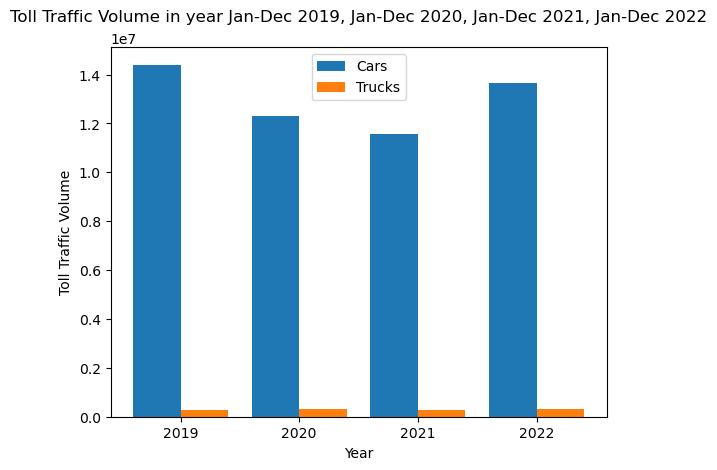

Wall time: 215 ms


In [28]:
%%time
#Bar chart to show Toll Traffic Volume in year Jan-Dec 2019, Jan-Dec 2020, Jan-Dec 2021, Jan-Dec 2022
Xaxis = np.arange(len(year))
  
plt.bar(Xaxis - 0.2, car_volume, 0.4, label = 'Cars')
plt.bar(Xaxis + 0.2, truck_volume, 0.4, label = 'Trucks')
  
plt.xticks(Xaxis, year)
plt.xlabel("Year")
plt.ylabel("Toll Traffic Volume")
plt.title("Toll Traffic Volume in year Jan-Dec 2019, Jan-Dec 2020, Jan-Dec 2021, Jan-Dec 2022\n")
plt.legend()
plt.show()

<font color='black'><left><h2>Conclusion: <br><br>(i) As per the above descriptive analytics, cars contribute to more traffic in comparison with trucks. So, it is vital for the government to concentrate more on cars traffic management on the toll roads.
<br>(ii) It is evident from the graph that we can see a dip in traffic volume in 2020 and 2021 in comparison with 2019 and 2022, which is due to covid-19 impact and travel restrictions applied by the government.
</h2></left></font>

In [29]:
%%time
car_revenue

Wall time: 0 ns


[38796701.6, 64904912.23, 61759207.46, 76528211.21]

In [30]:
%%time
truck_revenue

Wall time: 0 ns


[1701202.1, 3383093.92, 3255384.26, 3909983.14]

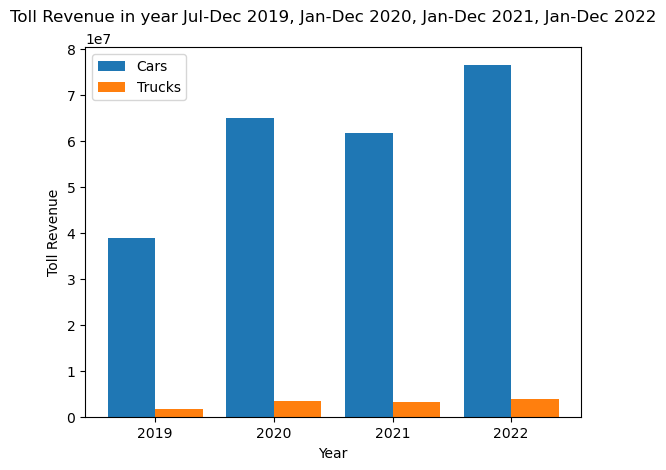

Wall time: 155 ms


In [31]:
%%time
#Bar chart to show Toll Revenue in year Jul-Dec 2019, Jan-Dec 2020, Jan-Dec 2021, Jan-Dec 2022
Xaxis = np.arange(len(year))
  
plt.bar(Xaxis - 0.2, car_revenue, 0.4, label = 'Cars')
plt.bar(Xaxis + 0.2, truck_revenue, 0.4, label = 'Trucks')
  
plt.xticks(Xaxis, year)
plt.xlabel("Year")
plt.ylabel("Toll Revenue")
plt.title("Toll Revenue in year Jul-Dec 2019, Jan-Dec 2020, Jan-Dec 2021, Jan-Dec 2022\n")
plt.legend()
plt.show()

<font color='black'><left><h2>Conclusion: <br><br>(i) As per the above descriptive analytics, cars generate more revenue in comparison with trucks. So, it is vital for the government to concentrate more on cars traffic management on the toll roads.
<br>(ii) It is evident from the graph that we can see a dip in toll revenue in 2020 and 2021 in comparison with 2022, which is due to covid-19 impact and travel restrictions applied by the government.
</h2></left></font>

<font color='purple'><center><h1>End: Answering "Which type of vehicle has created more traffic volume each year from Jan 2019 – Dec 2022 & generated more revenue each year from July 2019 – Dec 2022"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Impact on traffic volume in March 2020 due to COVID-19 restrictions by comparing March 2019 and March 2022"</h1></center></font>

<font color='blue'><center><h2>COVID-19 impact analysis</h2></center></font>

<font color='blue'><center><h2>Below analysis is done combining all TollPointIDs</h2></center></font>

In [32]:
%%time
#Create a copy of input traffic data
df_inp_data_covid = df_inp_data.copy()

#Convert date column data type from object to date
df_inp_data_covid['Date'] = pd.to_datetime(df_inp_data_covid['Date'])

#Read March 2019, March 2020 and March 2022 toll traffic data
df_covid_19 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2019-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2019-03-31')) ]
df_covid_20 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2020-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2020-03-31')) ]
df_covid_22 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2022-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2022-03-31')) ]

Wall time: 1.08 s


<font color='blue'><center><h2>Split the data into seven phase wise COVID impact</h2></center></font>
<center>1. No restrictions applied between 1-14th of March <br>
2. Social gatherings allowed up to 500 people between 15-17th of March <br>
3. Social gatherings allowed up to 100 people between 18-19th of March <br>
4. Borders closed for international between 20-22nd of March <br>
5. Stage 1 shutdown announced between 23-24th of March <br>
6. Stage 2 shutdown announced between 25-28th of March <br>
7. Stage 3 shutdown announced between 29-31st of March <br>

In [33]:
%%time
#Split the data into seven phase wise COVID impact for the below month and year
#March 2019
df_covid_19_phase1 = df_covid_19[( df_covid_19['Date'] < pd.to_datetime('2019-03-15') )]
df_covid_19_phase2 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-14')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-18')) ]
df_covid_19_phase3 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-17')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-20')) ]
df_covid_19_phase4 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-19')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-23')) ]
df_covid_19_phase5 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-22')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-25')) ]
df_covid_19_phase6 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-24')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-29')) ]
df_covid_19_phase7 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-28')) ]

#March 2020
df_covid_20_phase1 = df_covid_20[( df_covid_20['Date'] < pd.to_datetime('2020-03-15') )]
df_covid_20_phase2 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-14')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-18')) ]
df_covid_20_phase3 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-17')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-20')) ]
df_covid_20_phase4 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-19')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-23')) ]
df_covid_20_phase5 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-22')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-25')) ]
df_covid_20_phase6 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-24')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-29')) ]
df_covid_20_phase7 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-28')) ]

#March 2022
df_covid_22_phase1 = df_covid_22[( df_covid_22['Date'] < pd.to_datetime('2022-03-15') )]
df_covid_22_phase2 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-14')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-18')) ]
df_covid_22_phase3 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-17')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-20')) ]
df_covid_22_phase4 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-19')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-23')) ]
df_covid_22_phase5 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-22')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-25')) ]
df_covid_22_phase6 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-24')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-29')) ]
df_covid_22_phase7 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-28')) ]

Wall time: 27.9 ms


In [34]:
%%time
#Prepare data for Bar chart to show Toll Traffic Volume in March 2019, March 2020, March 2022
Phase = ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5', 'Phase 6', 'Phase 7']
Traffic_volume_2019 = [df_covid_19_phase1['TotalVolume'].sum(), df_covid_19_phase2['TotalVolume'].sum(), df_covid_19_phase3['TotalVolume'].sum(), df_covid_19_phase4['TotalVolume'].sum(), df_covid_19_phase5['TotalVolume'].sum(), df_covid_19_phase6['TotalVolume'].sum(), df_covid_19_phase7['TotalVolume'].sum()]
Traffic_volume_2020 = [df_covid_20_phase1['TotalVolume'].sum(), df_covid_20_phase2['TotalVolume'].sum(), df_covid_20_phase3['TotalVolume'].sum(), df_covid_20_phase4['TotalVolume'].sum(), df_covid_20_phase5['TotalVolume'].sum(), df_covid_20_phase6['TotalVolume'].sum(), df_covid_20_phase7['TotalVolume'].sum()]
Traffic_volume_2022 = [df_covid_22_phase1['TotalVolume'].sum(), df_covid_22_phase2['TotalVolume'].sum(), df_covid_22_phase3['TotalVolume'].sum(), df_covid_22_phase4['TotalVolume'].sum(), df_covid_22_phase5['TotalVolume'].sum(), df_covid_22_phase6['TotalVolume'].sum(), df_covid_22_phase7['TotalVolume'].sum()]

Wall time: 1.99 ms


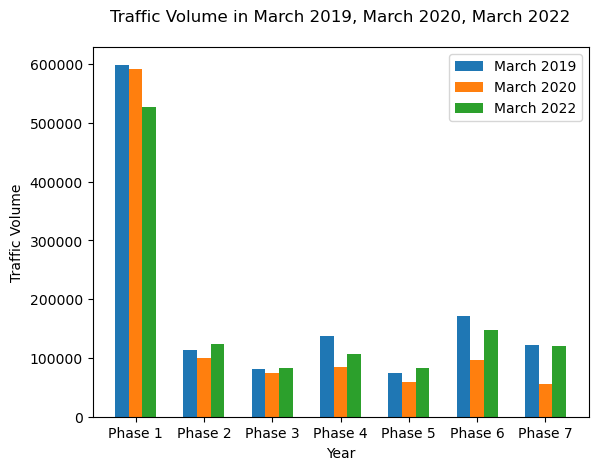

Wall time: 204 ms


In [35]:
%%time
#Bar chart to show Toll Traffic Volume in March 2019, March 2020, March 2022
Xaxis = np.arange(len(Phase))
  
plt.bar(Xaxis - 0.2, Traffic_volume_2019, 0.2, label = 'March 2019')
plt.bar(Xaxis + 0.0, Traffic_volume_2020, 0.2, label = 'March 2020')
plt.bar(Xaxis + 0.2, Traffic_volume_2022, 0.2, label = 'March 2022')
  
plt.xticks(Xaxis, Phase)
plt.xlabel("Year")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume in March 2019, March 2020, March 2022\n")
plt.legend()
plt.show()

<font color='blue'><center><h2>Below analysis is done only for TollPointID = SJY</h2></center></font>

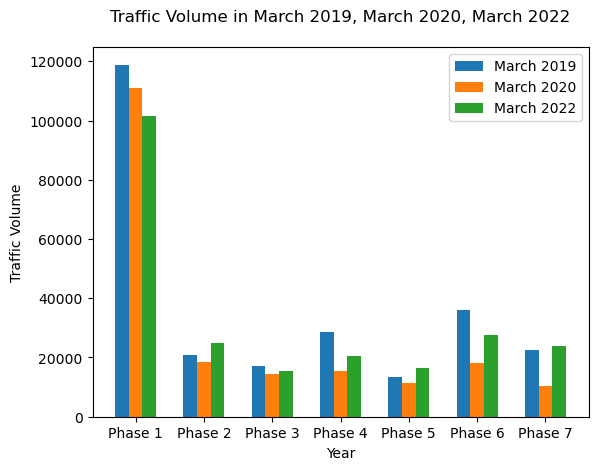

Wall time: 569 ms


In [36]:
%%time
df_inp_data_covid = df_inp_data_covid[( df_inp_data_covid['TollPointID'] == "SJY" )]

#Read March 2019, March 2020 and March 2022 toll traffic data
df_covid_19 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2019-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2019-03-31')) ]
df_covid_20 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2020-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2020-03-31')) ]
df_covid_22 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2022-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2022-03-31')) ]

#Split the data into seven phase wise COVID impact for the below month and year
#March 2019
df_covid_19_phase1 = df_covid_19[( df_covid_19['Date'] < pd.to_datetime('2019-03-15') )]
df_covid_19_phase2 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-14')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-18')) ]
df_covid_19_phase3 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-17')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-20')) ]
df_covid_19_phase4 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-19')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-23')) ]
df_covid_19_phase5 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-22')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-25')) ]
df_covid_19_phase6 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-24')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-29')) ]
df_covid_19_phase7 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-28')) ]

#March 2020
df_covid_20_phase1 = df_covid_20[( df_covid_20['Date'] < pd.to_datetime('2020-03-15') )]
df_covid_20_phase2 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-14')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-18')) ]
df_covid_20_phase3 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-17')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-20')) ]
df_covid_20_phase4 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-19')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-23')) ]
df_covid_20_phase5 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-22')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-25')) ]
df_covid_20_phase6 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-24')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-29')) ]
df_covid_20_phase7 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-28')) ]

#March 2022
df_covid_22_phase1 = df_covid_22[( df_covid_22['Date'] < pd.to_datetime('2022-03-15') )]
df_covid_22_phase2 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-14')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-18')) ]
df_covid_22_phase3 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-17')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-20')) ]
df_covid_22_phase4 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-19')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-23')) ]
df_covid_22_phase5 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-22')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-25')) ]
df_covid_22_phase6 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-24')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-29')) ]
df_covid_22_phase7 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-28')) ]

#Prepare data for Bar chart to show Toll Traffic Volume in March 2019, March 2020, March 2022
Phase = ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5', 'Phase 6', 'Phase 7']
Traffic_volume_2019 = [df_covid_19_phase1['TotalVolume'].sum(), df_covid_19_phase2['TotalVolume'].sum(), df_covid_19_phase3['TotalVolume'].sum(), df_covid_19_phase4['TotalVolume'].sum(), df_covid_19_phase5['TotalVolume'].sum(), df_covid_19_phase6['TotalVolume'].sum(), df_covid_19_phase7['TotalVolume'].sum()]
Traffic_volume_2020 = [df_covid_20_phase1['TotalVolume'].sum(), df_covid_20_phase2['TotalVolume'].sum(), df_covid_20_phase3['TotalVolume'].sum(), df_covid_20_phase4['TotalVolume'].sum(), df_covid_20_phase5['TotalVolume'].sum(), df_covid_20_phase6['TotalVolume'].sum(), df_covid_20_phase7['TotalVolume'].sum()]
Traffic_volume_2022 = [df_covid_22_phase1['TotalVolume'].sum(), df_covid_22_phase2['TotalVolume'].sum(), df_covid_22_phase3['TotalVolume'].sum(), df_covid_22_phase4['TotalVolume'].sum(), df_covid_22_phase5['TotalVolume'].sum(), df_covid_22_phase6['TotalVolume'].sum(), df_covid_22_phase7['TotalVolume'].sum()]

#Bar chart to show Toll Traffic Volume in March 2019, March 2020, March 2022
Xaxis = np.arange(len(Phase))
  
plt.bar(Xaxis - 0.2, Traffic_volume_2019, 0.2, label = 'March 2019')
plt.bar(Xaxis + 0.0, Traffic_volume_2020, 0.2, label = 'March 2020')
plt.bar(Xaxis + 0.2, Traffic_volume_2022, 0.2, label = 'March 2022')
  
plt.xticks(Xaxis, Phase)
plt.xlabel("Year")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume in March 2019, March 2020, March 2022\n")
plt.legend()
plt.show()

<font color='black'><left><h2>Conclusion:<br><br>(i) As per the above exploratory data analysis, with the restrictions announced from phase 2 – 7, we can see a dip in the traffic volume during March 2020 when compared with March 2019 & 2022.<br><br>(ii) Moreover, the stage 2 & 3 restrictions announced in phases 6 & 7 had greater impact to traffic volume during March 2020 in comparison to March 2019 & 2022.
</h2></left></font>

<font color='blue'><center><h2>Toll Road Air Quality</h2></center></font>

<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [37]:
%%time
df_air = pd.read_csv("C:/Users/USER/Documents/Toll/Air Quality/Air Level - CCT.csv")
df_air = df_air.set_index("Month-Year")
df_air

Wall time: 9.97 ms


NO(mg/m³)   NO2(mg/m³)   NOx (mg/m³)   CO(mg/m³)   PM2.5 (µg/m³)  \
Month-Year                                                                     
Oct-19           0.61         0.16          1.10        2.61           36.16   
Jan-20           0.52         0.08          0.88        2.42           33.88   
Feb-20           0.72         0.05          1.14        2.45           40.02   
Mar-20           0.62         0.12          1.08        1.96           32.85   
Apr-20           0.44         0.05          0.73        1.29           20.10   
May-20           0.54         0.05          0.89        2.25           28.80   
Jun-20           0.61         0.12          1.05        3.01           30.38   
Jul-20           0.66         0.15          1.16        3.19           28.58   
Aug-20           0.65         0.15          1.14        3.20           34.40   
Sep-20           0.63         0.15          1.12        3.14           35.95   
Oct-20           0.52         0.10          0.89        2.96           32.62   
Nov-20           0.62         0.07          1.02        3.17           34.16   
Dec-20           0.55         0.06          0.90        2.70           30.70   
Feb-21           0.67         0.06          1.09        3.00           31.39   
Jun-21           0.50         0.12          0.89        2.26           21.06   
Jul-21           0.32         0.10          0.59        1.30           14.78   
Aug-21           0.34         0.10          0.63        1.25           21.01   
Sep-21           0.40         0.12          0.72        1.47           22.49   
Oct-21           0.47         0.13          0.85        2.19           23.42   
Nov-21           0.48         0.11          0.84        2.21           31.88   
Jan-22           0.32         0.05          0.54        1.24           20.97   
Feb-22           0.48         0.07          0.81        1.81           36.18   
Aug-22           0.65         0.15          1.15        2.12           30.56   
Sep-22           0.61         0.14          1.07        2.09           28.27   
Oct-22           0.55         0.13          0.98        2.09           37.83   
Nov-22           0.69         0.15          1.22        2.32           48.97   
Dec-22           0.54         0.13          0.96        2.13           42.21   

             PM10 (µg/m³)   Met. (mg/m³)   TNMHC (mg/m³)  Year  Month  
Month-Year                                                             
Oct-19              43.59           1.27            0.34  2019     10  
Jan-20              43.33           1.18            0.21  2020      1  
Feb-20              51.99           1.16            0.27  2020      2  
Mar-20              39.44           1.22            0.24  2020      3  
Apr-20              26.28           1.23            0.15  2020      4  
May-20              37.14           1.27            0.22  2020      5  
Jun-20              36.07           1.45            0.23  2020      6  
Jul-20              33.95           1.38            0.28  2020      7  
Aug-20              42.34           1.37            0.21  2020      8  
Sep-20              43.20           1.30            0.19  2020      9  
Oct-20              34.78           1.31            0.19  2020     10  
Nov-20              35.33           1.28            0.18  2020     11  
Dec-20              32.74           1.26            0.16  2020     12  
Feb-21              37.41           1.39            0.21  2021      2  
Jun-21              37.33           1.35            0.18  2021      6  
Jul-21              23.27           1.33            0.11  2021      7  
Aug-21              30.46           1.33            0.10  2021      8  
Sep-21              32.62           1.29            0.14  2021      9  
Oct-21              50.29           1.38            0.19  2021     10  
Nov-21              49.65           1.38            0.17  2021     11  
Jan-22              39.46           1.35            0.13  2022      1  
Feb-22              54.38          

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

Wall time: 69 ms


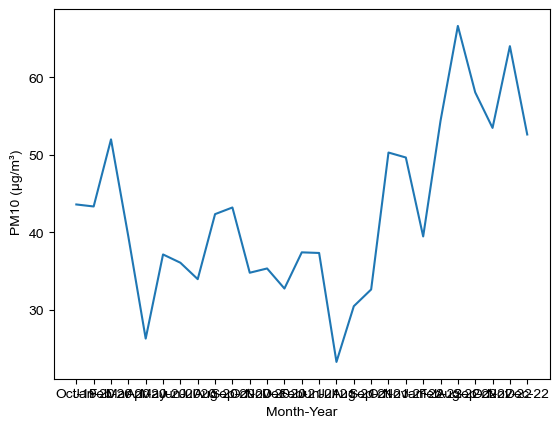

In [38]:
%%time
#Level of PM10 (µg/m³) Average hourly concentrations of each month
sns.lineplot(data=df_air[df_air.columns[5]])
sns.set(rc={'figure.figsize':(25,15)})

<font color='black'><left><h2>Conclusion:<br><br>(i) We can see that the traffic volume is less during covid period in 2020 in comparison with 2019 & 2022.<br><br>(ii) Air quality level is better during covid days in 2020 & 2021 when compared to 2019 & 2022. Lesser the PM10 (µg/m³), lesser will be the air pollution.<br><br>(iii) Owing to this, the result recommends government to promote work from home for at least twice a week, especially in IT and computer operated offices. Reason: These offices were running during pandemic.<br><br>(iv) This is good for people travelling to the office to save travel time.<br><br>(v) This is good for the environment if vehicle pollution can be reduced.</h2></lect></font>

<font color='purple'><center><h1>End: Answering "Impact on traffic volume in March 2020 due to COVID-19 restrictions by comparing March 2019 and March 2022"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Busiest Day of the week"</h1></center></font>

In [39]:
%%time
#Input traffic data set
#Filter and store the data set of October, November and December 2022
df_busy = df_inp_data.copy()
df_busy['Date'] = pd.to_datetime(df_busy['Date'])
df_busy_2 = df_busy[( df_busy['Date'] > pd.to_datetime('2022-10-01') )]

Wall time: 1 s


<font color='blue'><center><h2>Data Pre-Processing</h2></center></font>

In [40]:
%%time
#Preprocess and capture week and day in each row of the data set
Day = 0
Week = 1
Days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
Date = pd.to_datetime('2022-10-02')
df_busy_4 = df_busy[( df_busy['Date'] == 0 )]

for x in range(0,len( df_busy_2.Date.unique() )):
    df_busy_3 = df_busy_2[( df_busy_2['Date'] == Date )]
    df_busy_3['Week'] = Week
    df_busy_3['Day'] = Days[Day]
    Date = Date + pd.DateOffset(days=1)
    Day = Day + 1
    df_busy_4 = df_busy_4.append(df_busy_3)
    if Day == 7:
        Day = 0
        Week = Week + 1

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Wall time: 438 ms


In [41]:
%%time
#Display Asset ID, Toll Point ID, Week, Day, Date and Traffic volume of the data set
df_busy_4[['AssetID','TollPointID','Week','Day','Date','TotalVolume']]

Wall time: 16.6 ms


AssetID TollPointID  Week       Day       Date  TotalVolume
439       CCT        East   1.0    Sunday 2022-10-02           89
440       CCT         SJY   1.0    Sunday 2022-10-02           18
441       CCT        West   1.0    Sunday 2022-10-02           70
442       CCT        East   1.0    Sunday 2022-10-02           80
443       CCT         SJY   1.0    Sunday 2022-10-02           17
...       ...         ...   ...       ...        ...          ...
14148     CCT        West  13.0  Saturday 2022-12-31           85
14149     CCT         SJY  13.0  Saturday 2022-12-31           25
14150     CCT        West  13.0  Saturday 2022-12-31           77
14151     CCT         SJY  13.0  Saturday 2022-12-31           12
14152     CCT        West  13.0  Saturday 2022-12-31           55

[42290 rows x 6 columns]

<font color='blue'><center><h2>Busiest Day of the week - All Directions</h2></center></font>

In [42]:
%%time
#Group by and find busiest day of the week through daily aggregated traffic volume of the toll road cummulative of all directions
for x in range(1,len( df_busy_4.Week.unique() )+1):
    df_busy_5 = df_busy_4[( df_busy_4['Week'] == x )]
    grouped = df_busy_5.groupby(['Week', 'Day'])['TotalVolume'].sum().sort_values(ascending=False)
    print(grouped)

Week  Day      
1.0   Friday       43558
      Thursday     41340
      Wednesday    39291
      Tuesday      38687
      Saturday     36789
      Sunday       28377
      Monday       26086
Name: TotalVolume, dtype: int64
Week  Day      
2.0   Friday       47902
      Saturday     46373
      Thursday     45216
      Wednesday    43128
      Tuesday      41977
      Monday       37788
      Sunday       27429
Name: TotalVolume, dtype: int64
Week  Day      
3.0   Friday       46950
      Thursday     45816
      Saturday     44766
      Wednesday    43997
      Tuesday      41804
      Monday       36932
      Sunday       31938
Name: TotalVolume, dtype: int64
Week  Day      
4.0   Friday       49558
      Saturday     48159
      Thursday     47512
      Wednesday    47494
      Tuesday      42357
      Monday       36902
      Sunday       30960
Name: TotalVolume, dtype: int64
Week  Day      
5.0   Friday       46677
      Saturday     45764
      Thursday     45704
      Wednesday  

<font color='blue'><center><h2>Busiest Day of the week - Direction = SJY</h2></center></font>

In [43]:
%%time
#Group by and find busiest day of the week through daily aggregated traffic volume of the toll road in direction = SJY
for x in range(1,len( df_busy_4.Week.unique() )+1):
    df_busy_5 = df_busy_4[( df_busy_4['Week'] == x ) & ( df_busy_4['TollPointID'] == 'SJY' )]
    grouped = df_busy_5.groupby(['Week', 'Day'])['TotalVolume'].sum().sort_values(ascending=False)
    print(grouped)

Week  Day      
1.0   Friday       8034
      Thursday     7975
      Tuesday      7309
      Wednesday    7309
      Saturday     5909
      Sunday       4425
      Monday       4067
Name: TotalVolume, dtype: int64
Week  Day      
2.0   Friday       9186
      Thursday     8756
      Wednesday    8433
      Saturday     8247
      Tuesday      8192
      Monday       7447
      Sunday       4388
Name: TotalVolume, dtype: int64
Week  Day      
3.0   Friday       8694
      Thursday     8559
      Wednesday    8380
      Tuesday      8034
      Saturday     7885
      Monday       7181
      Sunday       5190
Name: TotalVolume, dtype: int64
Week  Day      
4.0   Thursday     8954
      Wednesday    8916
      Friday       8884
      Tuesday      8133
      Saturday     8129
      Monday       7205
      Sunday       5079
Name: TotalVolume, dtype: int64
Week  Day      
5.0   Thursday     8796
      Friday       8742
      Wednesday    8346
      Tuesday      8287
      Saturday     8151


<h2><center>Conslusion: Friday is mostly the busiest day of the week since the daily aggregated traffic volume count is high on this day for the months October, November and December 2022

<font color='green'><center><h2><u>Friday Traffic Volume Trend in TollPointID SJY</u></h2></center></font>

<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [44]:
%%time
df_peak_friday = df_inp_data.copy()
df_peak_friday['Date'] = pd.to_datetime(df_peak_friday['Date'])
df_peak_friday['Year-Month-Day-Time'] = df_peak_friday['Date'].dt.strftime('%Y-%m-%d') + " " + df_peak_friday['IntervalStart'].str.slice(0, 2) + ":00"
df_peak_friday_2 = df_peak_friday[( df_peak_friday['Date'] >= pd.to_datetime('2022-10-01') ) & ( df_peak_friday['TollPointID'] == "SJY" )]

Wall time: 19.6 s


In [45]:
%%time
#Creating a dataframe with hour and its total volume
df_peak_friday_2 = df_peak_friday_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_friday_3 = df_peak_friday_2.to_frame()
df_peak_friday_3.to_csv('fri-day.csv')
df_peak_friday_4 = pd.read_csv("C:/Users/USER/Documents/Toll/fri-day.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_peak_friday_4['Time'] = df_peak_friday_4['Year-Month-Day-Time'].str.slice(11, 16)
df_peak_friday_4['Year-Month-Day-Time'] = pd.to_datetime(df_peak_friday_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_peak_friday_4 = df_peak_friday_4.set_index("Year-Month-Day-Time")

Wall time: 16 ms


<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [46]:
%%time
def dt_feature_creation_friday(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


<font color='green'><center><h2><u>Add features to dataset</u></h2></center></font>

In [47]:
%%time
df_peak_friday_5 = dt_feature_creation_friday(df_peak_friday_4)

Wall time: 6.98 ms


<font color='green'><center><h2><u>Filter Friday dataset</u></h2></center></font>

In [48]:
%%time
df_peak_friday_6 = df_peak_friday_5[df_peak_friday_5['Day of the week'] == 4]

Wall time: 2 ms


<font color='green'><center><h2><u>Plot Friday dataset</u></h2></center></font>

Wall time: 516 ms


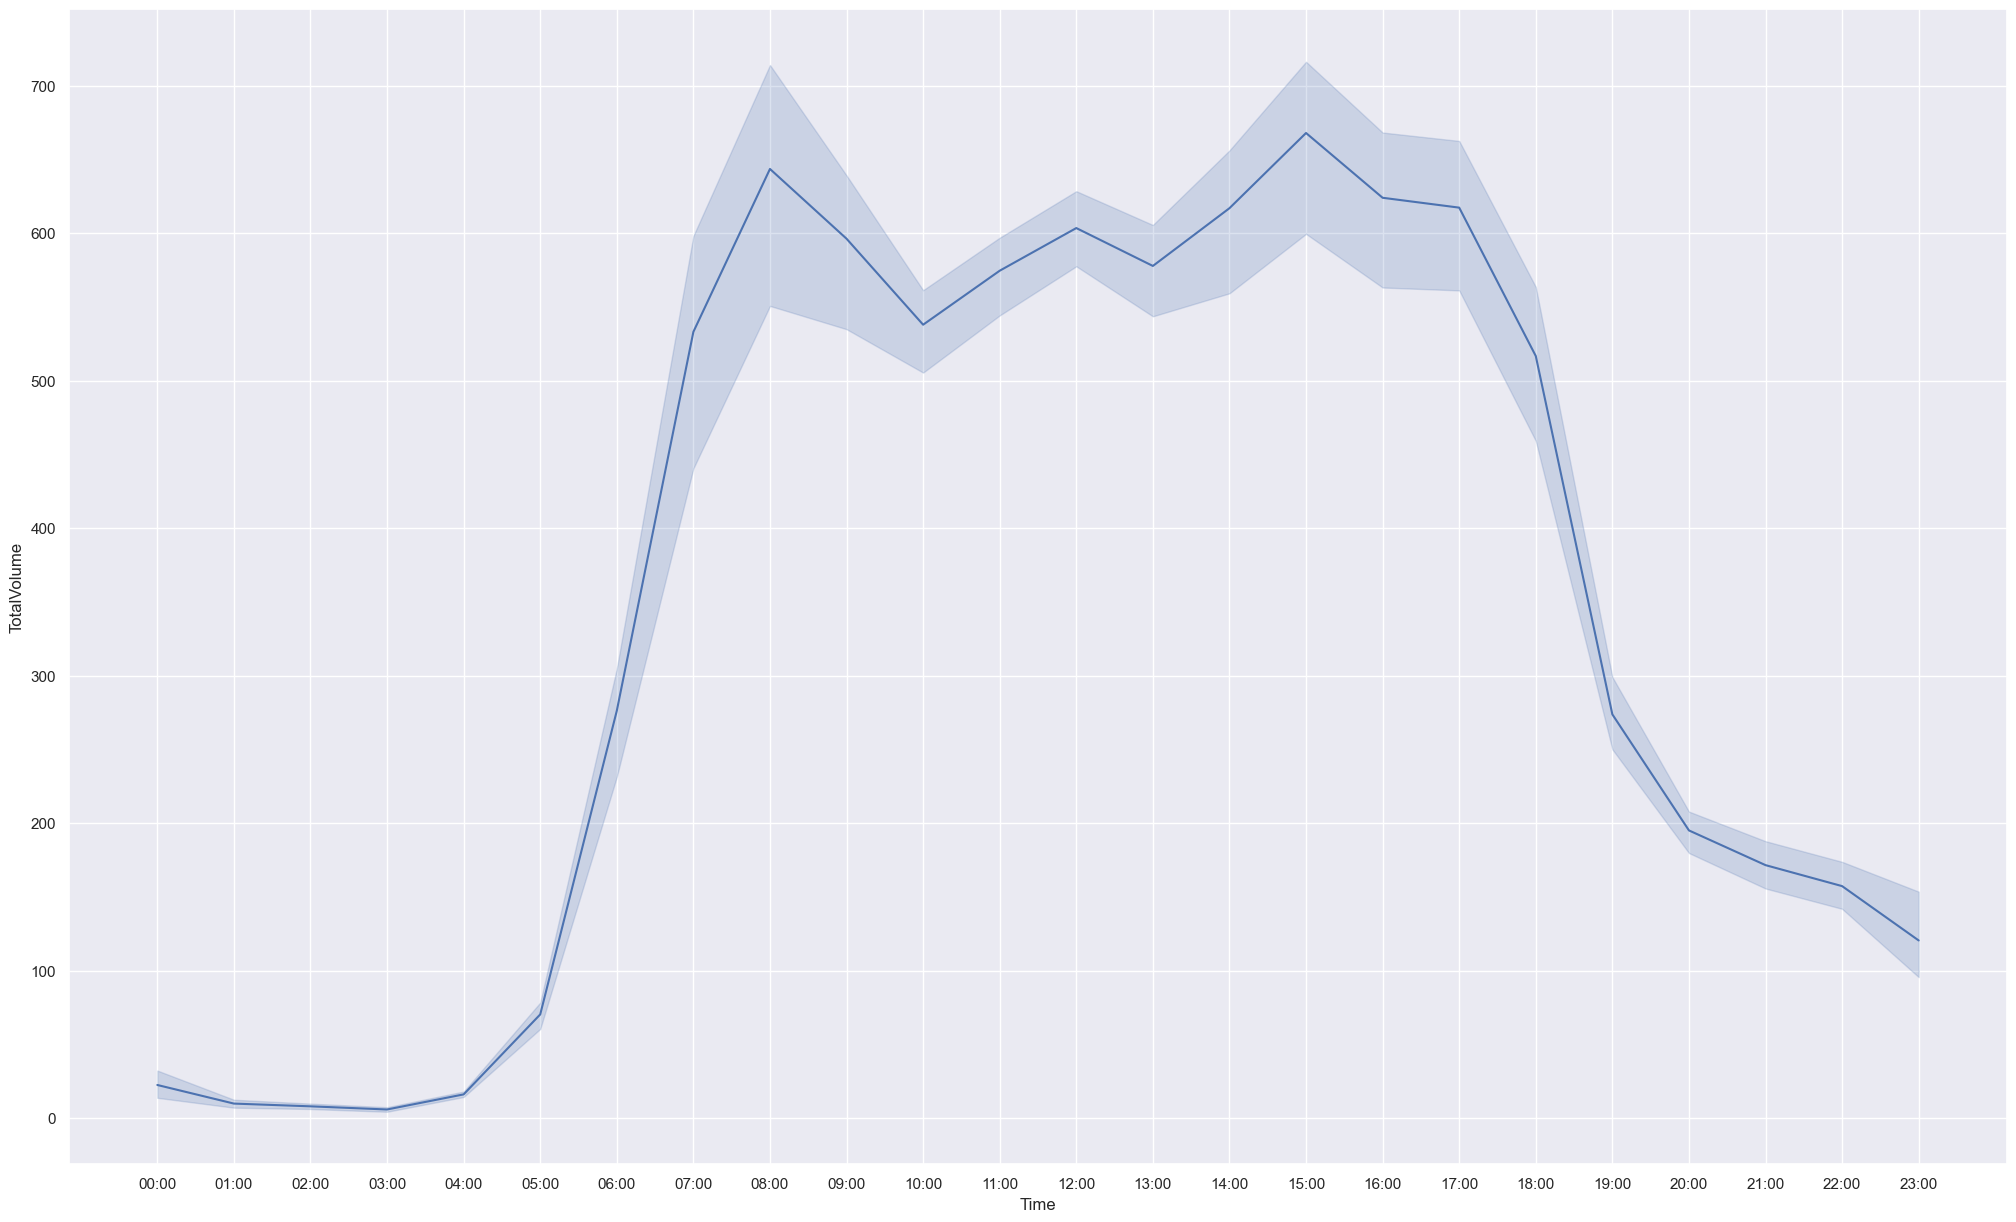

In [49]:
%%time
sns.lineplot(x=df_peak_friday_6["Time"], y=df_peak_friday_6["TotalVolume"], data=df_peak_friday_6)
sns.set(rc={'figure.figsize':(20,8)})

<font color='green'><center><h2><u>Display Friday dataset table</u></h2></center></font>

In [50]:
%%time
df_peak_friday_6

Wall time: 0 ns


TotalVolume   Time  Hour  Day of the week  Quarter  \
Year-Month-Day-Time                                                       
2022-10-07 00:00:00            8  00:00     0                4        4   
2022-10-07 01:00:00            5  01:00     1                4        4   
2022-10-07 02:00:00            7  02:00     2                4        4   
2022-10-07 03:00:00            9  03:00     3                4        4   
2022-10-07 04:00:00           16  04:00     4                4        4   
...                          ...    ...   ...              ...      ...   
2022-12-30 19:00:00          174  19:00    19                4        4   
2022-12-30 20:00:00          152  20:00    20                4        4   
2022-12-30 21:00:00          115  21:00    21                4        4   
2022-12-30 22:00:00          109  22:00    22                4        4   
2022-12-30 23:00:00           71  23:00    23                4        4   

                     Month  Year  Day of the year  
Year-Month-Day-Time                                
2022-10-07 00:00:00     10  2022              280  
2022-10-07 01:00:00     10  2022              280  
2022-10-07 02:00:00     10  2022              280  
2022-10-07 03:00:00     10  2022              280  
2022-10-07 04:00:00     10  2022              280  
...                    ...   ...              ...  
2022-12-30 19:00:00     12  2022              364  
2022-12-30 20:00:00     12  2022              364  
2022-12-30 21:00:00     12  2022              364  
2022-12-30 22:00:00     12  2022              364  
2022-12-30 23:00:00     12  2022              364  

[310 rows x 8 columns]

<h2>Conclusion:</h2>
<h3>
(i) Looking at the above graphs, peak hours during daytime on Friday are 6.00am – 10.00am and 2.00pm – 6.00pm.
<br><br>(ii) The project suggests the government to alert the following services during this time duration.
<br>&emsp;&emsp;Emergency Ambulance Services.
<br>&emsp;&emsp;Car Repair / Breakdown Assistance.
<br>&emsp;&emsp;Mobile Speed Camera to control speed.
<br>&emsp;&emsp;Increase public transport during this day and provide concession on fares, which creates job opportunities <br>&emsp;&emsp;in transport and reduces car accidents & ensures public safety.
<br><br>(iii) These are essential to ensure customer safety.
<br><br>(iv) Government can get revenue from speeding fines.
<br><br>(v) Automobile service companies can benefit from service works.
</h3>

<font color='purple'><center><h1>End: Answering "Busiest Day of the week"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Peak and Off-Peak Traffic Hours"</h1></center></font>

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID SJY in October, November and December 2022</h2></center></font>

In [51]:
%%time
#Input traffic data set
#Filter and store the data set of October, November and December 2022 having TollPointID as SJY
df_peak = df_inp_data.copy()
df_peak['Date'] = pd.to_datetime(df_peak['Date'])
df_peak['Year-Month-Day-Time'] = df_peak['Date'].dt.strftime('%Y-%m-%d') + " " + df_peak['IntervalStart'].str.slice(0, 2) + ":00"
df_peak_2 = df_peak[( df_peak['Date'] >= pd.to_datetime('2022-10-01') ) & ( df_peak['TollPointID'] == "SJY" )]

Wall time: 18.6 s


In [52]:
%%time
#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

Wall time: 15 ms


In [53]:
%%time
#Display the dataframe with hour and its total volume
df_peak_5

Wall time: 0 ns


Year-Month-Day-Time  TotalVolume
0       2022-10-01 00:00           36
1       2022-10-01 01:00           16
2       2022-10-01 02:00           18
3       2022-10-01 03:00           11
4       2022-10-01 04:00           20
...                  ...          ...
2197    2022-12-31 19:00          184
2198    2022-12-31 20:00          106
2199    2022-12-31 21:00          172
2200    2022-12-31 22:00          175
2201    2022-12-31 23:00          109

[2202 rows x 2 columns]

In [54]:
%%time
#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)
df_peak_5

Wall time: 2 ms


Year-Month-Day-Time  TotalVolume   Time
0       2022-10-01 00:00           36  00:00
1       2022-10-01 01:00           16  01:00
2       2022-10-01 02:00           18  02:00
3       2022-10-01 03:00           11  03:00
4       2022-10-01 04:00           20  04:00
...                  ...          ...    ...
2197    2022-12-31 19:00          184  19:00
2198    2022-12-31 20:00          106  20:00
2199    2022-12-31 21:00          172  21:00
2200    2022-12-31 22:00          175  22:00
2201    2022-12-31 23:00          109  23:00

[2202 rows x 3 columns]

Wall time: 595 ms


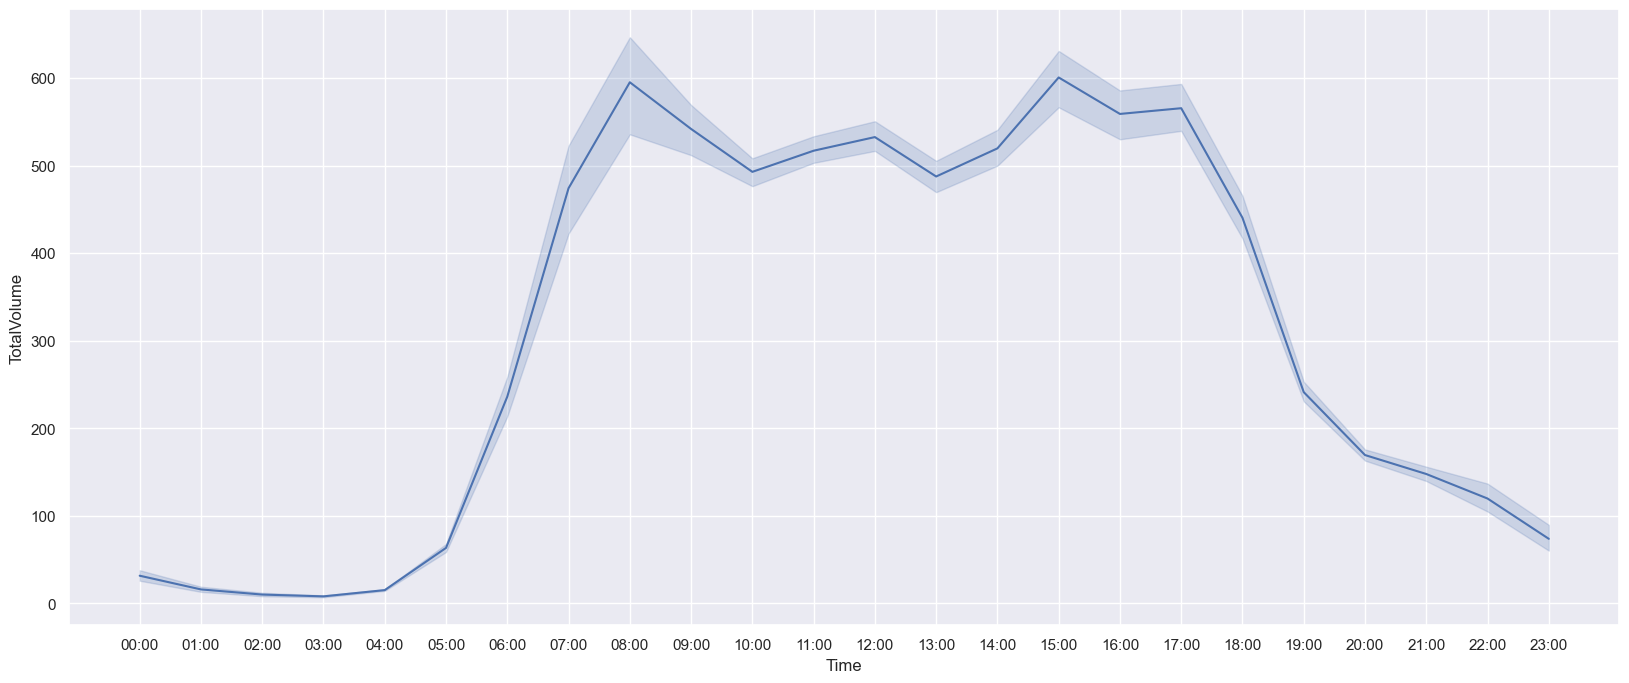

In [55]:
%%time
#Plot hourly traffic volume line graph for October, November and December 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID SJY in Jan 2010 - Dec 2022</h2></center></font>

Wall time: 2.22 s


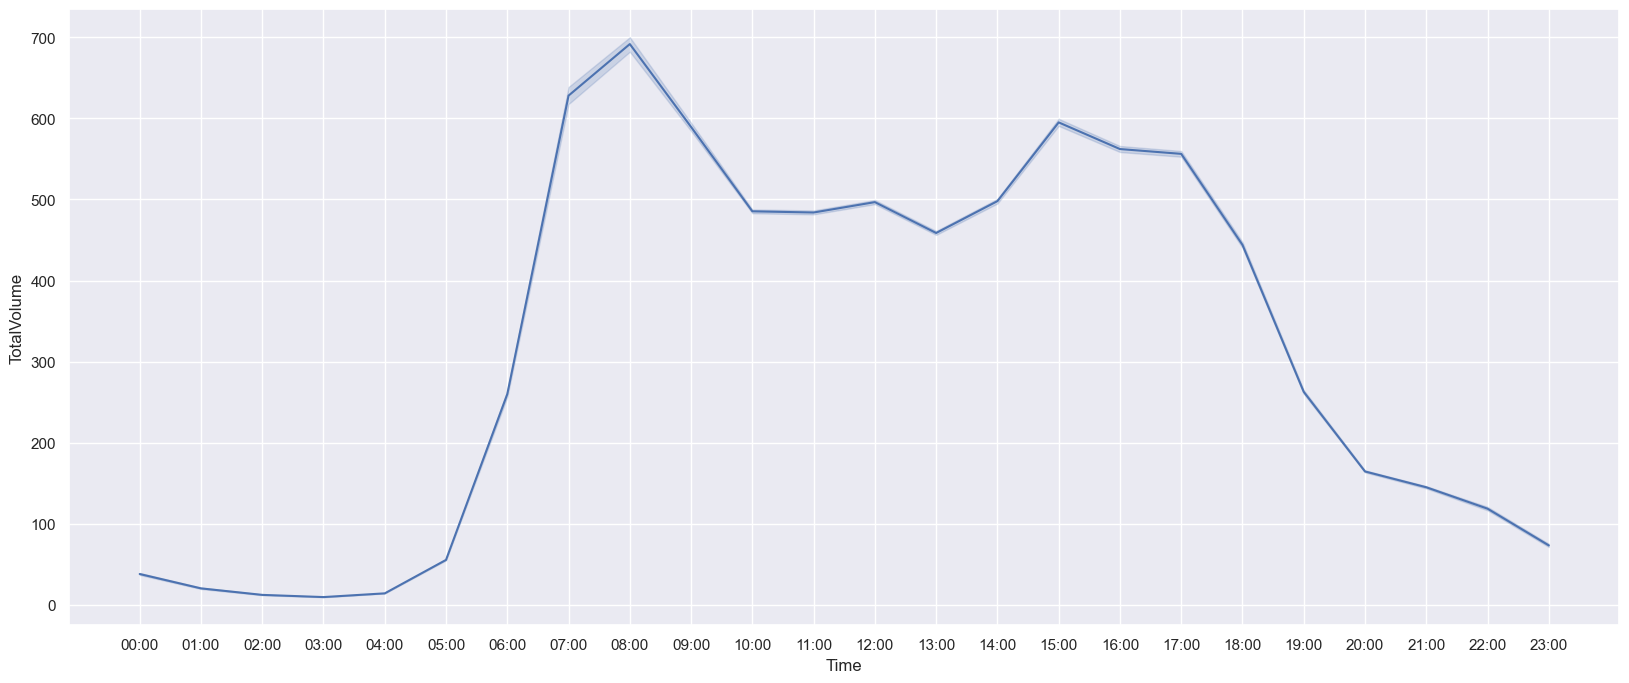

In [56]:
%%time
#Filter TollPointID as SJY
df_peak_2 = df_peak[( df_peak['TollPointID'] == "SJY" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for Jan 2010 - Sep 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID East in October, November and December 2022</h2></center></font>

Wall time: 766 ms


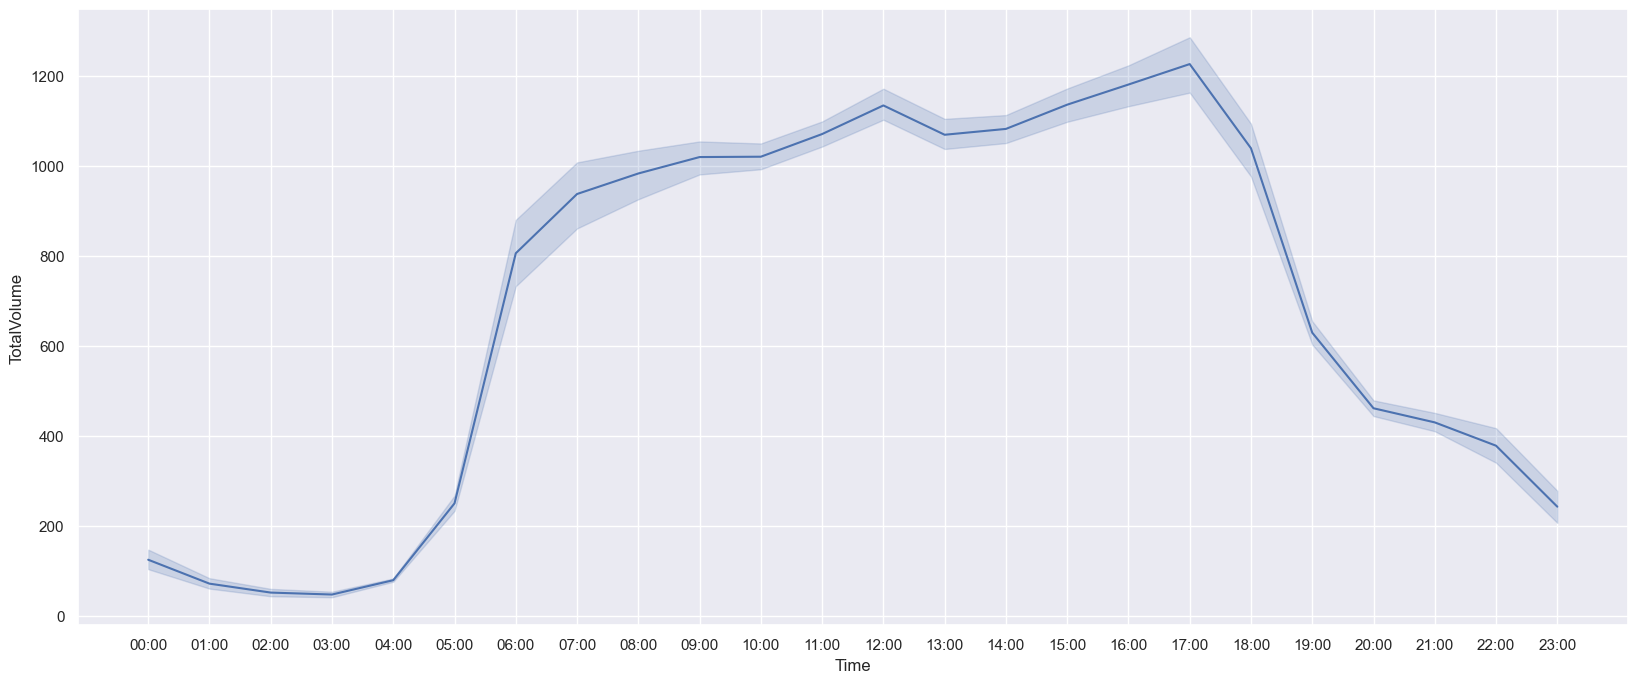

In [57]:
%%time
#Filter and store the data set of October, November and December 2022 having TollPointID as East
df_peak_2 = df_peak[( df_peak['Date'] >= pd.to_datetime('2022-10-01') ) & ( df_peak['TollPointID'] == "East" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for October, November and December 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID East in Jan 2010 - Dec 2022</h2></center></font>

Wall time: 2.26 s


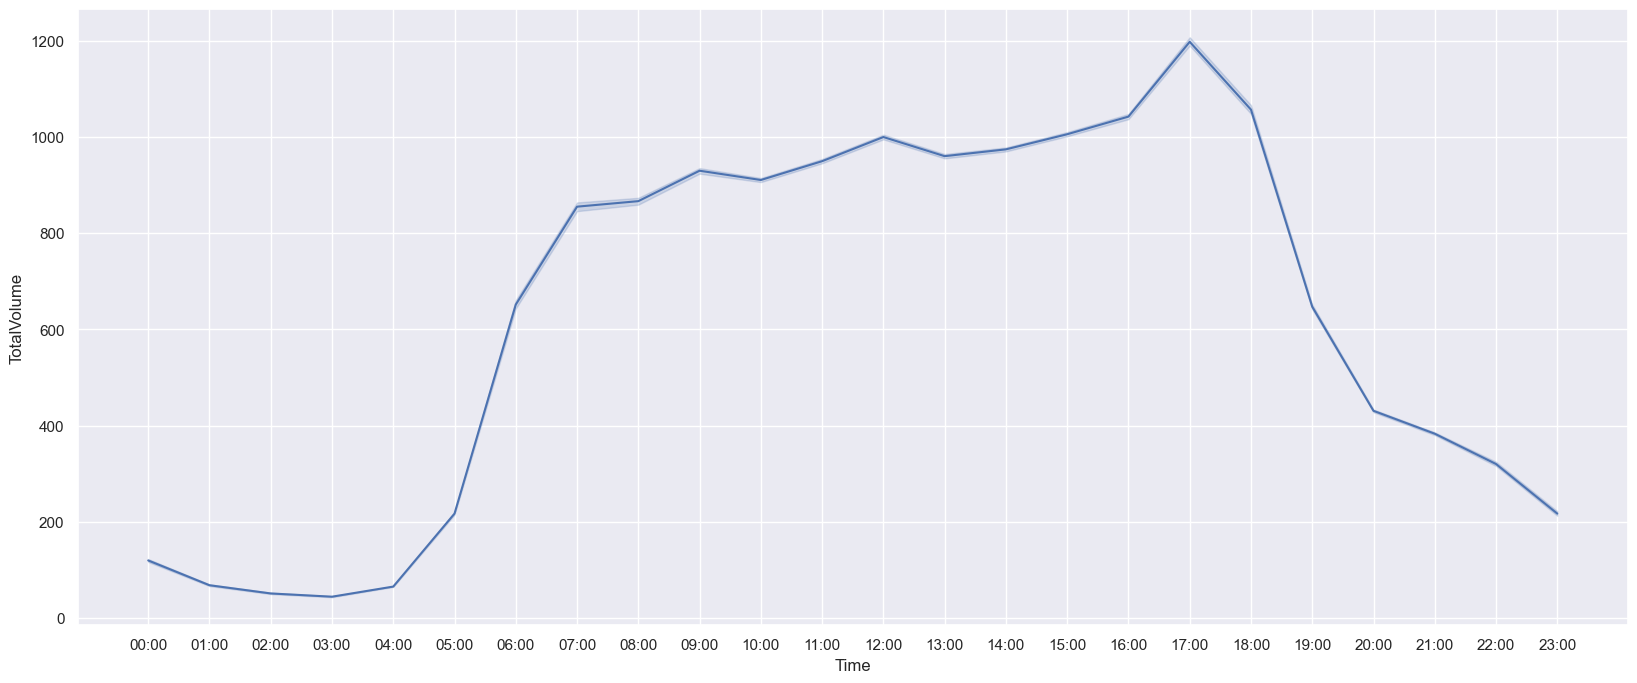

In [58]:
%%time
#Filter TollPointID as East
df_peak_2 = df_peak[( df_peak['TollPointID'] == "East" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for Jan 2010 - Dec 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID West in October, November and December 2022</h2></center></font>

Wall time: 756 ms


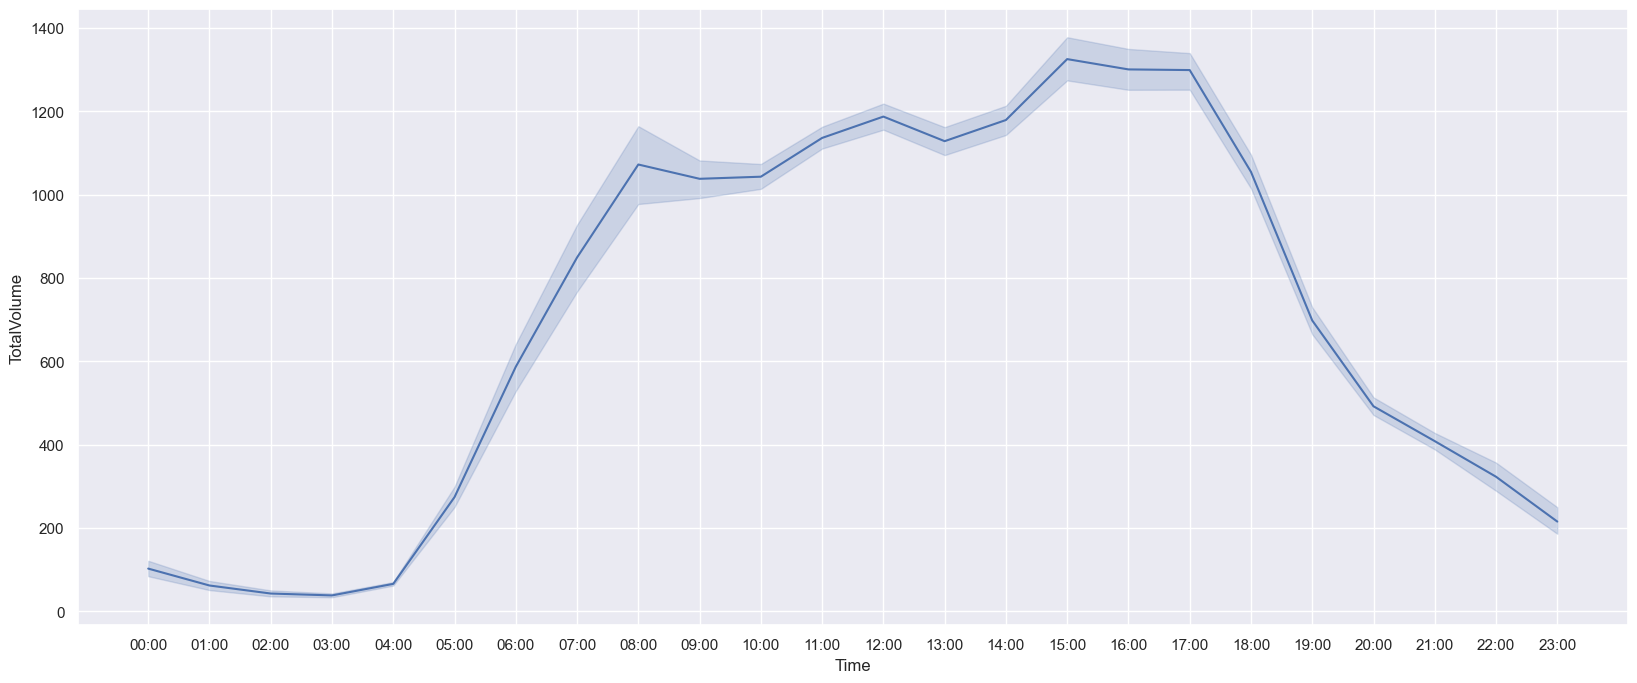

In [59]:
%%time
#Filter and store the data set of July, August and September 2022 having TollPointID as West
df_peak_2 = df_peak[( df_peak['Date'] >= pd.to_datetime('2022-10-01') ) & ( df_peak['TollPointID'] == "West" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for October, November and December 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID West in Jan 2010 - Dec 2022</h2></center></font>

Wall time: 2.25 s


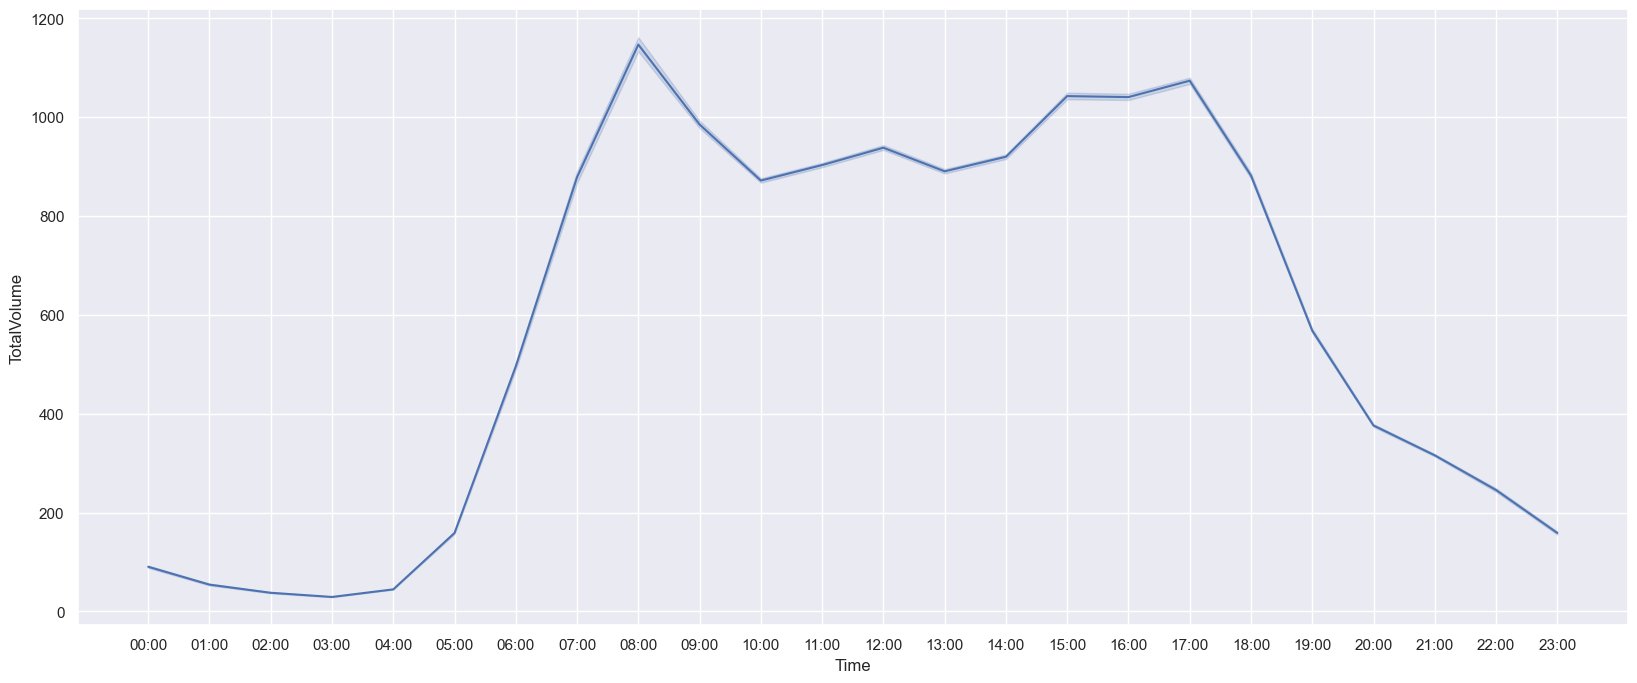

In [60]:
%%time
#Filter TollPointID as West
df_peak_2 = df_peak[( df_peak['TollPointID'] == "West" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for Jan 2010 - Sep 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='purple'><center><h1>End: Answering "Peak and Off-Peak Traffic Hours"</h1></center></font>

<font color='blue'><center><h2>NSW Crash Data Analysis</h2></center></font>

<font color='green'><center><h2><u>Read Input Data</u></h2></center></font>

In [61]:
%%time
df_crash_inp = pd.read_excel("C:/Users/USER/Documents/Toll/Crash/NSW_Road_Crash_Data_2017-2021_CRASH.xlsx")

Wall time: 44.7 s


In [62]:
%%time
df_crash = df_crash_inp.copy()
df_crash

Wall time: 14 ms


Crash ID         Degree of crash Degree of crash - detailed  \
0        1122708                   Fatal                      Fatal   
1        1122709                   Fatal                      Fatal   
2        1122710                   Fatal                      Fatal   
3        1123942                   Fatal                      Fatal   
4        1123948                   Fatal                      Fatal   
...          ...                     ...                        ...   
101713   1298478                  Injury         Minor/Other Injury   
101714   1298482                  Injury         Minor/Other Injury   
101715   1299029  Non-casualty (towaway)     Non-casualty (towaway)   
101716   1299030  Non-casualty (towaway)     Non-casualty (towaway)   
101717   1299039                   Fatal                      Fatal   

        Reporting year  Year of crash Month of crash Day of week of crash  \
0                 2017           2017        January               Monday   
1                 2017           2017        January               Monday   
2                 2017           2017        January              Tuesday   
3                 2017           2017        January             Thursday   
4                 2017           2017        January             Saturday   
...                ...            ...            ...                  ...   
101713            2021           2021            May              Tuesday   
101714            2021           2021           July             Saturday   
101715            2021           2021       February              Tuesday   
101716            2021           2021       November               Monday   
101717            2021           2021        October             Saturday   

       Two-hour intervals Street of crash Street type  ...  \
0           18:00 - 19:59       HOLLOWAYS          RD  ...   
1           12:00 - 13:59           PUTTY          RD  ...   
2           14:00 - 15:59      IRRIGATION         WAY  ...   
3           10:00 - 11:59          VARDYS          RD  ...   
4           12:00 - 13:59         PRINCES         HWY  ...   
...                   ...             ...         ...  ...   
101713      10:00 - 11:59      EMPIRE BAY          DR  ...   
101714      12:00 - 13:59    DENHAM COURT          RD  ...   
101715      06:00 - 07:59        MARYLAND          DR  ...   
101716      16:00 - 17:59       MONA VALE          RD  ...   
101717      16:00 - 17:59          MARKET          ST  ...   

                  DCA - description DCA supplement     First impact type  \
0               Off cway right bend           Left              Rollover   
1                     Opp - Head on            NaN               Head-on   
2                 Same - Rear right            NaN              Rear end   
3              Ped - On carriageway            NaN  Vehicle - Pedestrian   
4                     Opp - Head on            NaN               Head-on   
...                             ...            ...                   ...   
101713       Off left bend into obj           Left      Vehicle - Object   
101714             Opp - Right-thru            NaN           Other angle   
101715             Opp - Right-thru            NaN           Other angle   
101716  On path - Previous accident            NaN           Other angle   
101717              On path - Other            NaN      Vehicle - Object   

              Key TU type                   Other TU type  \
0           Station wagon                             NaN   
1              Motorcycle                     Light truck   
2            Artic tanker               Car (sedan/hatch)   
3            Semi-trailer                      Pedestrian   
4       Car (sedan/hatch)                   4 wheel drive   
...                   ...                             ...   
101713  Car (sedan/hatch)                             NaN   
101714  Car (sedan/hatch)               Car (sedan/hatch)   
101715      4 wheel dri

<font color='green'><center><h2><u>Display Day of week of crash in sorted order</u></h2></center></font>

In [63]:
%%time
df_crash_2 = df_crash[( df_crash['Road classification (admin)']  == "State") & (df_crash['Year of crash']  >= 2017) 
                      & (df_crash['Year of crash']  <= 2021)]
df_crash_3 = df_crash_2.groupby(['Day of week of crash'])['No. moderately injured'].sum().sort_values(ascending=False)
df_crash_3

Wall time: 40.7 ms


Day of week of crash
Friday       2804
Thursday     2703
Saturday     2603
Wednesday    2531
Tuesday      2450
Monday       2414
Sunday       2084
Name: No. moderately injured, dtype: int64

<font color='green'><center><h2><u>Display Hourly crash in sorted order</u></h2></center></font>

In [64]:
%%time
df_crash_4 = df_crash_2.groupby(['Two-hour intervals'])['No. moderately injured'].sum().sort_values(ascending=False)
df_crash_4.head(12)

Wall time: 4.99 ms


Two-hour intervals
16:00 - 17:59       2637
14:00 - 15:59       2492
12:00 - 13:59       2095
10:00 - 11:59       1865
08:00 - 09:59       1860
18:00 - 19:59       1722
06:00 - 07:59       1517
20:00 - 21:59       1178
22:00 - Midnight     774
04:00 - 05:59        616
00:01 - 01:59        457
02:00 - 03:59        375
Name: No. moderately injured, dtype: int64

<h2>Conclusion:</h2>
<h3>
(i) To generalize, Peak hours in daytime are: 6.00am - 10.00am and 2.00pm - 6.00pm
<br><br>(ii) Off-Peak hours in daytime are: 10.00am - 2.00pm
<br><br>(iii) A moderately injured crash in NSW above 300 / two hours is between 6.00am and 8:00pm.
<br><br>(iv) It is recommended that the government to alert and provide the following services in particularly during high traffic hours.
<br>&emsp;&emsp;Emergency Ambulance Services.
<br><br>&emsp;&emsp;Car Repair / Breakdown Assistance.
<br><br>&emsp;&emsp;Mobile Speed Camera to control speed.
<br><br>&emsp;&emsp;Have rest areas opened in toll roads having more than 20 kilometers distance.
<br><br>&emsp;&emsp;Have coffee shops near rest areas during high traffic hours which will be a potential revenue generator which <br>&emsp;&emsp;is not the case currently on toll roads having more than 20 kilometers distance. In the project, toll road “Hills <br>&emsp;&emsp;M2” is used which is 21.4-kilometer distance motorway.
<br><br>&emsp;&emsp;Recommend offices to follow flexible day working hours so that traffic will not be bombarded during morning <br>&emsp;&emsp;& evening traffic hours instead it will be distributed during daytime.
<br><br>&emsp;&emsp;Increase public transport during high traffic hours to promote people to reduce travel by car, which can create <br>&emsp;&emsp;job opportunities in transport and reduce car accidents & ensure public safety.
<br><br>(v) By doing so, customer safety can be ensured.
<br><br>(vi) Government can get revenue from speeding fines.
<br><br>(vii) Automobile service companies can benefit from service works.
<br><br>(viii) Coffee shops can generate revenue.
</h3>

<font color='purple'><center><h1>Start: Answering "Special events can affect/change the daily seasonal traffic pattern which will be fetched and shown"</h1></center></font>

<font color='green'><center><h2><u>New Year Day</u></h2></center></font>

Wall time: 303 ms


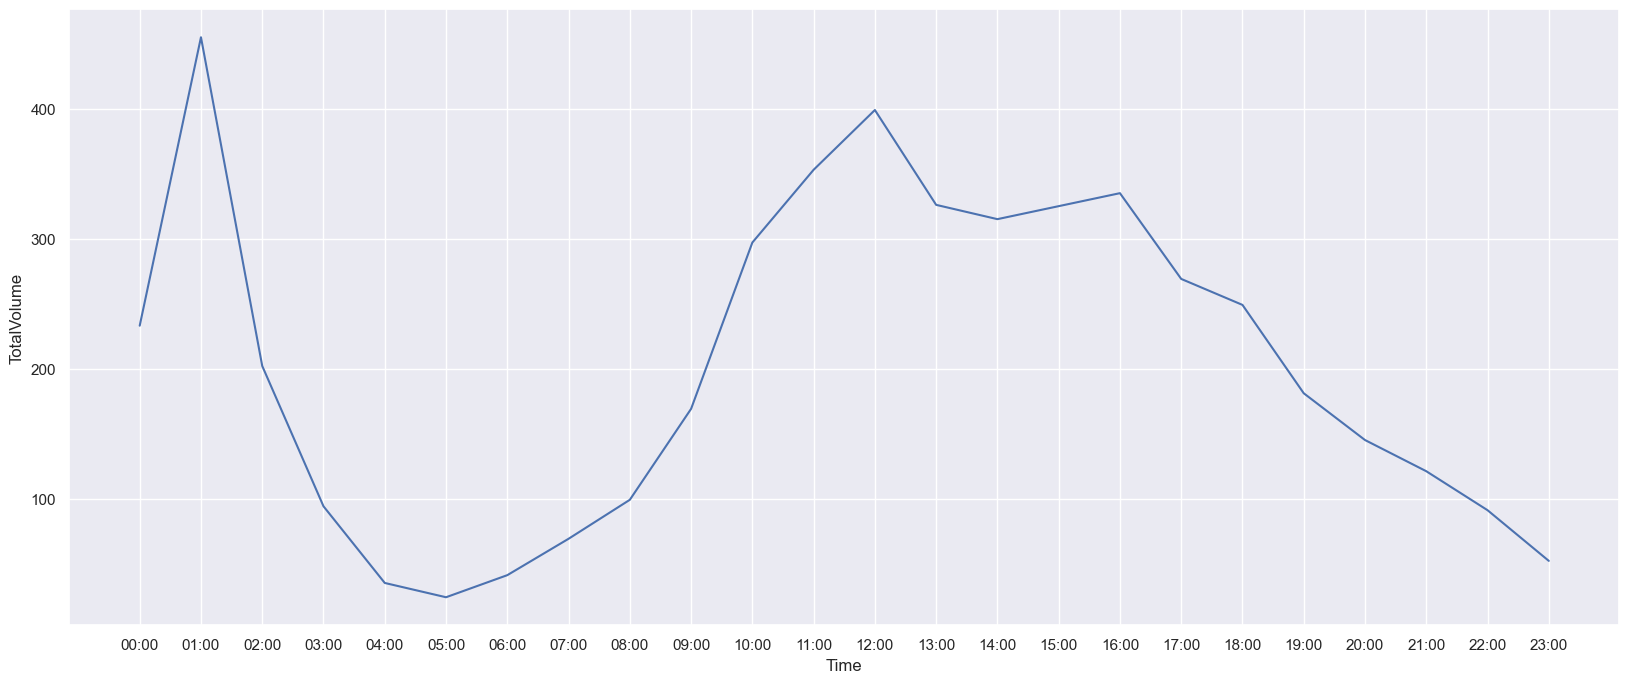

In [65]:
%%time
#Filter the dataset 1st Jan 2018 having TollPointID as SJY
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2018-01-01') ) & ( df_peak['TollPointID'] == "SJY" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

Wall time: 212 ms


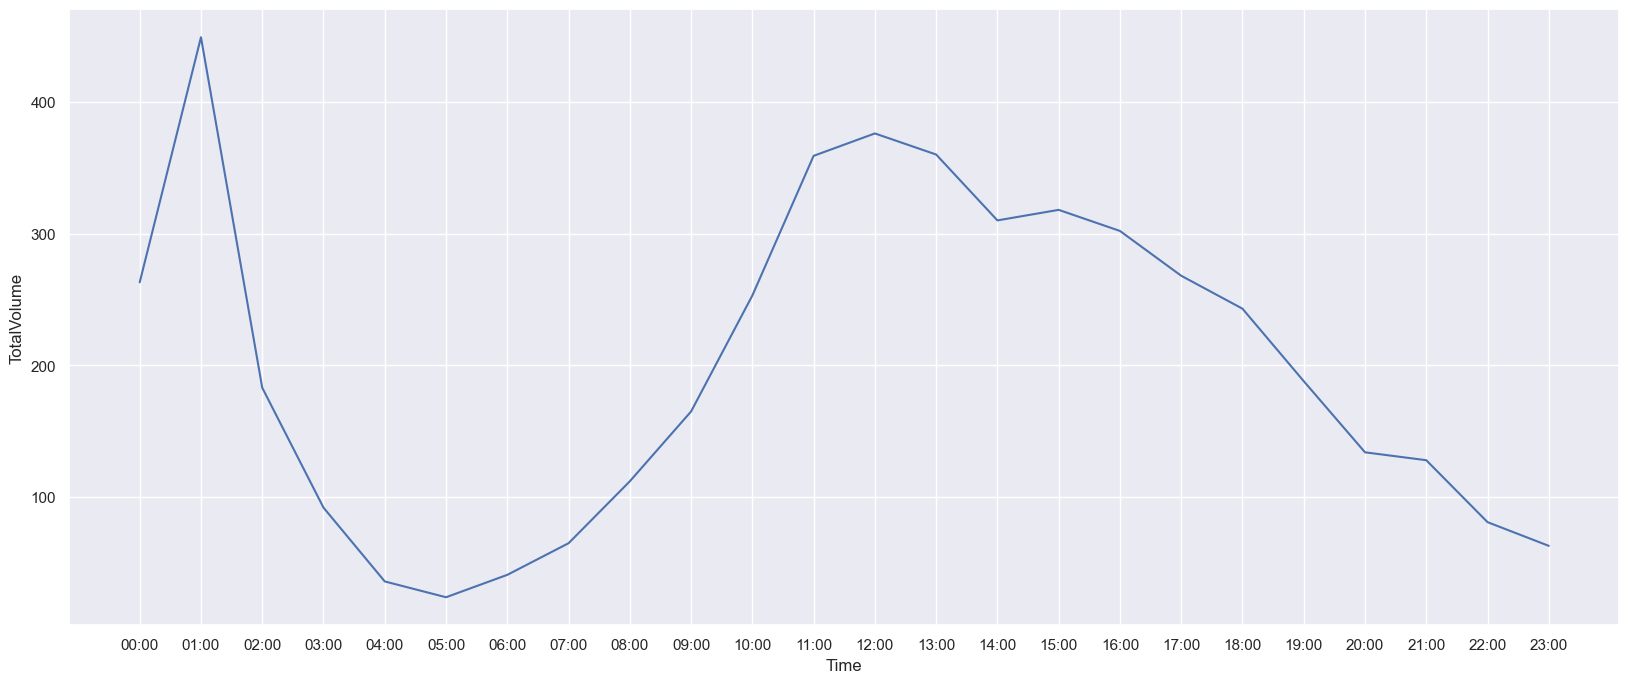

In [66]:
%%time
#Filter the dataset 1st Jan 2019 having TollPointID as SJY
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2019-01-01') ) & ( df_peak['TollPointID'] == "SJY" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

Wall time: 223 ms


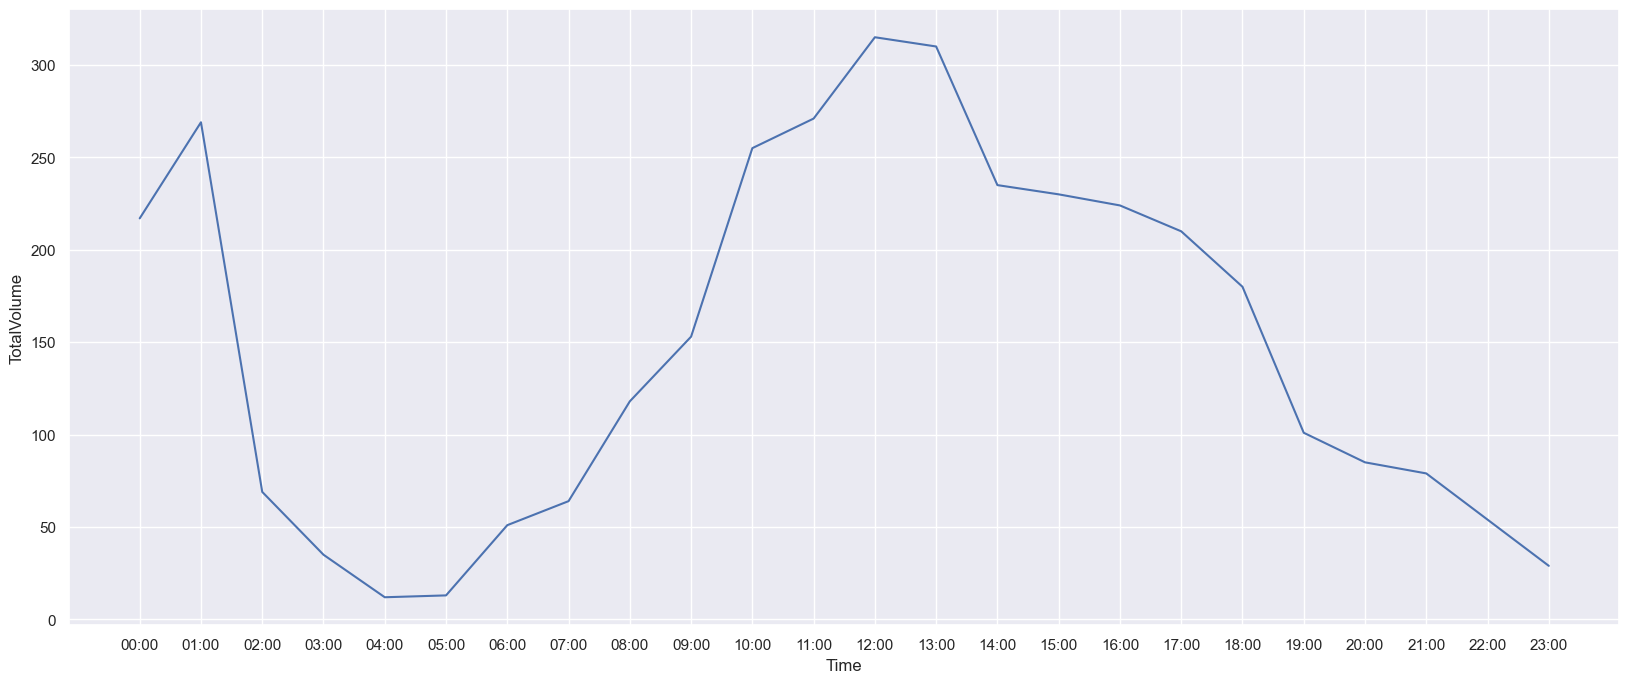

In [67]:
%%time
#Filter the dataset 1st Jan 2022 having TollPointID as SJY
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2022-01-01') ) & ( df_peak['TollPointID'] == "SJY" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<h2>Conclusion:</h2>
<h3>
(i) As per the above descriptive analytics, every year, at the start of the year, 01st Jan 00:30 – 2:30 AM, vehicle traffic was high due to people returning home after celebrating New Year Eve in the city center. This trend can advise people to plan their travel via the toll road.
<br><br>(ii) So, it is recommended for the government to alert following services during this time.
<br><br>&emsp;&emsp;Emergency Ambulance Services.
<br><br>&emsp;&emsp;Car Repair / Breakdown Assistance.
<br><br>&emsp;&emsp;Mobile Speed Camera to control speed.
<br><br>&emsp;&emsp;Increasing speeding fine charges.
<br><br>(iii) This will ensure customer safety.
<br><br>(iv) Government can get revenue from speeding fines.
<br><br>(v) Automobile service companies can benefit from service works.
</h3>

<font color='green'><center><h2><u>Christmas Day</u></h2></center></font>

Wall time: 228 ms


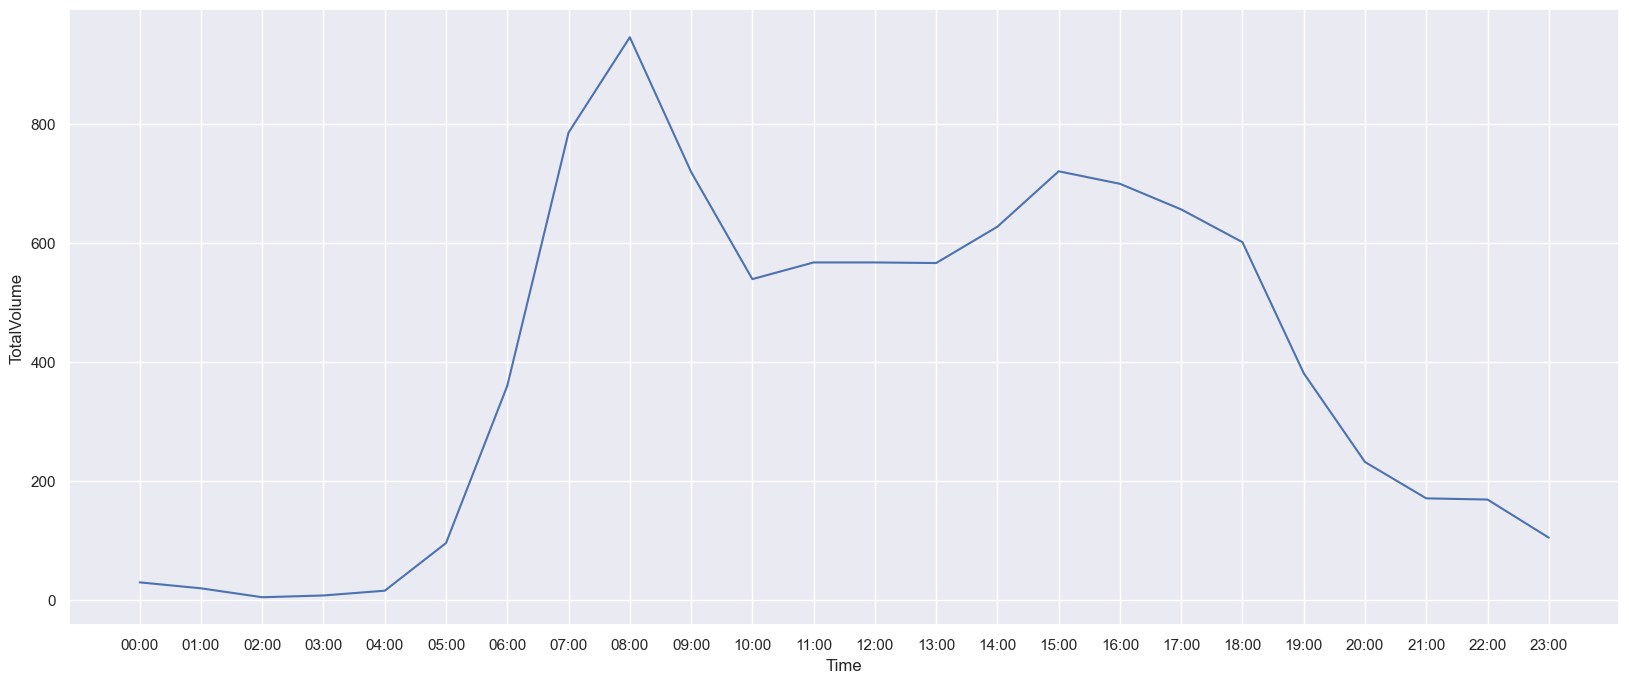

In [68]:
%%time
#Filter the dataset 25th Dec 2018 having TollPointID as SJY
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2018-01-25') ) & ( df_peak['TollPointID'] == "SJY" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

Wall time: 212 ms


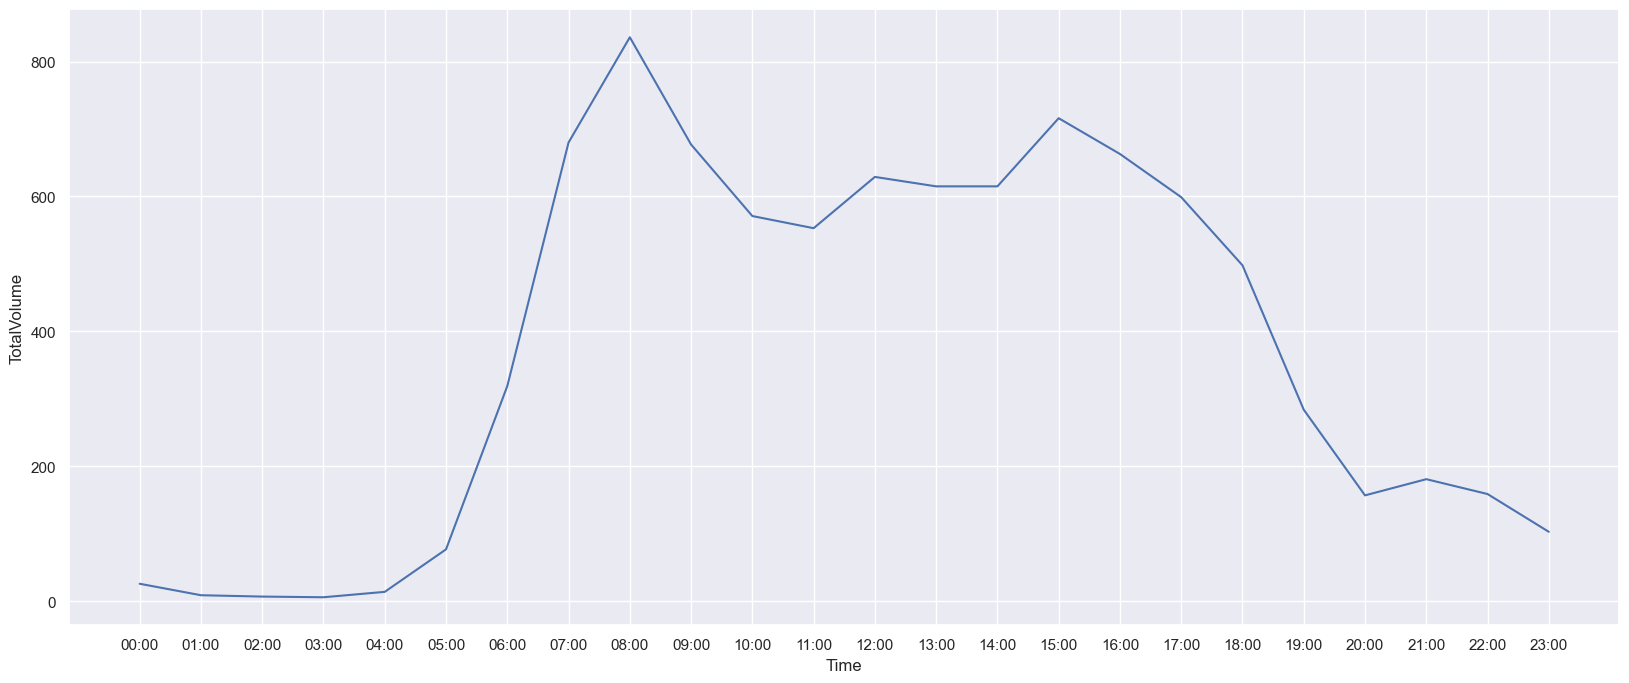

In [69]:
%%time
#Filter the dataset 25th Dec 2019 having TollPointID as SJY
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2019-01-25') ) & ( df_peak['TollPointID'] == "SJY" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

Wall time: 229 ms


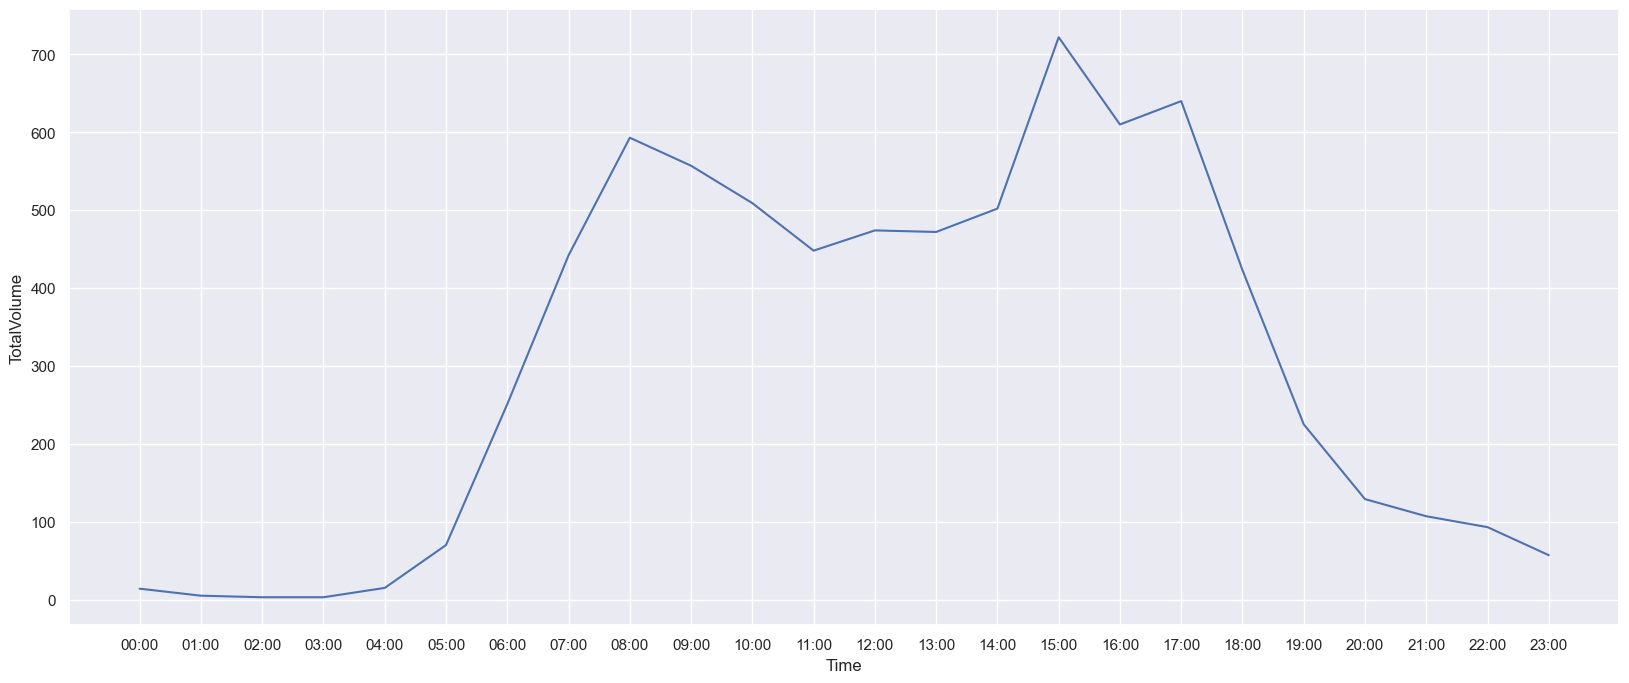

In [70]:
%%time
#Filter the dataset 25th Dec 2022 having TollPointID as SJY
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2022-01-25') ) & ( df_peak['TollPointID'] == "SJY" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<h2>Conclusion:</h2>
<h3>
(i) Looking at the above graphs, peak hours during daytime on Christmas are 6.00am – 10.00am and 2.00pm – 6.00pm.
<br><br>(ii) The project suggests the government to alert the following services during this time duration.
<br><br>&emsp;&emsp;Emergency Ambulance Services.
<br><br>&emsp;&emsp;Car Repair / Breakdown Assistance.
<br><br>&emsp;&emsp;Mobile Speed Camera to control speed.
<br><br>&emsp;&emsp;Increasing speeding fine charges.
<br><br>(iii) These are essential to ensure customer safety.
<br><br>(iv) Government can get revenue from speeding fines.
<br><br>(v) Automobile service companies can benefit from service works.
</h3>

<font color='purple'><center><h1>End: Answering "Special events can affect/change the daily seasonal traffic pattern which will be fetched and shown"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Train and test the hourly traffic volume of cars and trucks in the historical data between 2010 & 2022 and will predict the next hour traffic volume as a short-range prediction"</h1></center></font>

<font color='blue'><center><h2>Model 1: ARIMA</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [67]:
%%time
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

#Auto correlation - To know how many previous data we have to take. 
#p,d,q. p - AR Model Lags, d - Differencing / Integration, q - Moving Average Lags
#q is determined from ACF and p from PACF
#In ACF if band is increasing then the error part is increasing
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA is used when the dataset is non seasonal
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

Wall time: 1.09 s


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [68]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as SJY
df_arima = df_inp_data.copy()
df_arima['Date'] = pd.to_datetime(df_arima['Date'])
df_arima['Year-Month-Day-Time'] = df_arima['Date'].dt.strftime('%Y-%m-%d') + " " + df_arima['IntervalStart'].str.slice(0, 2) + ":00"
df_arima_1 = df_arima[df_arima['TollPointID'] == "SJY"]

Wall time: 18.5 s


In [69]:
%%time
#Creating a dataframe with hour and its total volume
df_arima_2 = df_arima_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_arima_3 = df_arima_2.to_frame()
df_arima_3.to_csv('arima.csv')
df_arima_4 = pd.read_csv("C:/Users/USER/Documents/Toll/arima.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_arima_4['Year-Month-Day-Time'] = pd.to_datetime(df_arima_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_arima_4 = df_arima_4.set_index("Year-Month-Day-Time")

Wall time: 432 ms


In [70]:
%%time
#Display the dataframe with hour and its total volume
df_arima_4

Wall time: 0 ns


TotalVolume
Year-Month-Day-Time             
2010-01-01 00:00:00          248
2010-01-01 01:00:00          588
2010-01-01 02:00:00          195
2010-01-01 03:00:00           76
2010-01-01 04:00:00           46
...                          ...
2022-12-31 19:00:00          184
2022-12-31 20:00:00          106
2022-12-31 21:00:00          172
2022-12-31 22:00:00          175
2022-12-31 23:00:00          109

[113753 rows x 1 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

Wall time: 2.77 s


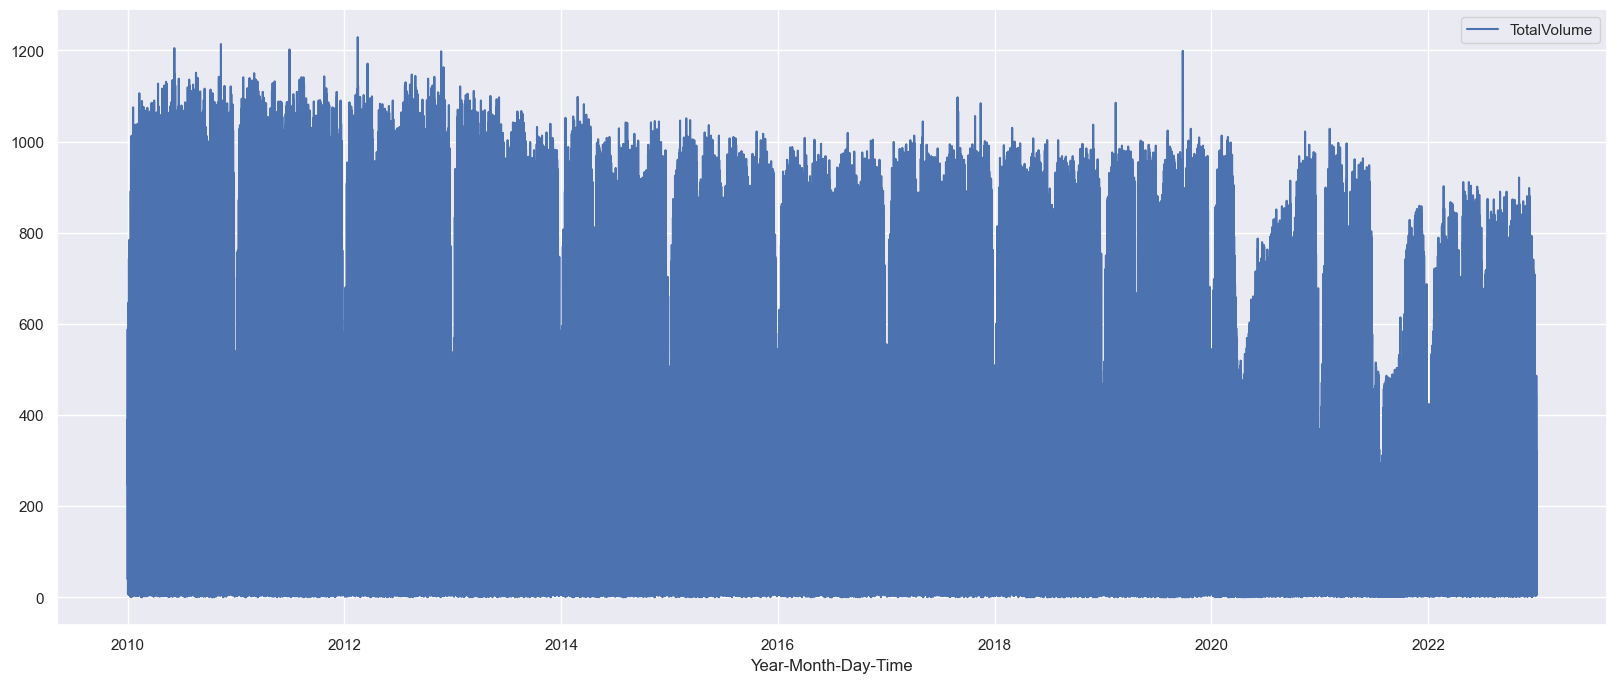

In [71]:
%%time
#Plot hourly traffic volume line graph for the given dataset
sns.lineplot(data=df_arima_4)
sns.set(rc={'figure.figsize':(20,8)})

Wall time: 365 ms


<AxesSubplot:xlabel='Year-Month-Day-Time'>

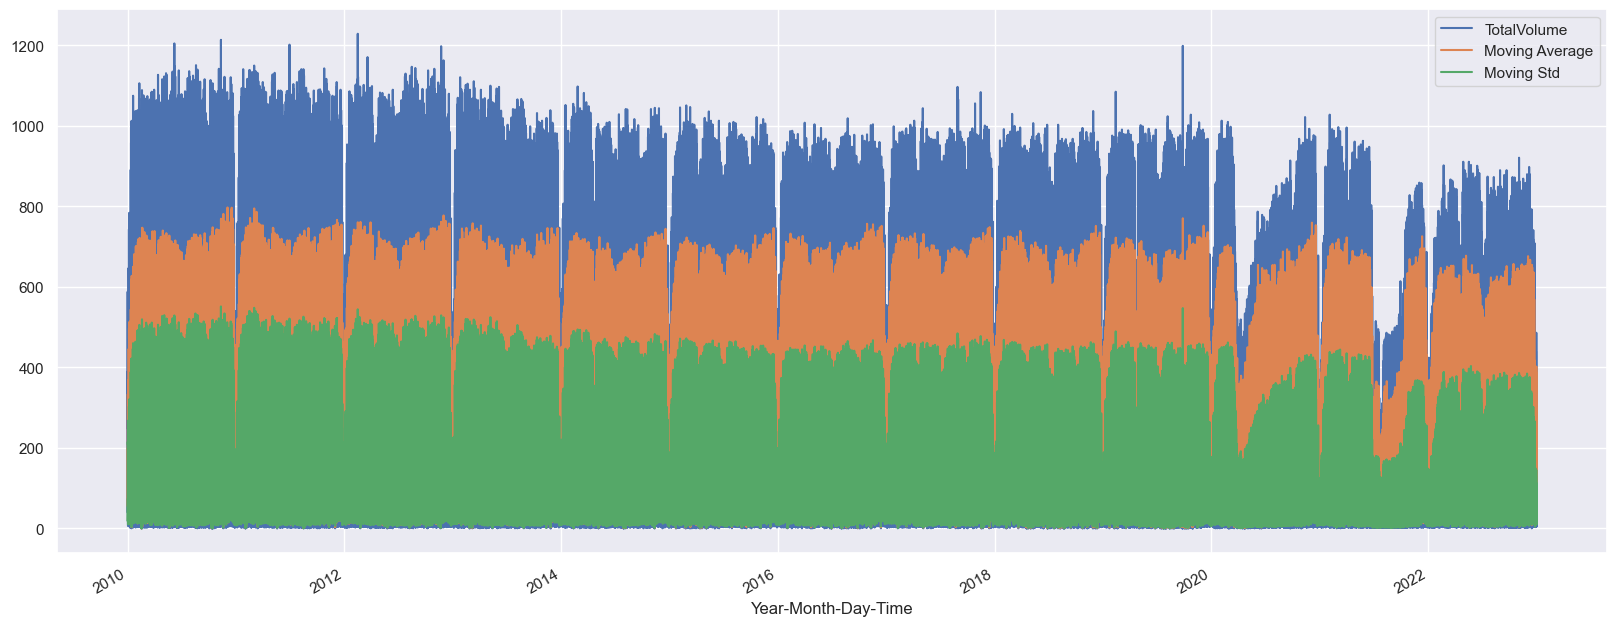

In [72]:
%%time
#Input Data Visualization, Moving average and Moving Standard Deviation
df_arima_4['Moving Average'] = df_arima_4['TotalVolume'].rolling(window=6).mean()
df_arima_4['Moving Std'] = df_arima_4['TotalVolume'].rolling(window=6).std()
df_arima_4.plot.line(y=['TotalVolume','Moving Average','Moving Std'])

<font color='green'><center><h2><u>Stationarity Test: Augmented Dickey-Fuller Test</u></h2></center></font>

In [73]:
%%time
#Ho: It is not stationary
#H1: It is stationary
#This test is for hypothesis testing

def adfuller_test(volume):
    result = adfuller(volume)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    print("Critical values:")
    
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    if result[1] <= 0.05:
        print("p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("p-value: Weak evidence against the null hypothesis, time series has a unit root, indicating it is not stationary")
    
    if result[0] < result[4]["5%"]:
        print("t-value: Reject Ho - Time Series is Stationary")
    else:
        print("t-value: Failed to Reject Ho - Time Series is Non-Stationary")

Wall time: 0 ns


In [74]:
%%time
adfuller_test(df_arima_4['TotalVolume'])

ADF Test Statistic : -23.828569584765024
p-value : 0.0
#Lags Used : 70
Number of Observations Used : 113682
Critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 15.6 s


<font color='green'><center><h2><u>Stationarity Test: Kwiatkowski–Phillips–Schmidt–Shin Test</u></h2></center></font>

In [75]:
%%time
stats, p, lags, critical_values = kpss(df_arima_4['TotalVolume'], 'ct')

Wall time: 86.6 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [76]:
%%time
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.22775982929154945
p-value : 0.01
#Lags Used : 2532
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is not stationary
Wall time: 0 ns


<font color='green'><center><h2><u>Differencing to make data as stationary for future prediction</u></h2></center></font>

In [77]:
%%time
df_arima_4['Volume First Difference'] = df_arima_4['TotalVolume'] - df_arima_4['TotalVolume'].shift(1)

Wall time: 2 ms


In [78]:
%%time
df_arima_4.head(25)

Wall time: 0 ns


TotalVolume  Moving Average  Moving Std  \
Year-Month-Day-Time                                            
2010-01-01 00:00:00          248             NaN         NaN   
2010-01-01 01:00:00          588             NaN         NaN   
2010-01-01 02:00:00          195             NaN         NaN   
2010-01-01 03:00:00           76             NaN         NaN   
2010-01-01 04:00:00           46             NaN         NaN   
2010-01-01 05:00:00           39      198.666667  208.746417   
2010-01-01 06:00:00           49      165.500000  215.054179   
2010-01-01 07:00:00           40       74.166667   60.720397   
2010-01-01 08:00:00           78       54.666667   17.704990   
2010-01-01 09:00:00          162       69.000000   47.749346   
2010-01-01 10:00:00          228       99.333333   78.270471   
2010-01-01 11:00:00          310      144.500000  108.748793   
2010-01-01 12:00:00          390      201.333333  134.834219   
2010-01-01 13:00:00          370      256.333333  122.614300   
2010-01-01 14:00:00          311      295.166667   86.381518   
2010-01-01 15:00:00          313      320.333333   56.733294   
2010-01-01 16:00:00          308      333.666667   36.478304   
2010-01-01 17:00:00          269      326.833333   44.709805   
2010-01-01 18:00:00          228      299.833333   47.746902   
2010-01-01 19:00:00          191      270.000000   50.950957   
2010-01-01 20:00:00          122      238.500000   73.823438   
2010-01-01 21:00:00          133      208.500000   74.066862   
2010-01-01 22:00:00           96      173.166667   67.371854   
2010-01-01 23:00:00           91      143.500000   54.738469   
2010-01-02 00:00:00           35      111.333333   51.779018   

                     Volume First Difference  
Year-Month-Day-Time                           
2010-01-01 00:00:00                      NaN  
2010-01-01 01:00:00                    340.0  
2010-01-01 02:00:00                   -393.0  
2010-01-01 03:00:00                   -119.0  
2010-01-01 04:00:00                    -30.0  
2010-01-01 05:00:00                     -7.0  
2010-01-01 06:00:00                     10.0  
2010-01-01 07:00:00                     -9.0  
2010-01-01 08:00:00                     38.0  
2010-01-01 09:00:00                     84.0  
2010-01-01 10:00:00                     66.0  
2010-01-01 11:00:00                     82.0  
2010-01-01 12:00:00                     80.0  
2010-01-01 13:00:00                    -20.0  
2010-01-01 14:00:00                    -59.0  
2010-01-01 15:00:00                      2.0  
2010-01-01 16:00:00                     -5.0  
2010-01-01 17:00:00                    -39.0  
2010-01-01 18:00:00                    -41.0  
2010-01-01 19:00:00                    -37.0  
2010-01-01 20:00:00                    -69.0  
2010-01-01 21:00:00                     11.0  
2010-01-01 22:00:00                    -37.0  
2010-01-01 23:00:00                     -5.0  
2010-01-02 00:00:00                    -56.0

In [79]:
%%time
#Again do adf test
adfuller_test( df_arima_4['Volume First Difference'].dropna() )

ADF Test Statistic : -67.07759928573729
p-value : 0.0
#Lags Used : 69
Number of Observations Used : 113682
Critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 15.6 s


In [80]:
%%time
#Again do kpss test
stats, p, lags, critical_values = kpss(df_arima_4['Volume First Difference'].dropna(), 'ct')
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.001466360468166217
p-value : 0.1
#Lags Used : 490
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is stationary
Wall time: 39.9 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<font color='green'><center><h2><u>Visualize first order shifted dataset</u></h2></center></font>

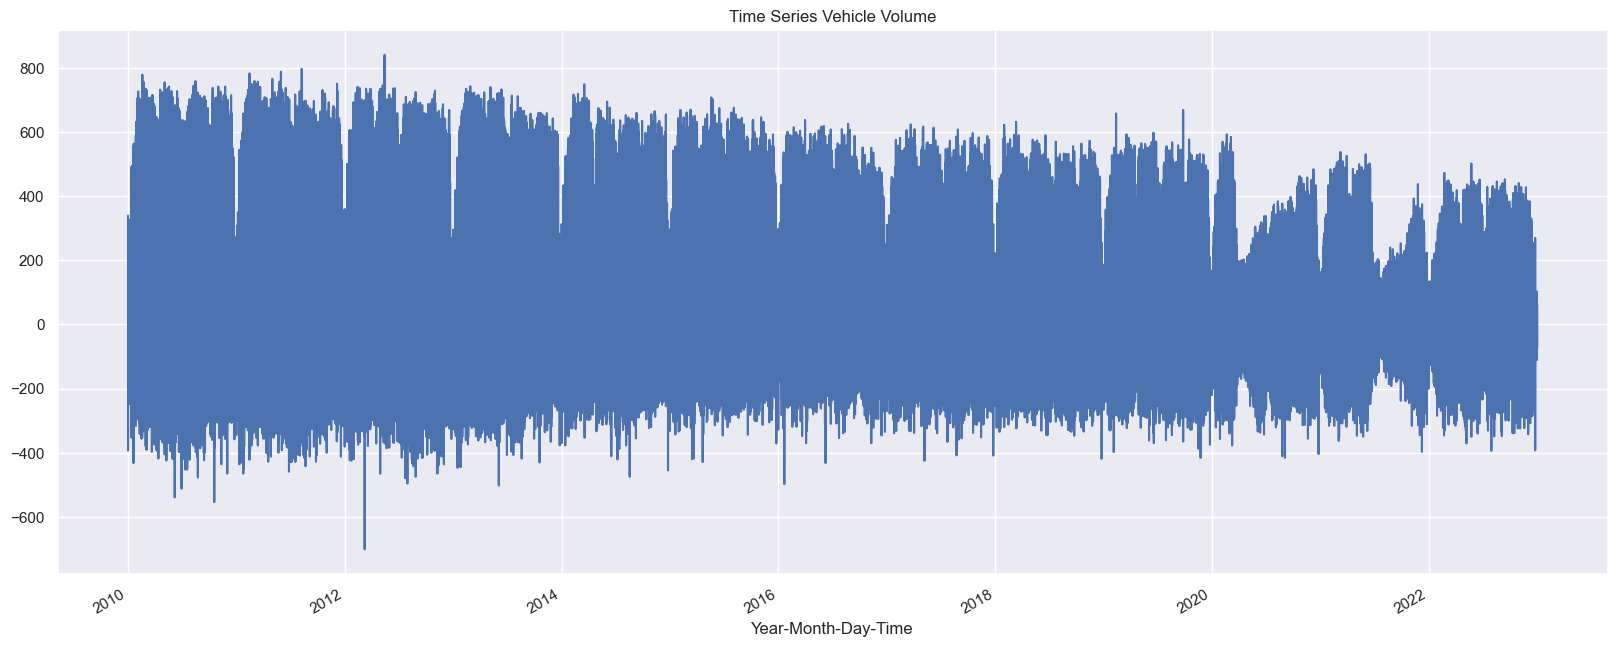

Wall time: 1.07 s


In [81]:
%%time
df_arima_4['Volume First Difference'].plot(figsize=(20,8), title="Time Series Vehicle Volume")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

Wall time: 324 ms


<AxesSubplot:xlabel='Year-Month-Day-Time'>

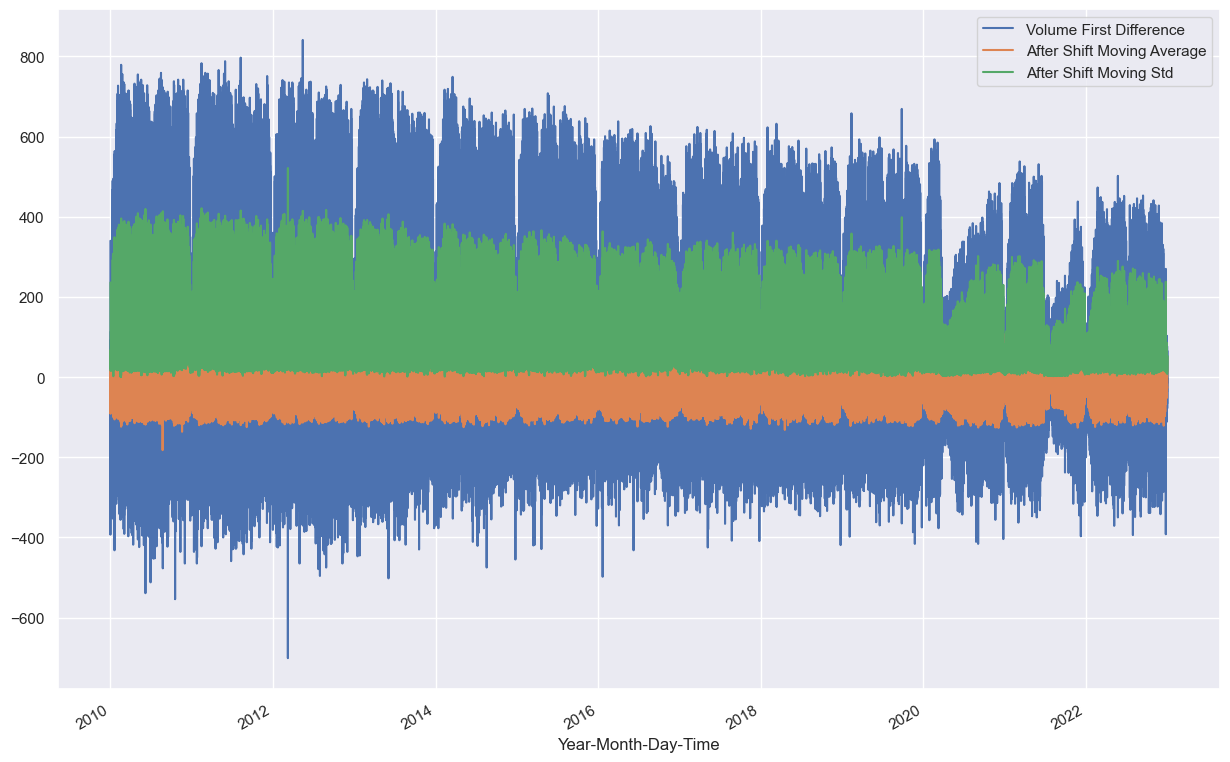

In [82]:
%%time
#Moving average and Moving standard deviation
df_arima_4['After Shift Moving Average'] = df_arima_4['Volume First Difference'].rolling(window=6).mean()
df_arima_4['After Shift Moving Std'] = df_arima_4['Volume First Difference'].rolling(window=6).std()
df_arima_4.plot.line(y=['Volume First Difference','After Shift Moving Average','After Shift Moving Std'])

<font color='green'><center><h2><u>Seasonality Check</u></h2></center></font>

Additive Decomposition:


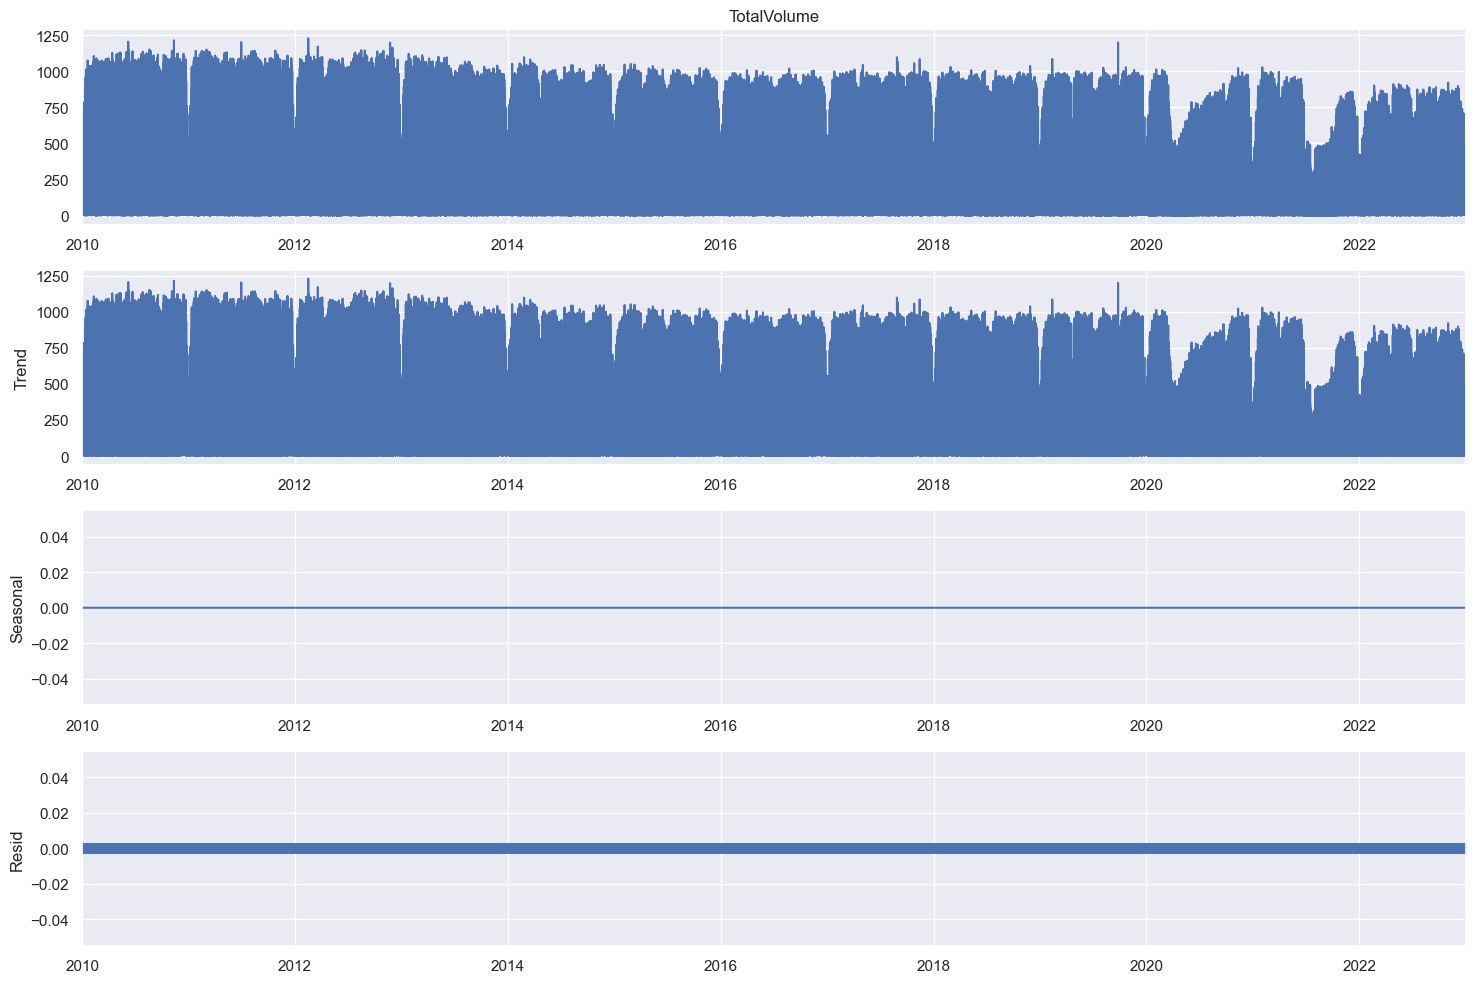

Wall time: 1.65 s


In [83]:
%%time
# Naive decomposition Additive
# observed = Trend + Sesonal + Residual
print("Additive Decomposition:")
result_additive = seasonal_decompose(x=df_arima_4['TotalVolume'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (15,10)})
result_additive.plot().suptitle('', fontsize=20)
plt.show()

In [84]:
%%time
df_arima_4['Seasonal First Difference'] = df_arima_4['TotalVolume'] - df_arima_4['TotalVolume'].shift(24)

Wall time: 3.02 ms


In [85]:
%%time
df_arima_4.head(25)

Wall time: 0 ns


TotalVolume  Moving Average  Moving Std  \
Year-Month-Day-Time                                            
2010-01-01 00:00:00          248             NaN         NaN   
2010-01-01 01:00:00          588             NaN         NaN   
2010-01-01 02:00:00          195             NaN         NaN   
2010-01-01 03:00:00           76             NaN         NaN   
2010-01-01 04:00:00           46             NaN         NaN   
2010-01-01 05:00:00           39      198.666667  208.746417   
2010-01-01 06:00:00           49      165.500000  215.054179   
2010-01-01 07:00:00           40       74.166667   60.720397   
2010-01-01 08:00:00           78       54.666667   17.704990   
2010-01-01 09:00:00          162       69.000000   47.749346   
2010-01-01 10:00:00          228       99.333333   78.270471   
2010-01-01 11:00:00          310      144.500000  108.748793   
2010-01-01 12:00:00          390      201.333333  134.834219   
2010-01-01 13:00:00          370      256.333333  122.614300   
2010-01-01 14:00:00          311      295.166667   86.381518   
2010-01-01 15:00:00          313      320.333333   56.733294   
2010-01-01 16:00:00          308      333.666667   36.478304   
2010-01-01 17:00:00          269      326.833333   44.709805   
2010-01-01 18:00:00          228      299.833333   47.746902   
2010-01-01 19:00:00          191      270.000000   50.950957   
2010-01-01 20:00:00          122      238.500000   73.823438   
2010-01-01 21:00:00          133      208.500000   74.066862   
2010-01-01 22:00:00           96      173.166667   67.371854   
2010-01-01 23:00:00           91      143.500000   54.738469   
2010-01-02 00:00:00           35      111.333333   51.779018   

                     Volume First Difference  After Shift Moving Average  \
Year-Month-Day-Time                                                        
2010-01-01 00:00:00                      NaN                         NaN   
2010-01-01 01:00:00                    340.0                         NaN   
2010-01-01 02:00:00                   -393.0                         NaN   
2010-01-01 03:00:00                   -119.0                         NaN   
2010-01-01 04:00:00                    -30.0                         NaN   
2010-01-01 05:00:00                     -7.0                         NaN   
2010-01-01 06:00:00                     10.0                  -33.166667   
2010-01-01 07:00:00                     -9.0                  -91.333333   
2010-01-01 08:00:00                     38.0                  -19.500000   
2010-01-01 09:00:00                     84.0                   14.333333   
2010-01-01 10:00:00                     66.0                   30.333333   
2010-01-01 11:00:00                     82.0                   45.166667   
2010-01-01 12:00:00                     80.0                   56.833333   
2010-01-01 13:00:00                    -20.0                   55.000000   
2010-01-01 14:00:00                    -59.0                   38.833333   
2010-01-01 15:00:00                      2.0                   25.166667   
2010-01-01 16:00:00                     -5.0                   13.333333   
2010-01-01 17:00:00                    -39.0                   -6.833333   
2010-01-01 18:00:00                    -41.0                  -27.000000   
2010-01-01 19:00:00                    -37.0                  -29.833333   
2010-01-01 20:00:00                    -69.0                  -31.500000   
2010-01-01 21:00:00                     11.0                  -30.000000   
2010-01-01 22:00:00                    -37.0                  -35.333333   
2010-01-01 23:00:00                     -5.0                  -29.666667   
2010-01-02 00:00:00                    -56.0                  -32.166667   

                     After Shift Moving Std  Seasonal First Difference  
Year-Month-Day-Time                                                     
2010-01-01 00:00:00                     NaN                        NaN  
2010-01-01 01:00:00 

In [86]:
%%time
#Again do adf test
adfuller_test( df_arima_4['Seasonal First Difference'].dropna() )

ADF Test Statistic : -57.064014810873786
p-value : 0.0
#Lags Used : 70
Number of Observations Used : 113658
Critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 15.5 s


In [87]:
%%time
#Again do kpss test
stats, p, lags, critical_values = kpss(df_arima_4['Seasonal First Difference'].dropna(), 'ct')
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.0010407353445420907
p-value : 0.1
#Lags Used : 114
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is stationary
Wall time: 20.1 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<font color='green'><center><h2><u>Visualize seasonal order shifted dataset</u></h2></center></font>

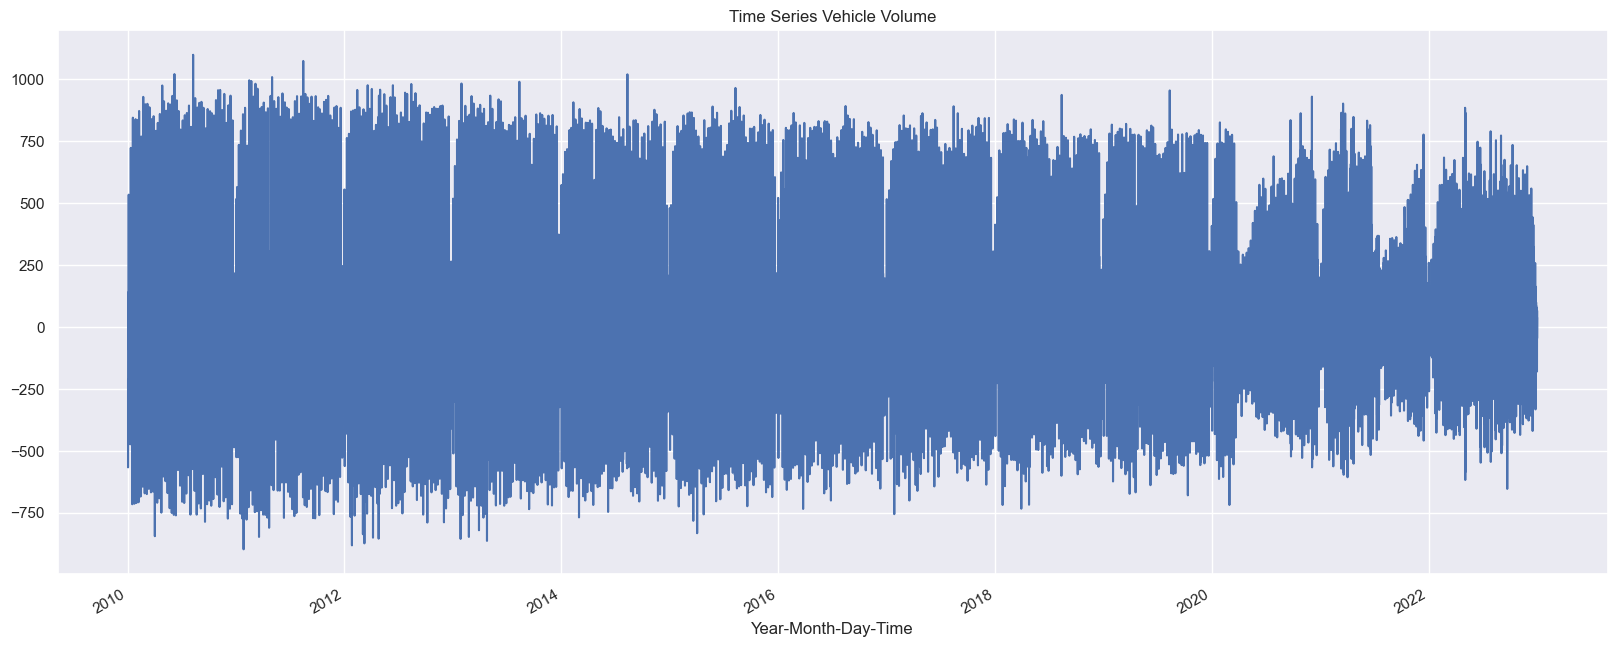

Wall time: 744 ms


In [88]:
%%time
df_arima_4['Seasonal First Difference'].plot(figsize=(20,8), title="Time Series Vehicle Volume")
plt.show()

<font color='green'><center><h2><u>Plot Autocorrelation & Partial Autocorrelation</u></h2></center></font>

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Wall time: 1.39 s


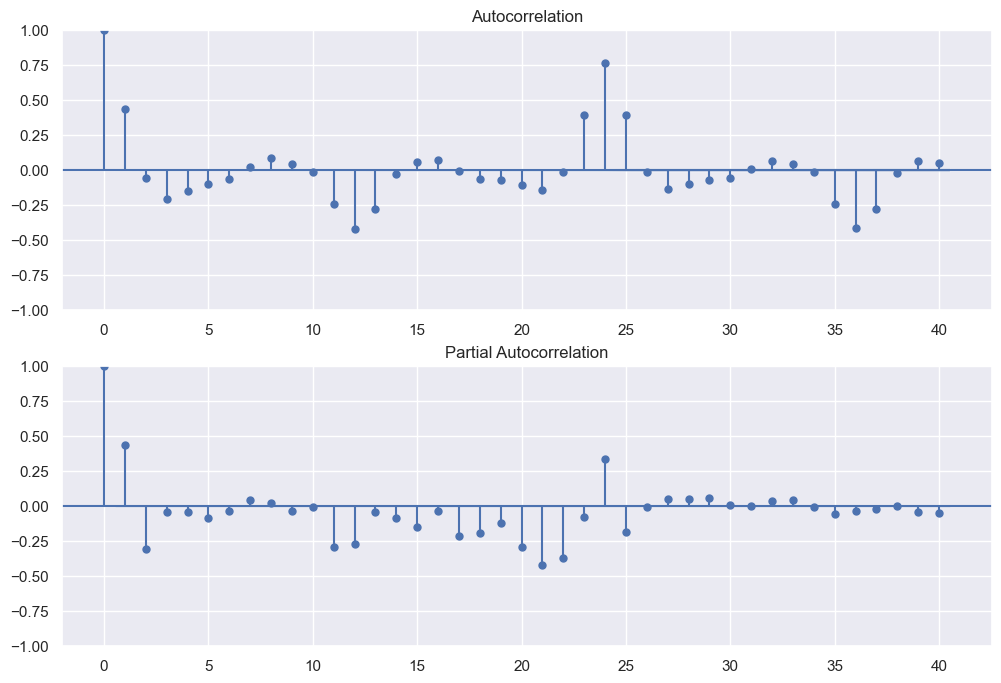

In [89]:
%%time
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_arima_4['Volume First Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_arima_4['Volume First Difference'].iloc[2:],lags=40,ax=ax2)

In [90]:
%%time
model = sm.tsa.arima.ARIMA(df_arima_4['TotalVolume'], order=(9,1,9))
results = model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

Wall time: 3min 51s


<font color='green'><center><h2><u>Forecast / Predict using ARIMA model</u></h2></center></font>

Wall time: 410 ms


<AxesSubplot:xlabel='Year-Month-Day-Time'>

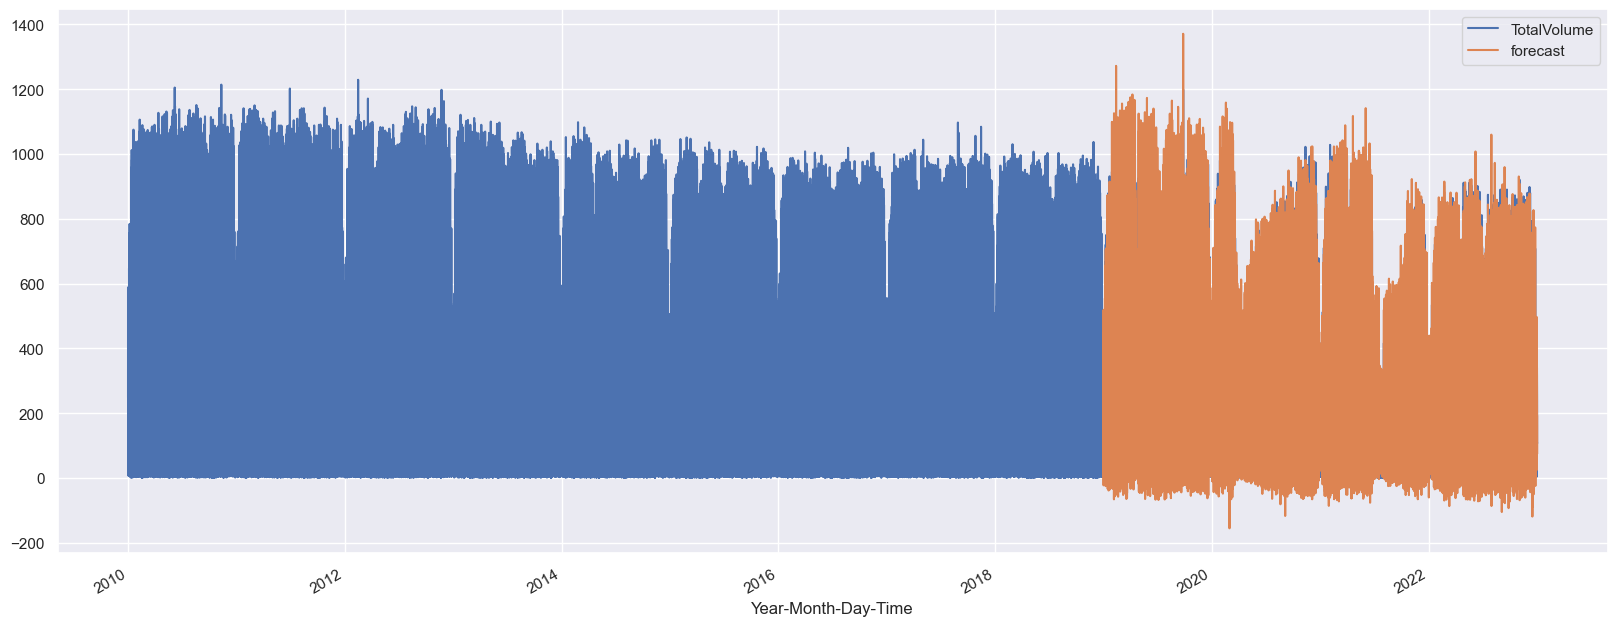

In [91]:
%%time
df_arima_4['forecast'] = results.predict(start=78888, end = 113752, dynamic= False)
df_arima_4[['TotalVolume','forecast']].plot(figsize=(20,8))

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [92]:
%%time
ErrorValue = np.abs( df_arima_4['TotalVolume'] - df_arima_4['forecast'] )
print('Mean Abosolute Error Score of the predicted Dataset:', round(ErrorValue.mean(),2) )

Mean Abosolute Error Score of the predicted Dataset: 67.39
Wall time: 2.99 ms


<font color='blue'><center><h2>Model 2: LSTM</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [69]:
%%time
#Import Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

Wall time: 9.38 s


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [70]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as SJY
df_lstm = df_inp_data.copy()
df_lstm['Date'] = pd.to_datetime(df_lstm['Date'])
df_lstm['Year-Month-Day-Time'] = df_lstm['Date'].dt.strftime('%Y-%m-%d') + " " + df_lstm['IntervalStart'].str.slice(0, 2) + ":00"
df_lstm_1 = df_lstm[df_lstm['TollPointID'] == "SJY"]

Wall time: 26.7 s


In [71]:
%%time
#Creating a dataframe with hour and its total volume
df_lstm_2 = df_lstm_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_lstm_3 = df_lstm_2.to_frame()
df_lstm_3.to_csv('lstm.csv')
df_lstm_4 = pd.read_csv("C:/Users/USER/Documents/Toll/lstm.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_lstm_4['Year-Month-Day-Time'] = pd.to_datetime(df_lstm_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_lstm_4 = df_lstm_4.set_index("Year-Month-Day-Time")

Wall time: 566 ms


In [72]:
%%time
#Display the dataframe with hour and its total volume
df_lstm_4

Wall time: 0 ns


TotalVolume
Year-Month-Day-Time             
2010-01-01 00:00:00          248
2010-01-01 01:00:00          588
2010-01-01 02:00:00          195
2010-01-01 03:00:00           76
2010-01-01 04:00:00           46
...                          ...
2022-12-31 19:00:00          184
2022-12-31 20:00:00          106
2022-12-31 21:00:00          172
2022-12-31 22:00:00          175
2022-12-31 23:00:00          109

[113753 rows x 1 columns]

In [73]:
%%time
#Convert total volume to float
df_lstm_5 = df_lstm_4.values
df_lstm_5 = df_lstm_5.astype('float32')

Wall time: 0 ns


In [74]:
%%time
#Display Total Volume as float
df_lstm_5

Wall time: 0 ns


array([[248.],
       [588.],
       [195.],
       ...,
       [172.],
       [175.],
       [109.]], dtype=float32)

<font color='green'><center><h2><u>Data Normalization</u></h2></center></font>

In [75]:
%%time
#Normalize the dataset
scaler = MinMaxScaler()
df_lstm_6 = scaler.fit_transform(df_lstm_5)

Wall time: 3.98 ms


<font color='green'><center><h2><u>Training & Testing Dataset</u></h2></center></font>

In [76]:
%%time
#Split dataset into train and test
training_size = int(len(df_lstm_6)*0.70)
print ("Training size:",training_size)

testing_size = len(df_lstm_6) - training_size
print ("Testing size:",testing_size)

train, test = df_lstm_6[:training_size], df_lstm_6[training_size:]

Training size: 79627
Testing size: 34126
Wall time: 0 ns


In [77]:
%%time
#Create dataset matrix
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

Wall time: 0 ns


In [78]:
%%time
#Look back 730 values
look_back = 730
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#Reshape training & testing dataset
trainX = np.reshape(trainX, (trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1]))

Wall time: 282 ms


<font color='green'><center><h2><u>Model Creation</u></h2></center></font>

In [79]:
%%time
#Create LSTM Model
model = Sequential()
model.add(LSTM(256,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               1010688   
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,010,945
Trainable params: 1,010,945
Non-trainable params: 0
_________________________________________________________________
Wall time: 500 ms


In [80]:
%%time
#fit the model
model.fit(trainX, trainY, batch_size=50, verbose=2, epochs=10)

Epoch 1/10
1578/1578 - 22s - loss: 0.0041 - mse: 0.0041 - 22s/epoch - 14ms/step
Epoch 2/10
1578/1578 - 19s - loss: 0.0017 - mse: 0.0017 - 19s/epoch - 12ms/step
Epoch 3/10
1578/1578 - 18s - loss: 0.0015 - mse: 0.0015 - 18s/epoch - 12ms/step
Epoch 4/10
1578/1578 - 18s - loss: 0.0013 - mse: 0.0013 - 18s/epoch - 11ms/step
Epoch 5/10
1578/1578 - 18s - loss: 0.0012 - mse: 0.0012 - 18s/epoch - 12ms/step
Epoch 6/10
1578/1578 - 18s - loss: 0.0011 - mse: 0.0011 - 18s/epoch - 12ms/step
Epoch 7/10
1578/1578 - 18s - loss: 0.0011 - mse: 0.0011 - 18s/epoch - 12ms/step
Epoch 8/10
1578/1578 - 18s - loss: 0.0010 - mse: 0.0010 - 18s/epoch - 12ms/step
Epoch 9/10
1578/1578 - 18s - loss: 0.0010 - mse: 0.0010 - 18s/epoch - 12ms/step
Epoch 10/10
1578/1578 - 18s - loss: 9.6672e-04 - mse: 9.6672e-04 - 18s/epoch - 12ms/step
Wall time: 3min 7s


<font color='green'><center><h2><u>Predict train & test dataset</u></h2></center></font>

In [81]:
%%time
#Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1044/1044 [==============================] - 3s 3ms/step
Wall time: 12.7 s


In [82]:
%%time
#Inverse Transform Function
trainPredict2 = scaler.inverse_transform(trainPredict)
testPredict2 = scaler.inverse_transform(testPredict)

trainY2 = scaler.inverse_transform([trainY])
testY2 = scaler.inverse_transform([testY])

Wall time: 1.03 ms


<font color='green'><center><h2><u>Visualize Original Vs Predicted Dataset</u></h2></center></font>

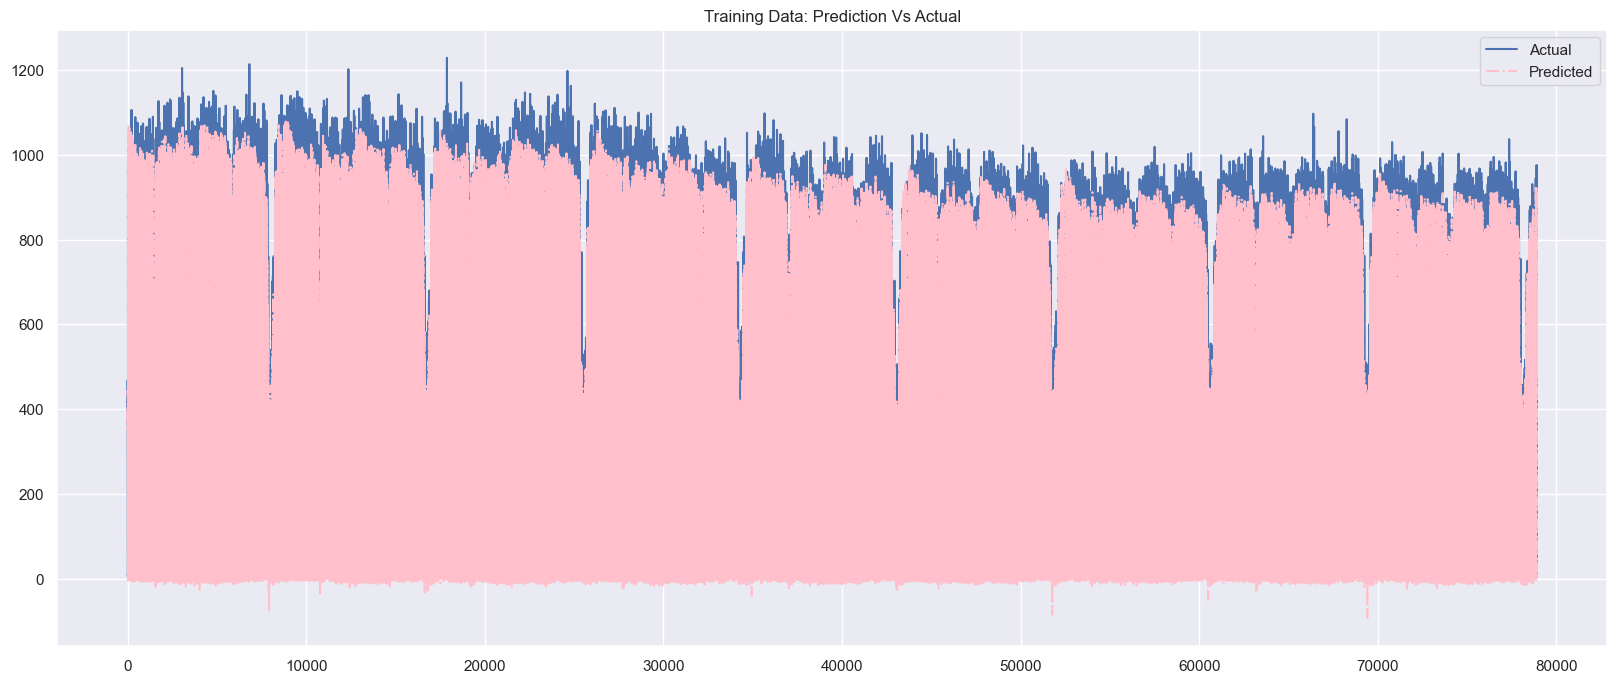

Wall time: 1.39 s


In [83]:
%%time
plt.figure(figsize=(20,8))
plt.plot(trainY2[0].tolist())
plt.plot(trainPredict2.tolist(), color='pink', linestyle='dashdot')
plt.title("Training Data: Prediction Vs Actual")
plt.legend(["Actual", "Predicted"])
plt.show()

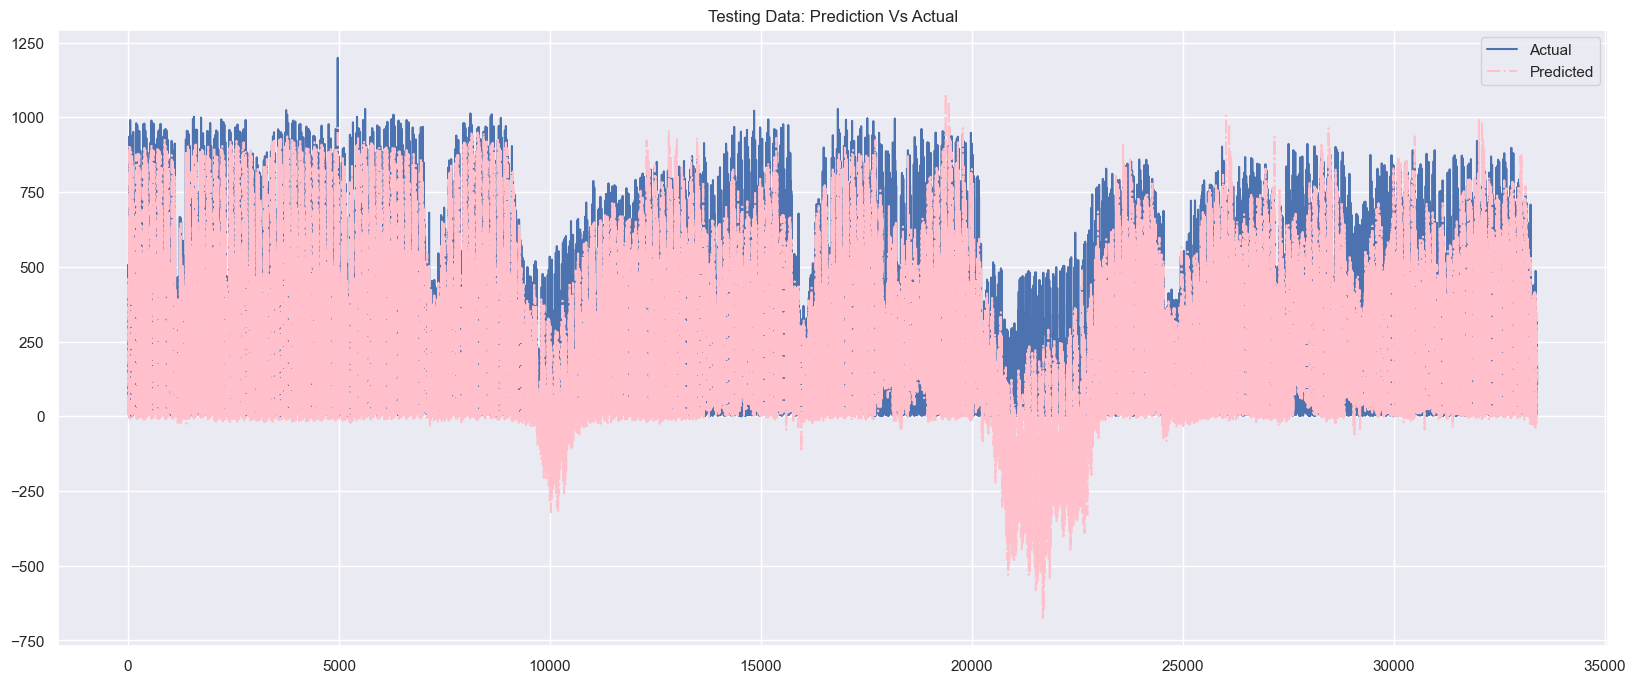

Wall time: 663 ms


In [84]:
%%time
plt.figure(figsize=(20,8))
plt.plot(testY2[0].tolist())
plt.plot(testPredict2.tolist(), color='pink', linestyle='dashdot')
plt.title("Testing Data: Prediction Vs Actual")
plt.legend(["Actual", "Predicted"])
plt.show()

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [86]:
%%time
# Calculate Mean Absolute Error
ErrorValue = np.abs( trainY2[0] - trainPredict2[:,0] )
print('Mean Abosolute Error Score of the Training Dataset:', round(ErrorValue.mean(),2) )

ErrorValue = np.abs( testY2[0] - testPredict2[:,0] )
print('Mean Abosolute Error Score of the Testing Dataset:', round(ErrorValue.mean(),2) )

Mean Abosolute Error Score of the Training Dataset: 33.3
Mean Abosolute Error Score of the Testing Dataset: 86.02
Wall time: 7.98 ms


<font color='blue'><center><h2>Model 3: DecisionTreeRegressor</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [87]:
%%time
#Import Libraries
from sklearn.tree import DecisionTreeRegressor

Wall time: 848 ms


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [88]:
%%time
#Input traffic data set
#Filter and store the dataset having TollPointID as SJY
df_dtregressor = df_inp_data.copy()
df_dtregressor['Date'] = pd.to_datetime(df_dtregressor['Date'])
df_dtregressor['Year-Month-Day-Time'] = df_dtregressor['Date'].dt.strftime('%Y-%m-%d') + " " + df_dtregressor['IntervalStart'].str.slice(0, 2) + ":00"
df_dtregressor_1 = df_dtregressor[df_dtregressor['TollPointID'] == "SJY"]

Wall time: 25.3 s


In [89]:
%%time
#Creating a dataframe with hour and its total volume
df_dtregressor_2 = df_dtregressor_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_dtregressor_3 = df_dtregressor_2.to_frame()
df_dtregressor_3.to_csv('dt.csv')
df_dtregressor_4 = pd.read_csv("C:/Users/USER/Documents/Toll/dt.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_dtregressor_4['Year-Month-Day-Time'] = pd.to_datetime(df_dtregressor_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_dtregressor_4 = df_dtregressor_4.set_index("Year-Month-Day-Time")

Wall time: 575 ms


In [90]:
%%time
#Display the dataframe with hour and its total volume
df_dtregressor_4

Wall time: 0 ns


TotalVolume
Year-Month-Day-Time             
2010-01-01 00:00:00          248
2010-01-01 01:00:00          588
2010-01-01 02:00:00          195
2010-01-01 03:00:00           76
2010-01-01 04:00:00           46
...                          ...
2022-12-31 19:00:00          184
2022-12-31 20:00:00          106
2022-12-31 21:00:00          172
2022-12-31 22:00:00          175
2022-12-31 23:00:00          109

[113753 rows x 1 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

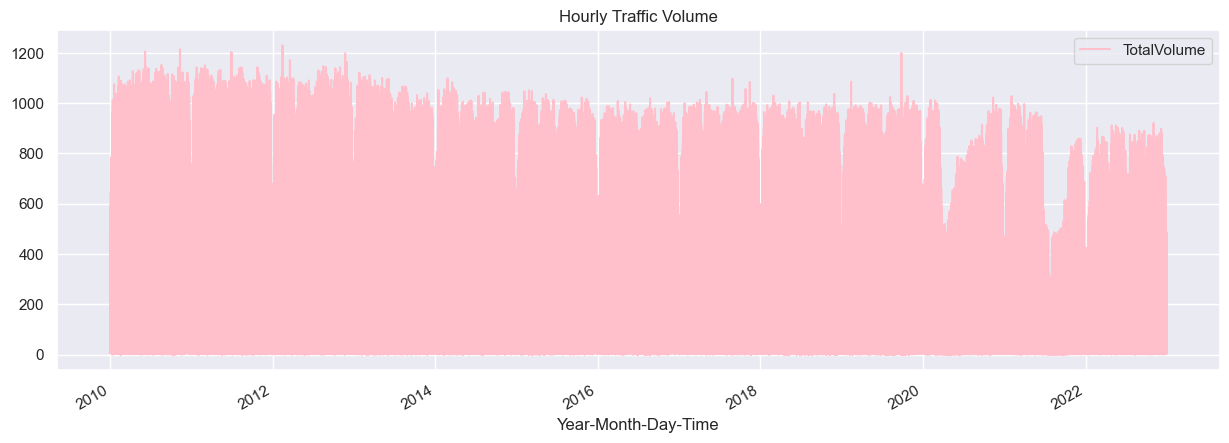

Wall time: 1.67 s


In [91]:
%%time
#Plot hourly traffic volume line graph for the given dataset
df_dtregressor_4.plot(style='-', figsize=(15,5), color='pink', title='Hourly Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Training & Testing Dataset</u></h2></center></font>

In [92]:
%%time
#Split train and test dataset as a time series
training_df = df_dtregressor_4.loc[df_dtregressor_4.index < '01-01-2019']
testing_df = df_dtregressor_4.loc[ (df_dtregressor_4.index >= '01-01-2019') ]

Wall time: 5.98 ms


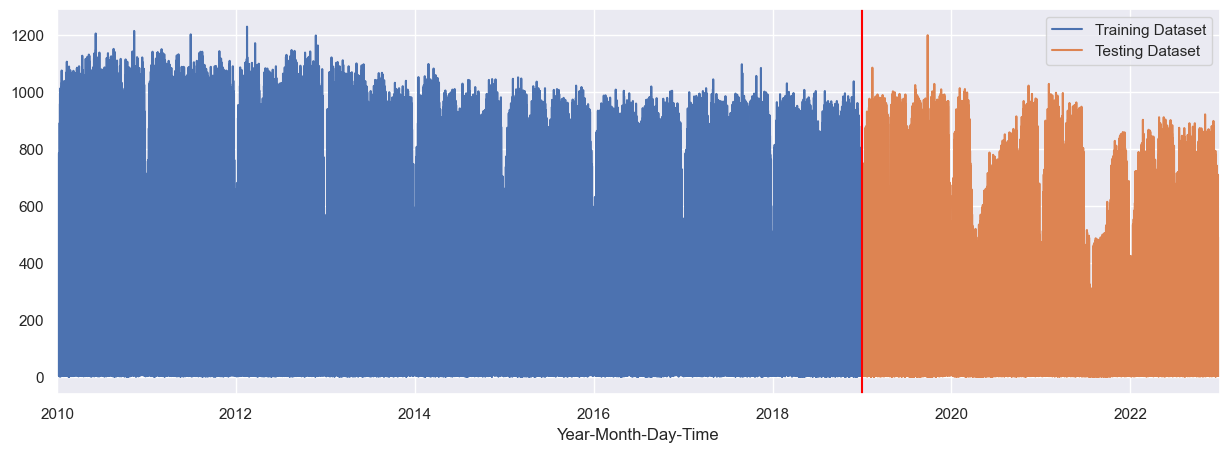

Wall time: 1.17 s


In [93]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2019', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [94]:
%%time
#Below is the feature creation created as a function
def dt_feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [95]:
%%time
#Diplay features
df = dt_feature_creation(df_dtregressor_4)
df

Wall time: 72.8 ms


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2010-01-01 00:00:00          248     0                4        1      1  2010   
2010-01-01 01:00:00          588     1                4        1      1  2010   
2010-01-01 02:00:00          195     2                4        1      1  2010   
2010-01-01 03:00:00           76     3                4        1      1  2010   
2010-01-01 04:00:00           46     4                4        1      1  2010   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00          184    19                5        4     12  2022   
2022-12-31 20:00:00          106    20                5        4     12  2022   
2022-12-31 21:00:00          172    21                5        4     12  2022   
2022-12-31 22:00:00          175    22                5        4     12  2022   
2022-12-31 23:00:00          109    23                5        4     12  2022   

                     Day of the year  
Year-Month-Day-Time                   
2010-01-01 00:00:00                1  
2010-01-01 01:00:00                1  
2010-01-01 02:00:00                1  
2010-01-01 03:00:00                1  
2010-01-01 04:00:00                1  
...                              ...  
2022-12-31 19:00:00              365  
2022-12-31 20:00:00              365  
2022-12-31 21:00:00              365  
2022-12-31 22:00:00              365  
2022-12-31 23:00:00              365  

[113753 rows x 7 columns]

In [96]:
%%time
#Adding features to train and test dataset
training_df = dt_feature_creation(training_df)
testing_df = dt_feature_creation(testing_df)
COLUMN_FEATURES = ['Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
COLUMN_TARGET = ['TotalVolume']

Wall time: 73.8 ms


In [97]:
%%time
X_train = training_df[COLUMN_FEATURES]
y_train = training_df[COLUMN_TARGET]

X_test = testing_df[COLUMN_FEATURES]
y_test = testing_df[COLUMN_TARGET]

Wall time: 13 ms


<font color='green'><center><h2><u>Model Creation</u></h2></center></font>

In [98]:
%%time
#Create the model
#dtRegressor = DecisionTreeRegressor(max_depth=48, min_samples_leaf=0.1)
dtRegressor = DecisionTreeRegressor()
dtRegressor.fit(X_train, y_train
       )

Wall time: 320 ms


DecisionTreeRegressor()

<font color='green'><center><h2><u>Predict test dataset</u></h2></center></font>

In [99]:
%%time
testing_df['PredictedVolume'] = dtRegressor.predict(X_test)

Wall time: 14 ms


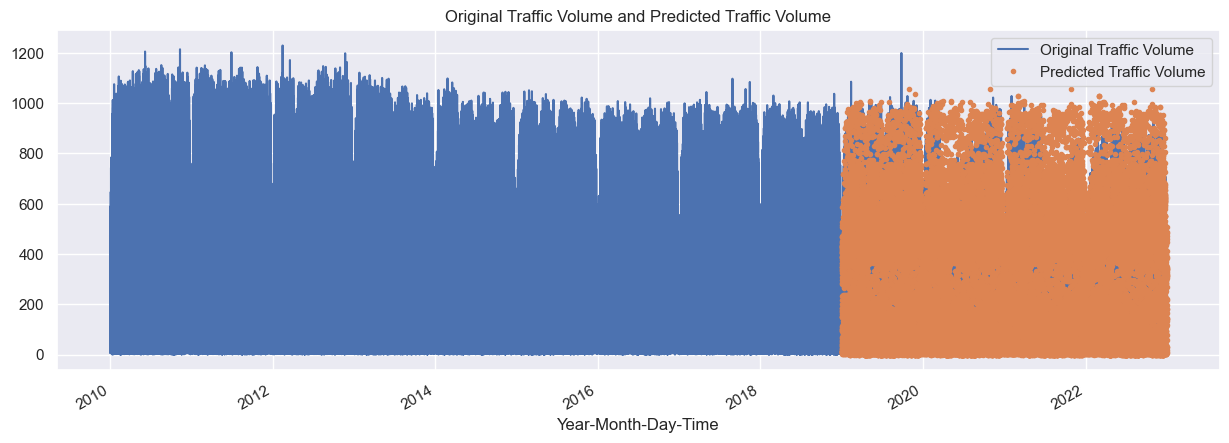

Wall time: 1.56 s


In [100]:
%%time
df = df.merge(testing_df['PredictedVolume'], how='left', left_index = True, right_index = True)
ax = df['TotalVolume'].plot(figsize=(15,5))
df['PredictedVolume'].plot(ax=ax, style='.')
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
ax.set_title('Original Traffic Volume and Predicted Traffic Volume')
plt.show()

In [101]:
%%time
#Display test data with predicted traffic volume
testing_df

Wall time: 0 ns


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2019-01-01 00:00:00          263     0                1        1      1  2019   
2019-01-01 01:00:00          449     1                1        1      1  2019   
2019-01-01 02:00:00          183     2                1        1      1  2019   
2019-01-01 03:00:00           92     3                1        1      1  2019   
2019-01-01 04:00:00           36     4                1        1      1  2019   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00          184    19                5        4     12  2022   
2022-12-31 20:00:00          106    20                5        4     12  2022   
2022-12-31 21:00:00          172    21                5        4     12  2022   
2022-12-31 22:00:00          175    22                5        4     12  2022   
2022-12-31 23:00:00          109    23                5        4     12  2022   

                     Day of the year  PredictedVolume  
Year-Month-Day-Time                                    
2019-01-01 00:00:00                1            233.0  
2019-01-01 01:00:00                1            585.0  
2019-01-01 02:00:00                1            202.0  
2019-01-01 03:00:00                1             94.0  
2019-01-01 04:00:00                1             35.0  
...                              ...              ...  
2022-12-31 19:00:00              365            220.0  
2022-12-31 20:00:00              365            181.0  
2022-12-31 21:00:00              365            143.0  
2022-12-31 22:00:00              365            217.0  
2022-12-31 23:00:00              365            134.0  

[34865 rows x 8 columns]

<font color='green'><center><h2><u>Plot Predicted Next Hour Traffic Volume of test dataset</u></h2></center></font>

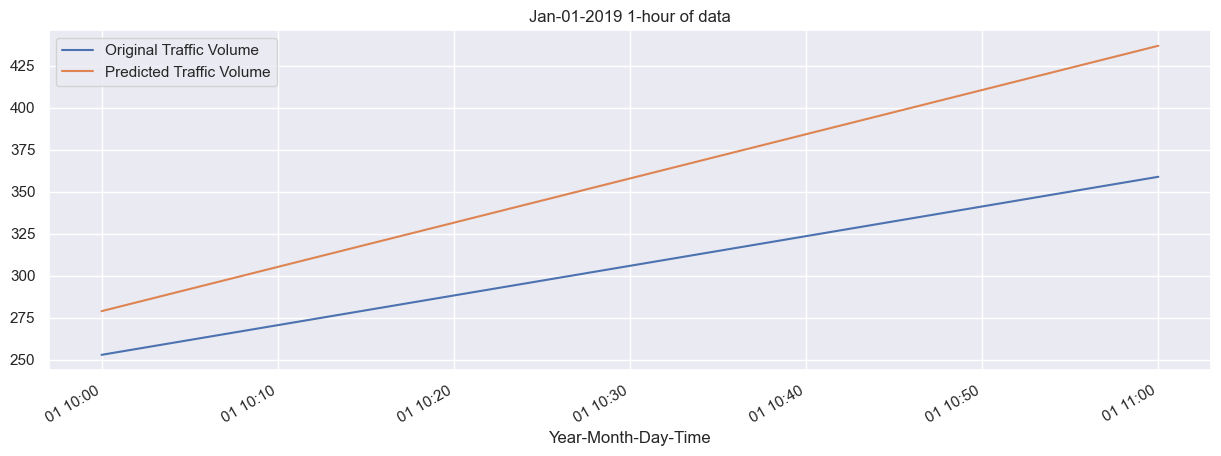

Wall time: 279 ms


In [102]:
%%time
#Hourly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan-01-2019 1-hour of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Plot Predicted Next one week Traffic Volume of test dataset for understanding</u></h2></center></font>

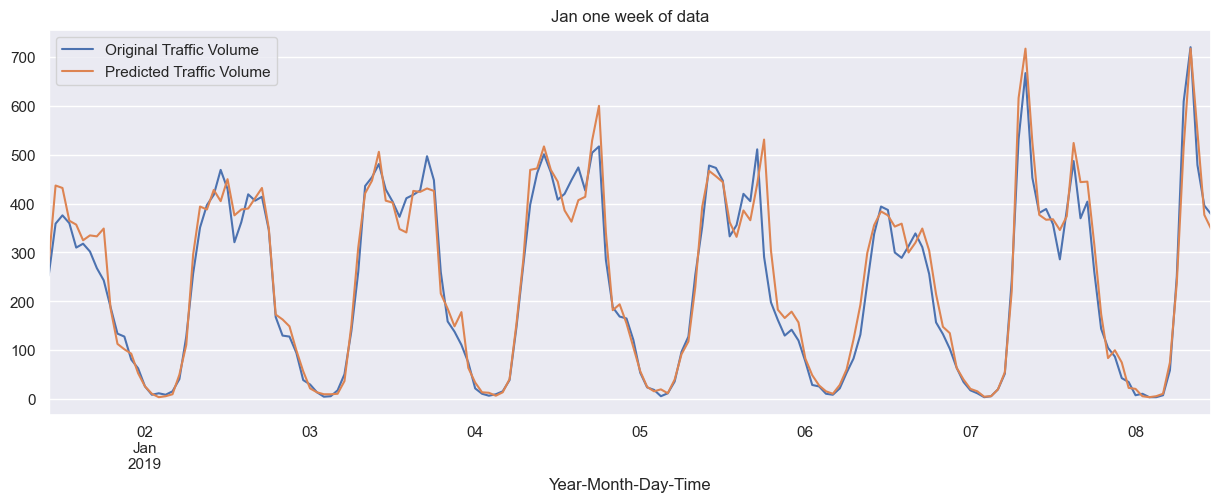

Wall time: 237 ms


In [103]:
%%time
#Weekly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan one week of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [104]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 59.71
Wall time: 2.99 ms


<font color='blue'><center><h2>Model 4: XGBoostRegressor - Part 1</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [210]:
%%time
#Importing Libraries Required
import xgboost as xgb
from sklearn.metrics import mean_squared_error
colour_palette = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.model_selection import TimeSeriesSplit

Wall time: 640 ms


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [211]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as SJY
df_xgboost = df_inp_data.copy()
df_xgboost['Date'] = pd.to_datetime(df_xgboost['Date'])
df_xgboost['Year-Month-Day-Time'] = df_xgboost['Date'].dt.strftime('%Y-%m-%d') + " " + df_xgboost['IntervalStart'].str.slice(0, 2) + ":00"
df_xgboost_1 = df_xgboost[df_xgboost['TollPointID'] == "SJY"]

Wall time: 20.6 s


In [212]:
%%time
#Creating a dataframe with hour and its total volume
df_xgboost_2 = df_xgboost_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_xgboost_3 = df_xgboost_2.to_frame()
df_xgboost_3.to_csv('boost.csv')
df_xgboost_4 = pd.read_csv("C:/Users/USER/Documents/Toll/boost.csv")

Wall time: 503 ms


In [213]:
%%time
#Display the dataframe with hour and its total volume
df_xgboost_4

Wall time: 0 ns


Year-Month-Day-Time  TotalVolume
0         2010-01-01 00:00          248
1         2010-01-01 01:00          588
2         2010-01-01 02:00          195
3         2010-01-01 03:00           76
4         2010-01-01 04:00           46
...                    ...          ...
113748    2022-12-31 19:00          184
113749    2022-12-31 20:00          106
113750    2022-12-31 21:00          172
113751    2022-12-31 22:00          175
113752    2022-12-31 23:00          109

[113753 rows x 2 columns]

In [214]:
%%time
#Convert the column: Year-Month-Day-Time into datetime data type
df_xgboost_s4['Year-Month-Day-Time'] = pd.to_datetime(df_xgboost_4['Year-Month-Day-Time'])

Wall time: 67.8 ms


In [215]:
%%time
#Display the dataframe with hour and its total volume
df_xgboost_4

Wall time: 0 ns


Year-Month-Day-Time  TotalVolume
0      2010-01-01 00:00:00          248
1      2010-01-01 01:00:00          588
2      2010-01-01 02:00:00          195
3      2010-01-01 03:00:00           76
4      2010-01-01 04:00:00           46
...                    ...          ...
113748 2022-12-31 19:00:00          184
113749 2022-12-31 20:00:00          106
113750 2022-12-31 21:00:00          172
113751 2022-12-31 22:00:00          175
113752 2022-12-31 23:00:00          109

[113753 rows x 2 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

Wall time: 2.56 s


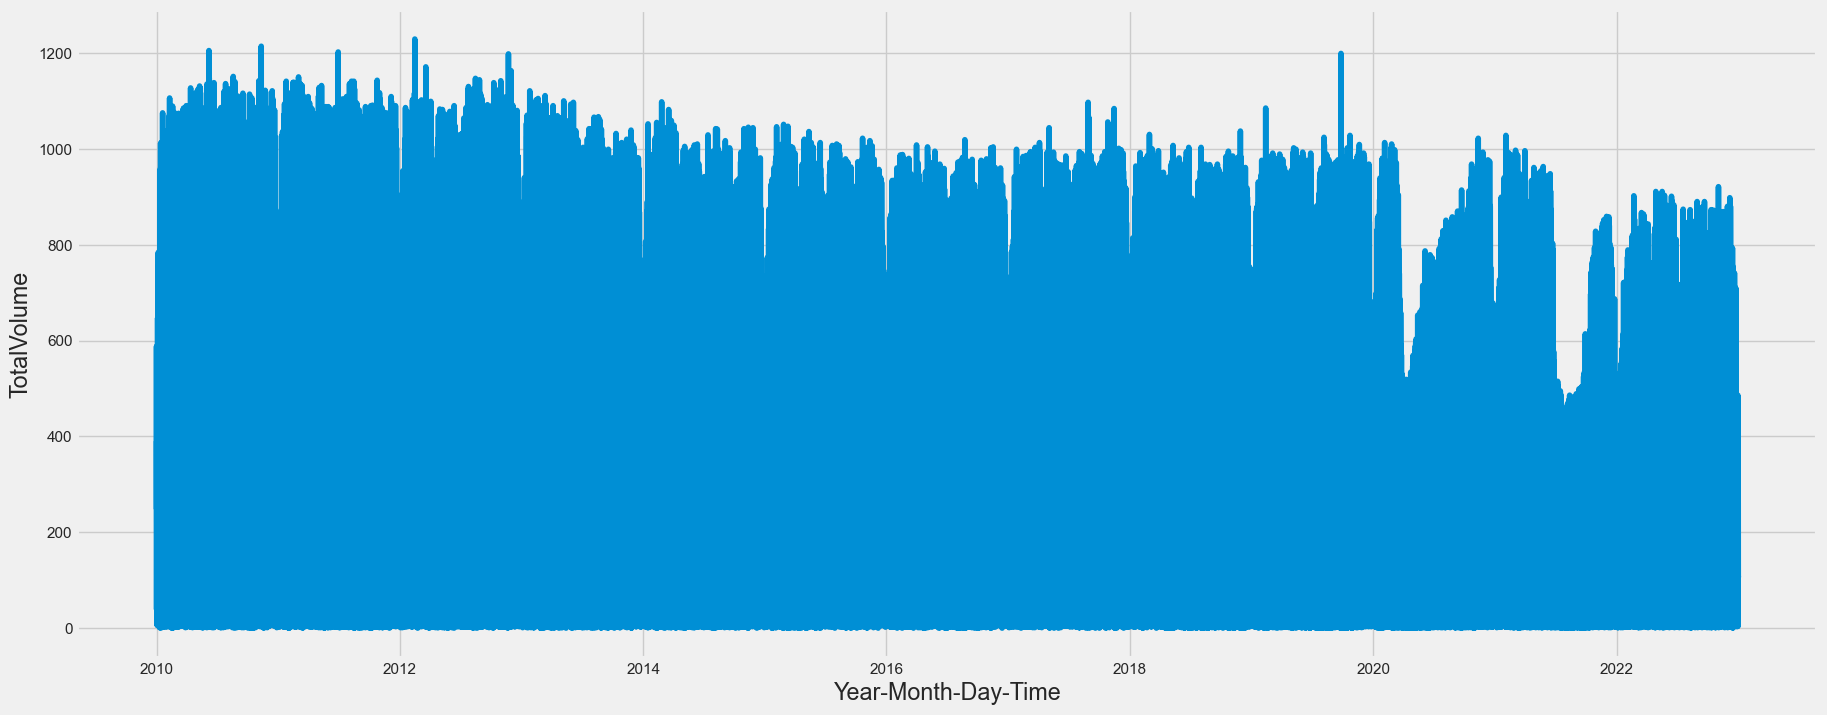

In [216]:
%%time
#Plot hourly traffic volume line graph for the given dataset
sns.lineplot(x=df_xgboost_4["Year-Month-Day-Time"], y=df_xgboost_4["TotalVolume"], data=df_xgboost_4)
sns.set(rc={'figure.figsize':(20,8)})

In [217]:
%%time
#Index the column: Year-Month-Day-Time
df_xgboost_4 = df_xgboost_4.set_index("Year-Month-Day-Time")

Wall time: 1.99 ms


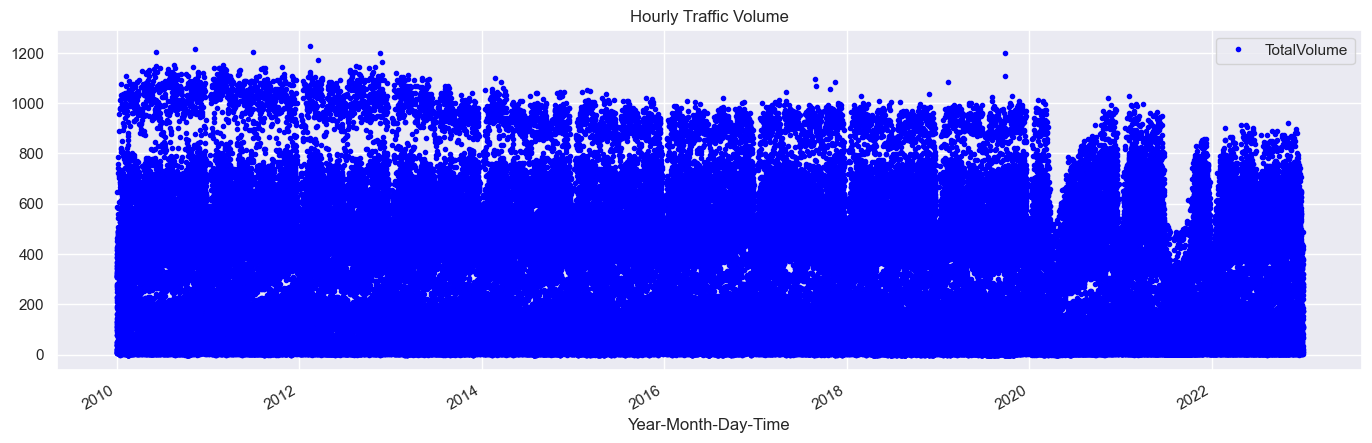

Wall time: 971 ms


In [218]:
%%time
df_xgboost_4.plot(style='.', figsize=(15,5), color='blue', title='Hourly Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Training & Testing Dataset</u></h2></center></font>

In [220]:
%%time
#Split train and test dataset for as a time series
training_df = df_xgboost_4.loc[df_xgboost_4.index < '01-01-2019']
testing_df = df_xgboost_4.loc[df_xgboost_4.index >= '01-01-2019']

Wall time: 5.02 ms


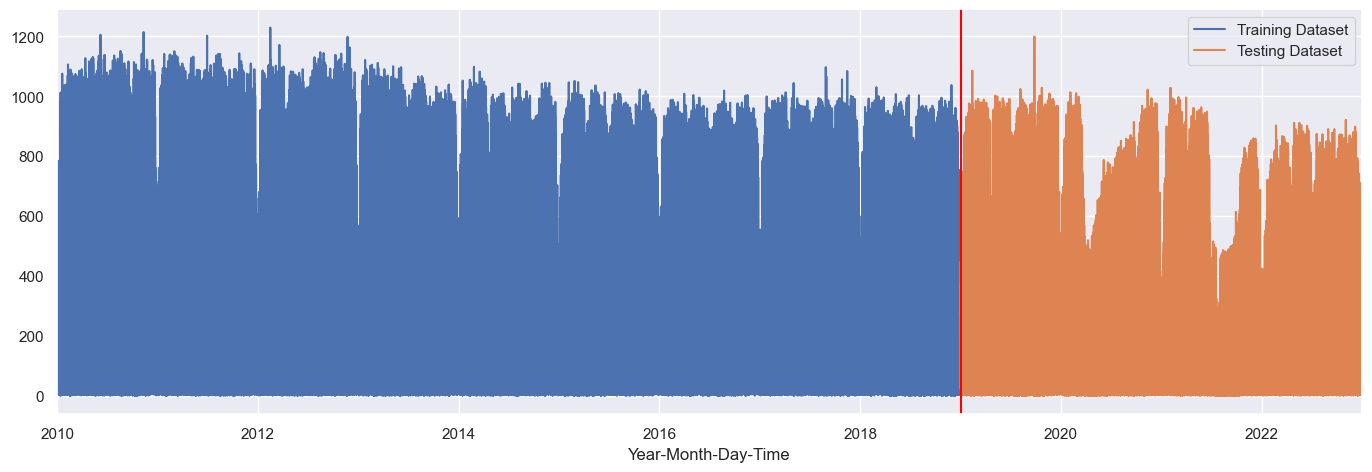

Wall time: 1.3 s


In [221]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2019', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [222]:
%%time
#Below is the feature creation created as a function
def feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [223]:
%%time
#Diplay features
df = feature_creation(df_xgboost_4)
df

Wall time: 61.9 ms


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2010-01-01 00:00:00          248     0                4        1      1  2010   
2010-01-01 01:00:00          588     1                4        1      1  2010   
2010-01-01 02:00:00          195     2                4        1      1  2010   
2010-01-01 03:00:00           76     3                4        1      1  2010   
2010-01-01 04:00:00           46     4                4        1      1  2010   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00          184    19                5        4     12  2022   
2022-12-31 20:00:00          106    20                5        4     12  2022   
2022-12-31 21:00:00          172    21                5        4     12  2022   
2022-12-31 22:00:00          175    22                5        4     12  2022   
2022-12-31 23:00:00          109    23                5        4     12  2022   

                     Day of the year  
Year-Month-Day-Time                   
2010-01-01 00:00:00                1  
2010-01-01 01:00:00                1  
2010-01-01 02:00:00                1  
2010-01-01 03:00:00                1  
2010-01-01 04:00:00                1  
...                              ...  
2022-12-31 19:00:00              365  
2022-12-31 20:00:00              365  
2022-12-31 21:00:00              365  
2022-12-31 22:00:00              365  
2022-12-31 23:00:00              365  

[113753 rows x 7 columns]

Wall time: 187 ms


Text(0.5, 1.0, 'Hourly Traffic Volume')

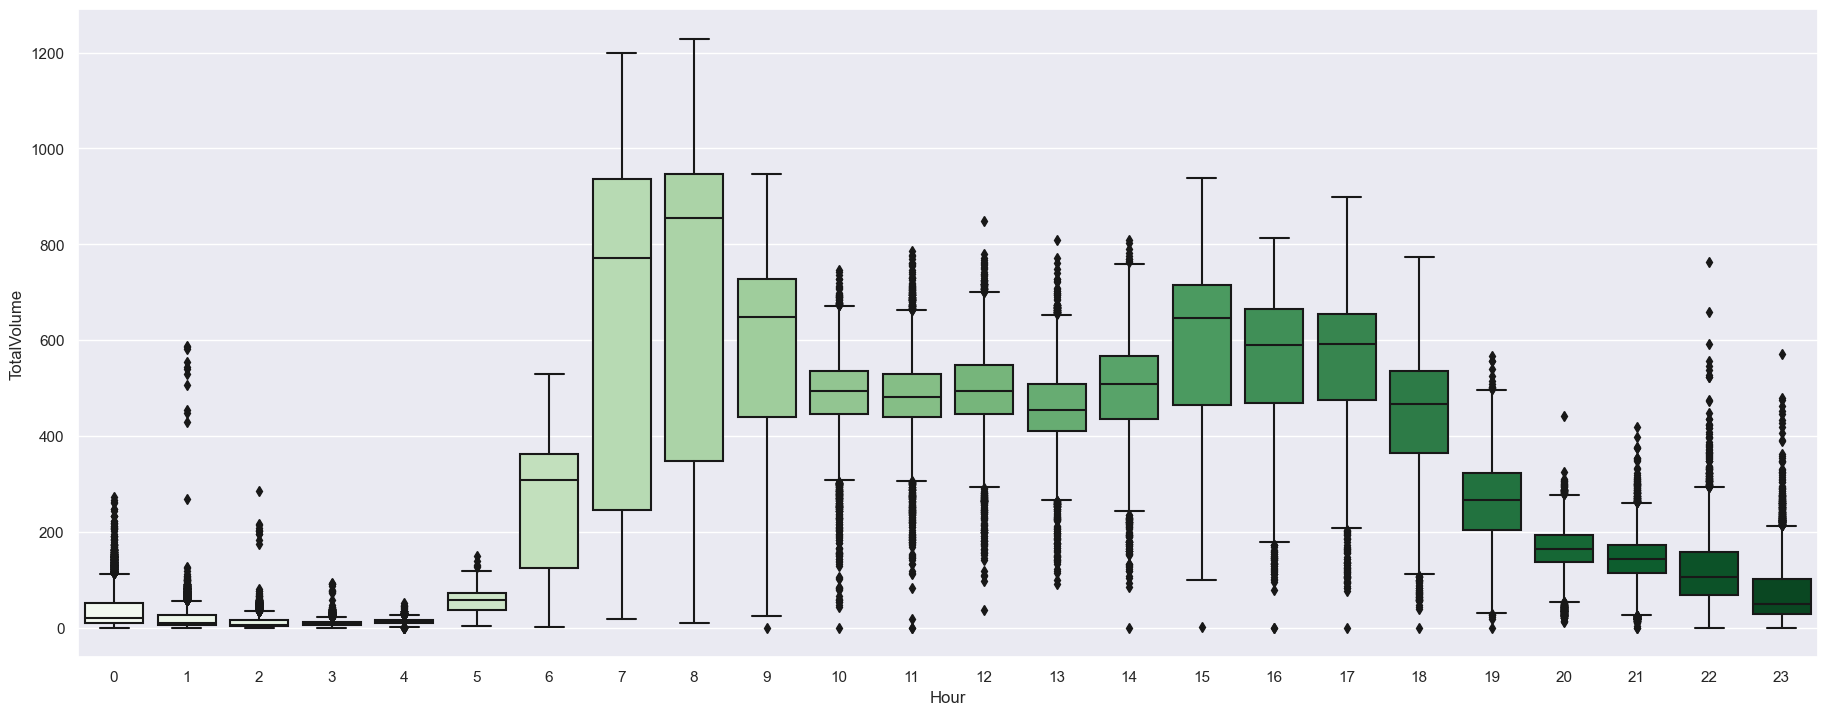

In [224]:
%%time
# Visualize hourly feature to target relationship
sns.boxplot(data=df, x='Hour', y='TotalVolume', palette='Greens')
ax.set_title('Hourly Traffic Volume')

<h2>Summary from hourly feature to target relationship:
<h3>
1. Peak hours in day-time: 7.00am - 10.00am and 3.00pm - 6.00pm<br>
2. Off-Peak hours in day-time: 10.00am - 3.00pm

Wall time: 116 ms


Text(0.5, 1.0, 'Monthly Traffic Volume')

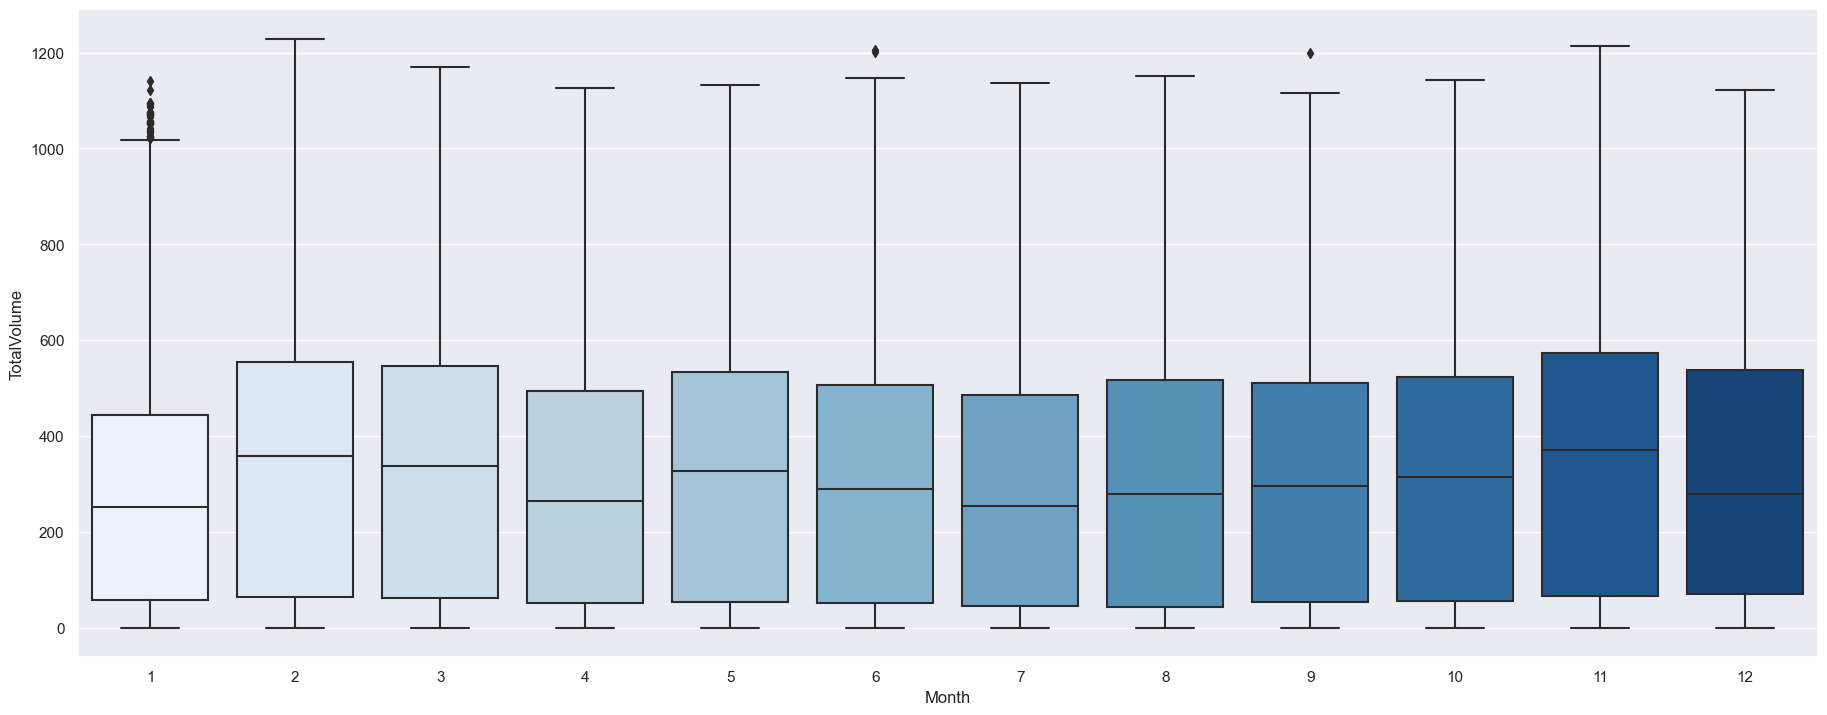

In [225]:
%%time
# Visualize monthly feature to target relationship
sns.boxplot(data=df, x='Month', y='TotalVolume', palette='Blues')
ax.set_title('Monthly Traffic Volume')

<h2>Summary from monthly feature to target relationship:
<h3>
Most of the monthly traffic lies between 50 - 600

<font color='green'><center><h2><u>Add features to dataset</u></h2></center></font>

In [226]:
%%time
#Adding features to train and test dataset
training_df = feature_creation(training_df)
testing_df = feature_creation(testing_df)
COLUMN_FEATURES = ['Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
COLUMN_TARGET = ['TotalVolume']

Wall time: 64.9 ms


<font color='green'><center><h2><u>Define feature & target columns for train & test dataset</u></h2></center></font>

In [227]:
%%time
X_train = training_df[COLUMN_FEATURES]
y_train = training_df[COLUMN_TARGET]

X_test = testing_df[COLUMN_FEATURES]
y_test = testing_df[COLUMN_TARGET]

Wall time: 9.01 ms


<font color='green'><center><h2><u>Model Creation</u></h2></center></font>

In [228]:
%%time
#Create the model
regressor = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
#regressor = xgb.XGBRegressor(n_estimators=1000)
"""
regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=2000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 """
regressor.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose=100
       )

[0]	validation_0-rmse:307.02007	validation_1-rmse:264.79929
[100]	validation_0-rmse:36.53388	validation_1-rmse:97.70405
[200]	validation_0-rmse:31.99653	validation_1-rmse:97.45143
[205]	validation_0-rmse:31.81118	validation_1-rmse:97.46184
Wall time: 3.62 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<font color='green'><center><h2><u>Visualize Feature Importance</u></h2></center></font>

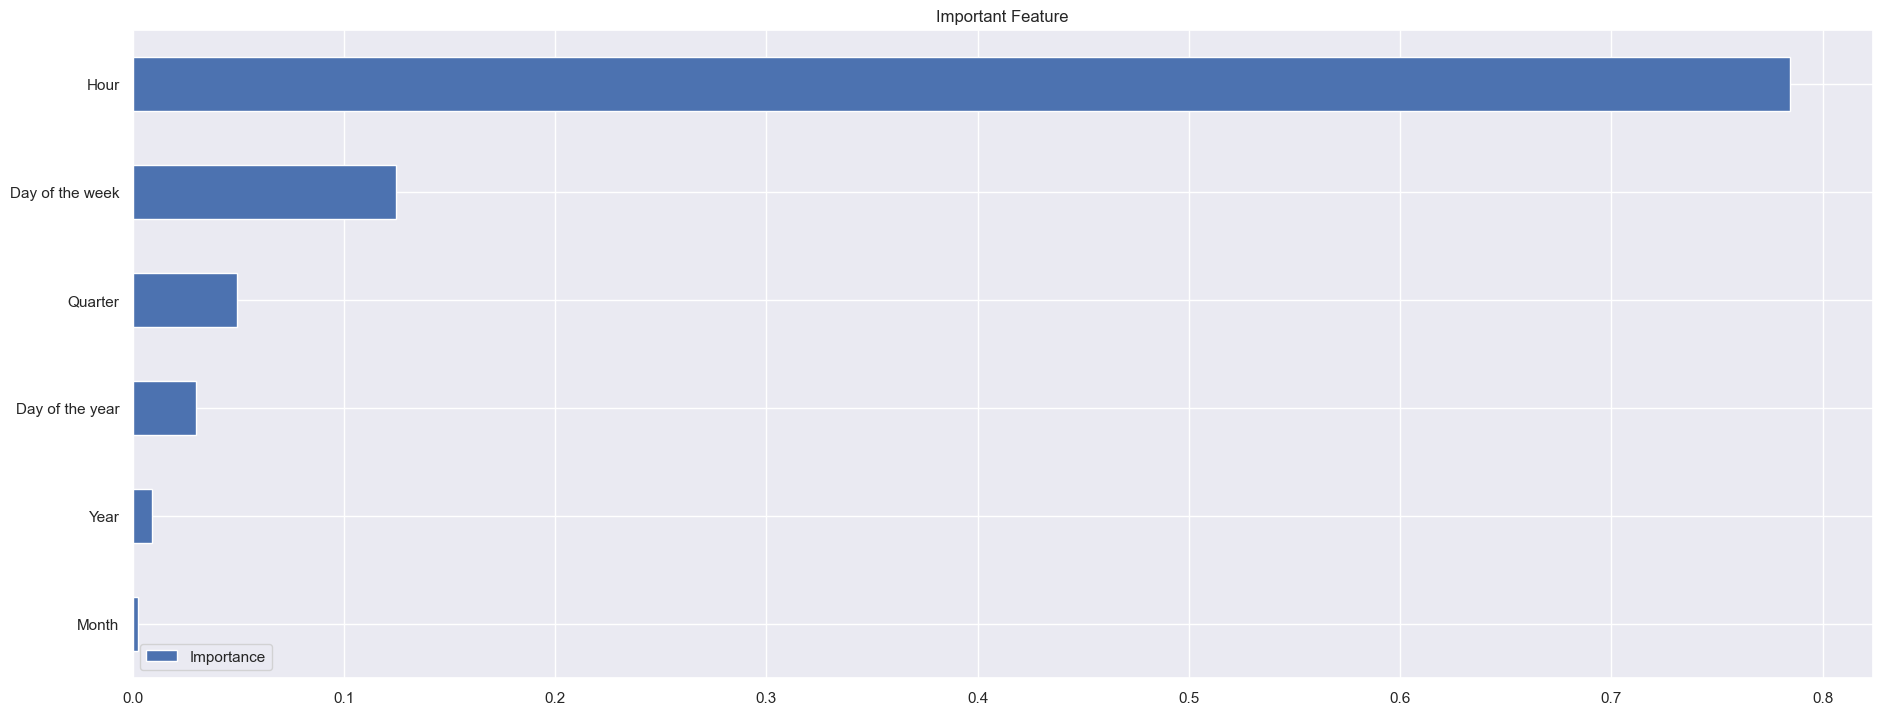

Wall time: 259 ms


In [229]:
%%time
fImportance = pd.DataFrame(data=regressor.feature_importances_,
                 index=regressor.feature_names_in_,
                 columns=['Importance'])
fImportance.sort_values('Importance').plot(kind='barh', title='Important Feature')
plt.show()

<h3>Conlusion: Hourly traffic volume has more importance than the other features

<font color='green'><center><h2><u>Predict test dataset</u></h2></center></font>

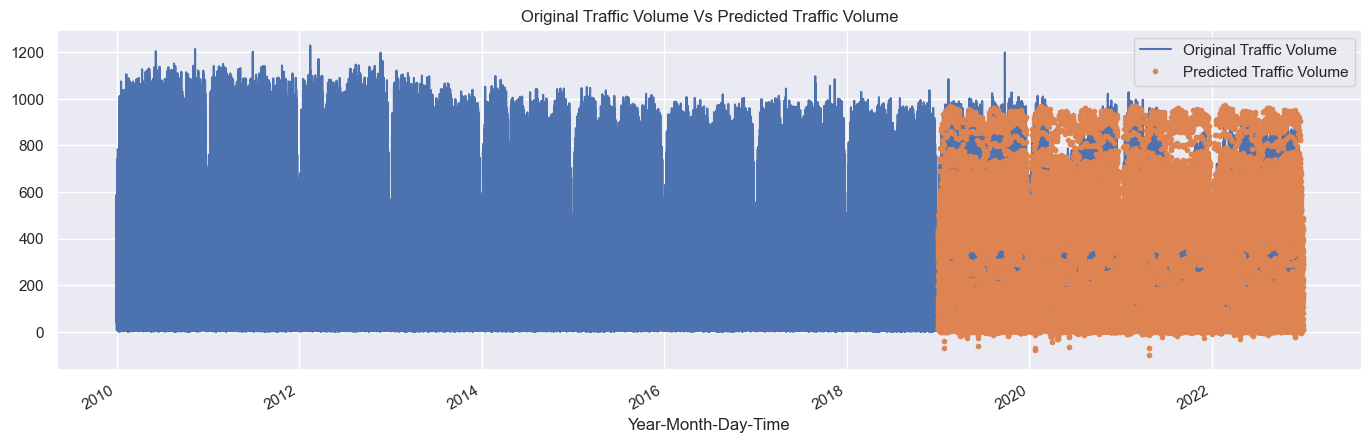

Wall time: 1.47 s


In [230]:
%%time
#Forecast / Predict on test dataset
testing_df['PredictedVolume'] = regressor.predict(X_test)
df = df.merge(testing_df['PredictedVolume'], how='left', left_index = True, right_index = True)
ax = df['TotalVolume'].plot(figsize=(15,5))
df['PredictedVolume'].plot(ax=ax, style='.')
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
ax.set_title('Original Traffic Volume Vs Predicted Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Plot Predicted Next Hour Traffic Volume of test dataset</u></h2></center></font>

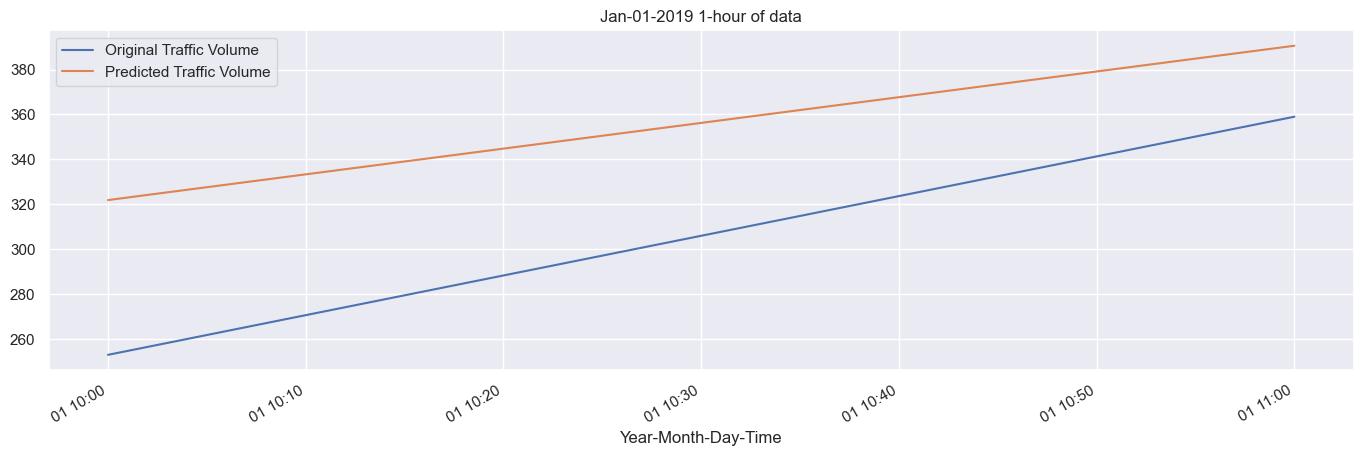

Wall time: 264 ms


In [231]:
%%time
#Hourly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan-01-2019 1-hour of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Plot Predicted Next one week Traffic Volume of test dataset for understanding</u></h2></center></font>

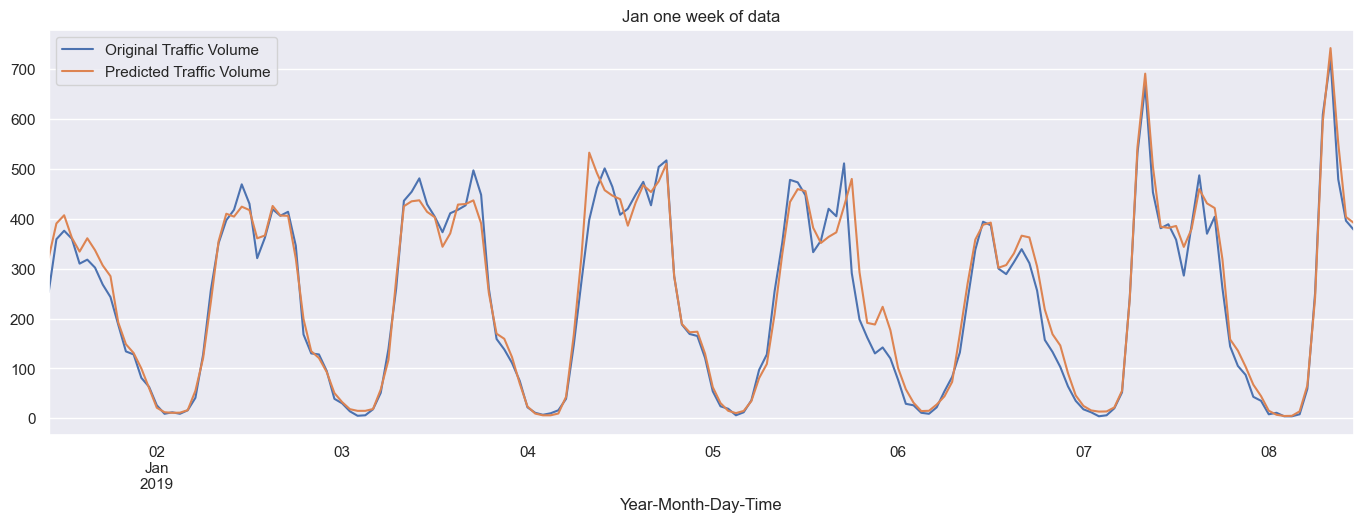

Wall time: 255 ms


In [232]:
%%time
#Weekly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan one week of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [233]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 54.8
Wall time: 9.97 ms


<font color='blue'><center><h2>Model 4: XGBoostRegressor - Part 2</h2></center></font>

<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [268]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as SJY
df_xgboost_p2 = df_inp_data.copy()
df_xgboost_p2['Date'] = pd.to_datetime(df_xgboost_p2['Date'])
df_xgboost_p2['Year-Month-Day-Time'] = df_xgboost_p2['Date'].dt.strftime('%Y-%m-%d') + " " + df_xgboost_p2['IntervalStart'].str.slice(0, 2) + ":00"
df_xgboost_p2_2 = df_xgboost_p2[df_xgboost_p2['TollPointID'] == "SJY"]

Wall time: 20 s


In [269]:
%%time
#Creating a dataframe with hour and its total volume
df_xgboost_p2_3 = df_xgboost_p2_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_xgboost_p2_4 = df_xgboost_p2_3.to_frame()
df_xgboost_p2_4.to_csv('boost_2.csv')
df_xgboost_p2_5 = pd.read_csv("C:/Users/USER/Documents/Toll/boost_2.csv")
df_xgboost_p2_5['Year-Month-Day-Time'] = pd.to_datetime(df_xgboost_p2_5['Year-Month-Day-Time'])
df_xgboost_p2_5 = df_xgboost_p2_5.set_index("Year-Month-Day-Time")

Wall time: 496 ms


<font color='green'><center><h2><u>Display Histogram</u></h2></center></font>

Wall time: 141 ms


<AxesSubplot:ylabel='Frequency'>

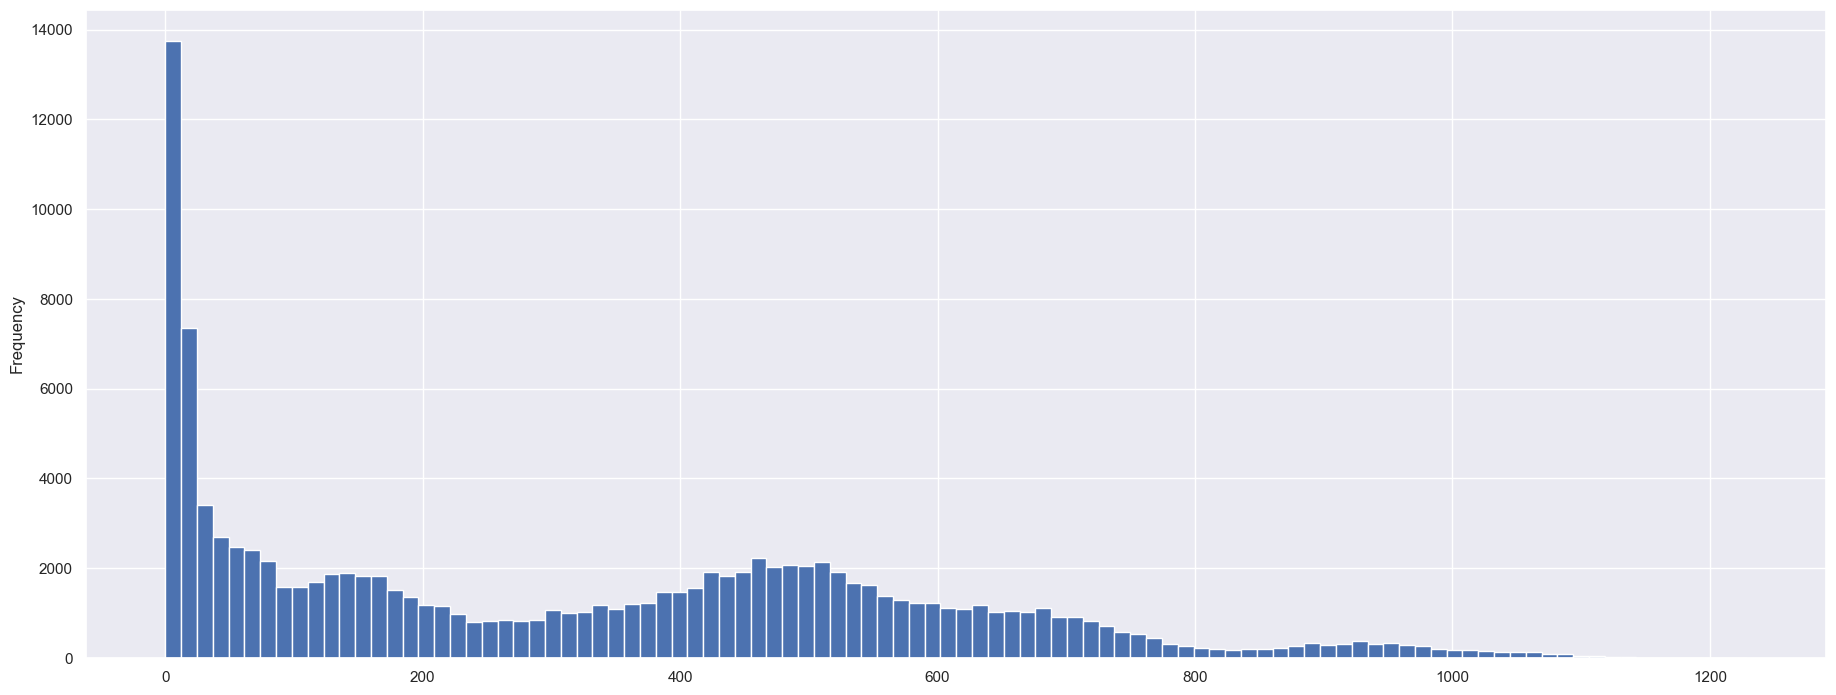

In [270]:
%%time
#Display Histogram of the Dataset
df_xgboost_p2_5['TotalVolume'].plot(kind='hist', bins=100)

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [271]:
%%time
#Below is the feature creation created as a function
def feature_creating(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    df['Day of the month'] = df.index.day
    df['Week of the year'] = df.index.isocalendar().week
    return df

Wall time: 0 ns


<font color='green'><center><h2><u>Create required lag features</u></h2></center></font>

In [272]:
%%time
#Creating Lag features like for same day last year etc.
def include_lags(df):    
    target_dict_map = df['TotalVolume'].to_dict()
    df['lag 1 year'] = (df.index - pd.Timedelta('364 days')).map(target_dict_map)
    df['lag 2 year'] = (df.index - pd.Timedelta('728 days')).map(target_dict_map)
    df['lag 3 year'] = (df.index - pd.Timedelta('1092 days')).map(target_dict_map)
    return(df)

Wall time: 0 ns


<font color='green'><center><h2><u>Training using cross validation: five fold cross validation.<br><br>Visualize 5-fold cross validation train & test dataset.</u></h2></center></font>

[0]	validation_0-rmse:307.84255	validation_1-rmse:297.99057
[100]	validation_0-rmse:34.42971	validation_1-rmse:40.33706
[200]	validation_0-rmse:30.10703	validation_1-rmse:39.96645
[243]	validation_0-rmse:28.66383	validation_1-rmse:40.06578
[0]	validation_0-rmse:306.93953	validation_1-rmse:294.12782
[100]	validation_0-rmse:34.54982	validation_1-rmse:45.56764
[200]	validation_0-rmse:30.04316	validation_1-rmse:45.21570
[240]	validation_0-rmse:28.86993	validation_1-rmse:45.21763
[0]	validation_0-rmse:305.89975	validation_1-rmse:254.98836
[55]	validation_0-rmse:38.75265	validation_1-rmse:98.86352
[0]	validation_0-rmse:302.90310	validation_1-rmse:256.64015
[56]	validation_0-rmse:38.81803	validation_1-rmse:142.33522
[0]	validation_0-rmse:300.00029	validation_1-rmse:284.38201
[67]	validation_0-rmse:39.46528	validation_1-rmse:120.78851
Wall time: 20.3 s


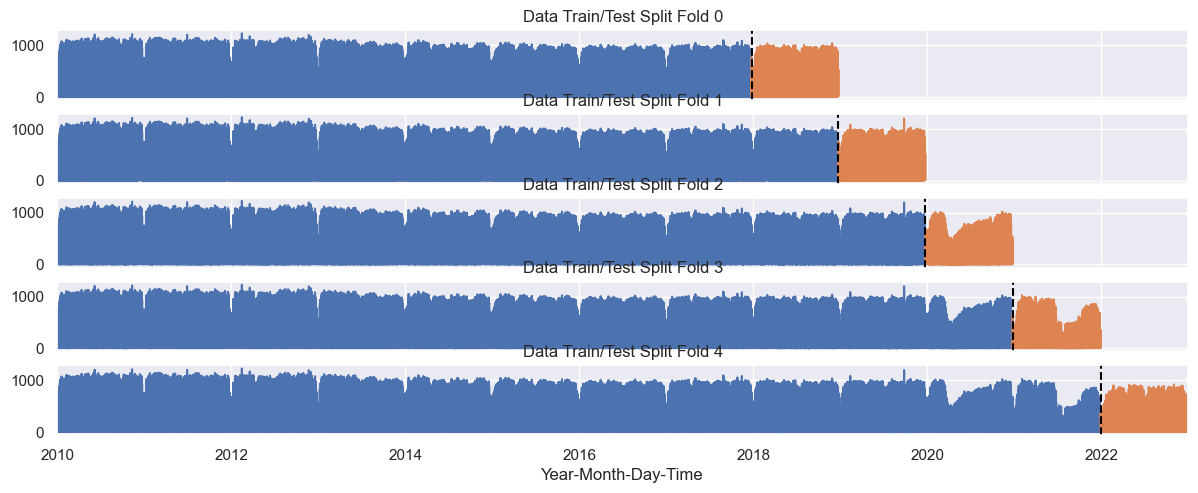

In [273]:
%%time
#Training using Cross Validation
TSsplit = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df_xgboost_p2_5.sort_index()
df = include_lags(df)

folding = 0
predicted_val = []
scores_val = []
mean_abs_err = []
fig, axs = plt.subplots(5, 1, figsize=(13, 5), sharex=True)
for training_idx, validation_idx in TSsplit.split(df):
    training = df.iloc[training_idx]
    testing = df.iloc[validation_idx]
    
    #Visualize 5-fold cross validation train & test dataset
    training['TotalVolume'].plot(ax=axs[folding], label='Training Set', title=f'Data Train/Test Split Fold {folding}')
    testing['TotalVolume'].plot(ax=axs[folding], label='Testing Set')
    axs[folding].axvline(testing.index.min(), color='black', ls='--')

    training = feature_creating(training)
    testing = feature_creating(testing)

    FEATURES = ['Day of the year', 'Hour', 'Day of the week', 'Quarter', 'Month','Year', 'Day of the month',
                'lag 1 year','lag 2 year','lag 3 year']
    TARGET = 'TotalVolume'

    X_train = training[FEATURES]
    y_train = training[TARGET]

    X_test = testing[FEATURES]
    y_test = testing[TARGET]
    
    regressor = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)

    """
    regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=1000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 """
    regressor.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_predicted = regressor.predict(X_test)
    predicted_val.append(y_predicted)
    score_val = np.sqrt(mean_squared_error(y_test, y_predicted))
    scores_val.append( round(score_val,2) )
    ErrVal = np.abs(y_test - y_predicted)
    mean_abs_err.append( round(ErrVal.mean(),2) )
    
    folding = folding + 1

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [274]:
%%time
print(f'Mean absolute error across folds for testing dataset: {np.mean(mean_abs_err):0.2f}')
print(f'Each fold mean absolute error for testing dataset: {mean_abs_err}')

Mean absolute error across folds for testing dataset: 53.16
Each fold mean absolute error for testing dataset: [25.89, 26.25, 54.32, 87.85, 71.51]
Wall time: 0 ns


<font color='green'><center><h2><u>Visualize Input Data Monthly Traffic Volume</u></h2></center></font>

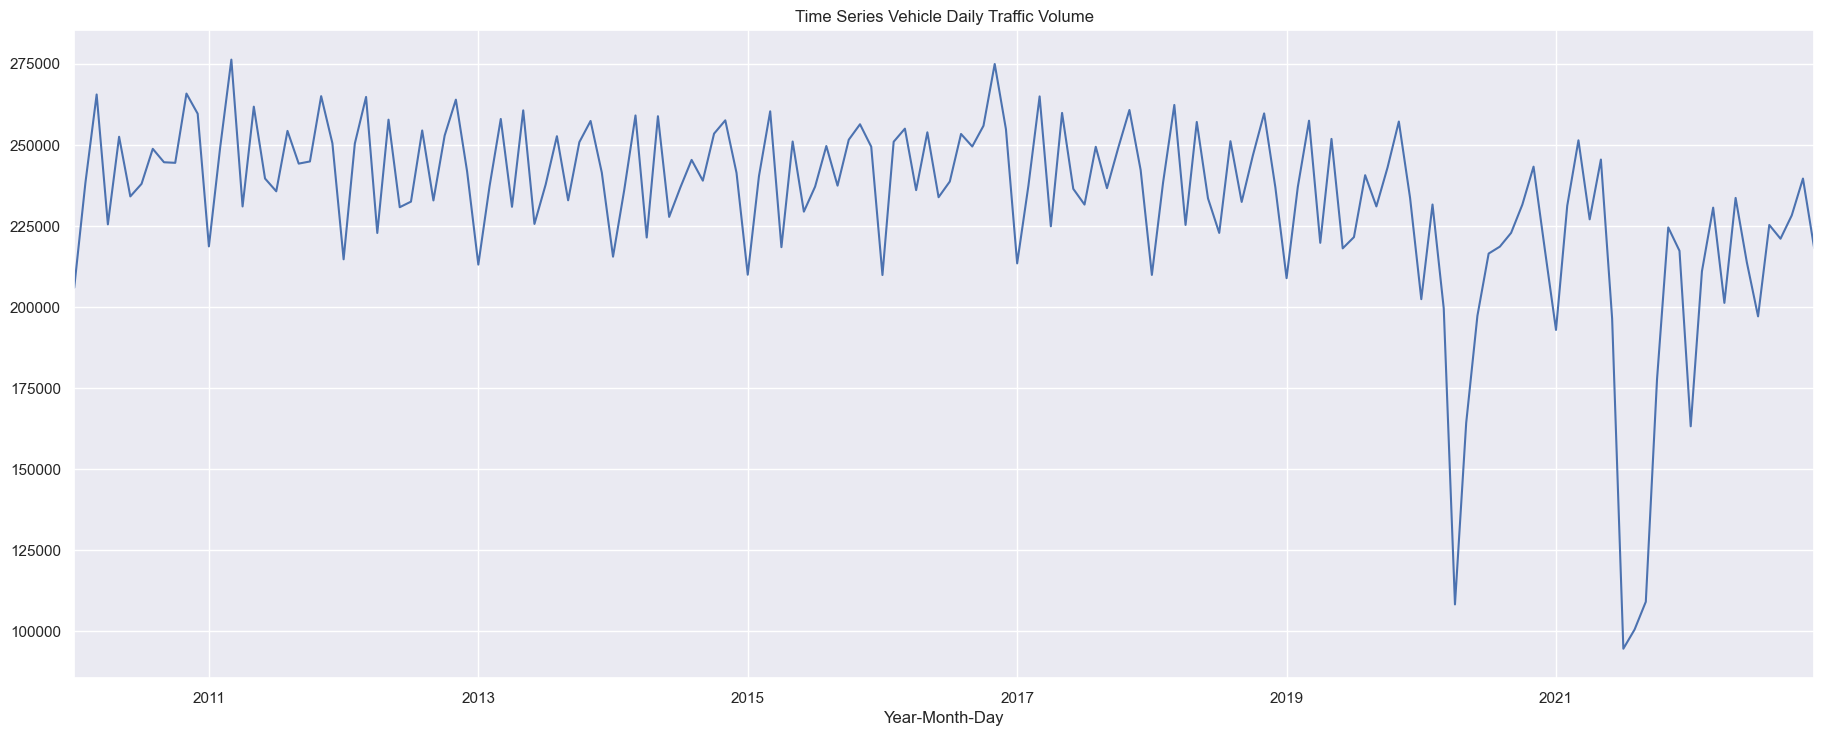

Wall time: 2.72 s


In [277]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as SJY
df_monthly_vol = df_inp_data.copy()
df_monthly_vol['Year-Month-Day'] = df_monthly_vol['Date'].str.slice(0, 7) + "-01"
df_monthly_vol_1 = df_monthly_vol[df_monthly_vol['TollPointID'] == "SJY"]

#Creating a dataframe with month and its total volume
df_monthly_vol_2 = df_monthly_vol_1.groupby(['Year-Month-Day'])['TotalVolume'].sum()
df_monthly_vol_3 = df_monthly_vol_2.to_frame()
df_monthly_vol_3.to_csv('monthly.csv')
df_monthly_vol_4 = pd.read_csv("C:/Users/USER/Documents/Toll/monthly.csv")

df_monthly_vol_4['Year-Month-Day'] = pd.to_datetime(df_monthly_vol_4['Year-Month-Day'])
df_monthly_vol_4 = df_monthly_vol_4.set_index("Year-Month-Day")

#Plot Monthly Traffic Volume
df_monthly_vol_4.TotalVolume.plot(figsize=(20,8), title="Time Series Vehicle Daily Traffic Volume")
plt.show()

<h2>Summary:
<h3>The mean absolute error is high in the years 2020, 2021, and 2022 due to a sharp fall in traffic volume due to COVID-19.

<font color='green'><center><h2><u>Future Traffic Volume Prediction</u></h2></center></font>

In [245]:
%%time
#Train all of the data before doing future prediction
df = feature_creating(df)

FEATURES = ['Day of the year', 'Hour', 'Day of the week', 'Quarter', 'Month','Year', 'Day of the month', 'lag 1 year','lag 2 year','lag 3 year']
TARGET = 'TotalVolume'

X_all = df[FEATURES]
y_all = df[TARGET]

regressor = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)

"""
regressor = xgb.XGBRegressor(base_score=0.5,
                             booster='gbtree', 
                             n_estimators=1000,
                             early_stopping_rounds=50,
                             objective='reg:linear',
                             max_depth=3,
                             learning_rate=0.01)
                             """
regressor.fit(X_all, y_all,
              eval_set=[(X_all, y_all)],
              verbose=100)

[0]	validation_0-rmse:298.21067
[100]	validation_0-rmse:36.56488
[200]	validation_0-rmse:31.85366
[300]	validation_0-rmse:29.23341
[400]	validation_0-rmse:27.11501
[500]	validation_0-rmse:25.55120
[600]	validation_0-rmse:24.19410
[700]	validation_0-rmse:22.95423
[800]	validation_0-rmse:21.92592
[900]	validation_0-rmse:20.82251
[999]	validation_0-rmse:19.87039
Wall time: 35.9 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [246]:
%%time
#Find recent / latest data and time of the given dataset
df.index.max()

Wall time: 0 ns


Timestamp('2022-12-31 23:00:00')

In [248]:
%%time
#Create future dataframe
future = pd.date_range('2023-01-01', '2023-01-08', freq='1h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
Past_and_future_df = pd.concat([df, future_df])

Wall time: 11 ms


In [249]:
%%time
Past_and_future_df

Wall time: 0 ns


TotalVolume  lag 1 year  lag 2 year  lag 3 year  Hour  \
2010-01-01 00:00:00        248.0         NaN         NaN         NaN   0.0   
2010-01-01 01:00:00        588.0         NaN         NaN         NaN   1.0   
2010-01-01 02:00:00        195.0         NaN         NaN         NaN   2.0   
2010-01-01 03:00:00         76.0         NaN         NaN         NaN   3.0   
2010-01-01 04:00:00         46.0         NaN         NaN         NaN   4.0   
...                          ...         ...         ...         ...   ...   
2023-01-07 20:00:00          NaN         NaN         NaN         NaN   NaN   
2023-01-07 21:00:00          NaN         NaN         NaN         NaN   NaN   
2023-01-07 22:00:00          NaN         NaN         NaN         NaN   NaN   
2023-01-07 23:00:00          NaN         NaN         NaN         NaN   NaN   
2023-01-08 00:00:00          NaN         NaN         NaN         NaN   NaN   

                     Day of the week  Quarter  Month    Year  Day of the year  \
2010-01-01 00:00:00              4.0      1.0    1.0  2010.0              1.0   
2010-01-01 01:00:00              4.0      1.0    1.0  2010.0              1.0   
2010-01-01 02:00:00              4.0      1.0    1.0  2010.0              1.0   
2010-01-01 03:00:00              4.0      1.0    1.0  2010.0              1.0   
2010-01-01 04:00:00              4.0      1.0    1.0  2010.0              1.0   
...                              ...      ...    ...     ...              ...   
2023-01-07 20:00:00              NaN      NaN    NaN     NaN              NaN   
2023-01-07 21:00:00              NaN      NaN    NaN     NaN              NaN   
2023-01-07 22:00:00              NaN      NaN    NaN     NaN              NaN   
2023-01-07 23:00:00              NaN      NaN    NaN     NaN              NaN   
2023-01-08 00:00:00              NaN      NaN    NaN     NaN              NaN   

                     Day of the month  Week of the year  isFuture  
2010-01-01 00:00:00               1.0                53     False  
2010-01-01 01:00:00               1.0                53     False  
2010-01-01 02:00:00               1.0                53     False  
2010-01-01 03:00:00               1.0                53     False  
2010-01-01 04:00:00               1.0                53     False  
...                               ...               ...       ...  
2023-01-07 20:00:00               NaN              <NA>      True  
2023-01-07 21:00:00               NaN              <NA>      True  
2023-01-07 22:00:00               NaN              <NA>      True  
2023-01-07 23:00:00               NaN              <NA>      True  
2023-01-08 00:00:00               NaN              <NA>      True  

[113922 rows x 13 columns]

In [250]:
%%time
#Pass past+future dataset to add features and lags
Past_and_future_df = feature_creating(Past_and_future_df)
Past_and_future_df = include_lags(Past_and_future_df)
Past_and_future_df

Wall time: 1.67 s


TotalVolume  lag 1 year  lag 2 year  lag 3 year  Hour  \
2010-01-01 00:00:00        248.0         NaN         NaN         NaN     0   
2010-01-01 01:00:00        588.0         NaN         NaN         NaN     1   
2010-01-01 02:00:00        195.0         NaN         NaN         NaN     2   
2010-01-01 03:00:00         76.0         NaN         NaN         NaN     3   
2010-01-01 04:00:00         46.0         NaN         NaN         NaN     4   
...                          ...         ...         ...         ...   ...   
2023-01-07 20:00:00          NaN       126.0       157.0       144.0    20   
2023-01-07 21:00:00          NaN       114.0       161.0       156.0    21   
2023-01-07 22:00:00          NaN        92.0       140.0       163.0    22   
2023-01-07 23:00:00          NaN        59.0       106.0       138.0    23   
2023-01-08 00:00:00          NaN        45.0        65.0        78.0     0   

                     Day of the week  Quarter  Month  Year  Day of the year  \
2010-01-01 00:00:00                4        1      1  2010                1   
2010-01-01 01:00:00                4        1      1  2010                1   
2010-01-01 02:00:00                4        1      1  2010                1   
2010-01-01 03:00:00                4        1      1  2010                1   
2010-01-01 04:00:00                4        1      1  2010                1   
...                              ...      ...    ...   ...              ...   
2023-01-07 20:00:00                5        1      1  2023                7   
2023-01-07 21:00:00                5        1      1  2023                7   
2023-01-07 22:00:00                5        1      1  2023                7   
2023-01-07 23:00:00                5        1      1  2023                7   
2023-01-08 00:00:00                6        1      1  2023                8   

                     Day of the month  Week of the year  isFuture  
2010-01-01 00:00:00                 1                53     False  
2010-01-01 01:00:00                 1                53     False  
2010-01-01 02:00:00                 1                53     False  
2010-01-01 03:00:00                 1                53     False  
2010-01-01 04:00:00                 1                53     False  
...                               ...               ...       ...  
2023-01-07 20:00:00                 7                 1      True  
2023-01-07 21:00:00                 7                 1      True  
2023-01-07 22:00:00                 7                 1      True  
2023-01-07 23:00:00                 7                 1      True  
2023-01-08 00:00:00                 8                 1      True  

[113922 rows x 13 columns]

In [251]:
%%time
#Split and dislay only future dataset
future_with_features = Past_and_future_df.query('isFuture').copy()
future_with_features.tail()

Wall time: 13 ms


TotalVolume  lag 1 year  lag 2 year  lag 3 year  Hour  \
2023-01-07 20:00:00          NaN       126.0       157.0       144.0    20   
2023-01-07 21:00:00          NaN       114.0       161.0       156.0    21   
2023-01-07 22:00:00          NaN        92.0       140.0       163.0    22   
2023-01-07 23:00:00          NaN        59.0       106.0       138.0    23   
2023-01-08 00:00:00          NaN        45.0        65.0        78.0     0   

                     Day of the week  Quarter  Month  Year  Day of the year  \
2023-01-07 20:00:00                5        1      1  2023                7   
2023-01-07 21:00:00                5        1      1  2023                7   
2023-01-07 22:00:00                5        1      1  2023                7   
2023-01-07 23:00:00                5        1      1  2023                7   
2023-01-08 00:00:00                6        1      1  2023                8   

                     Day of the month  Week of the year  isFuture  
2023-01-07 20:00:00                 7                 1      True  
2023-01-07 21:00:00                 7                 1      True  
2023-01-07 22:00:00                 7                 1      True  
2023-01-07 23:00:00                 7                 1      True  
2023-01-08 00:00:00                 8                 1      True

In [252]:
%%time
#Predict the future
future_with_features['PredictedVolume'] = regressor.predict(future_with_features[FEATURES])

Wall time: 6.98 ms


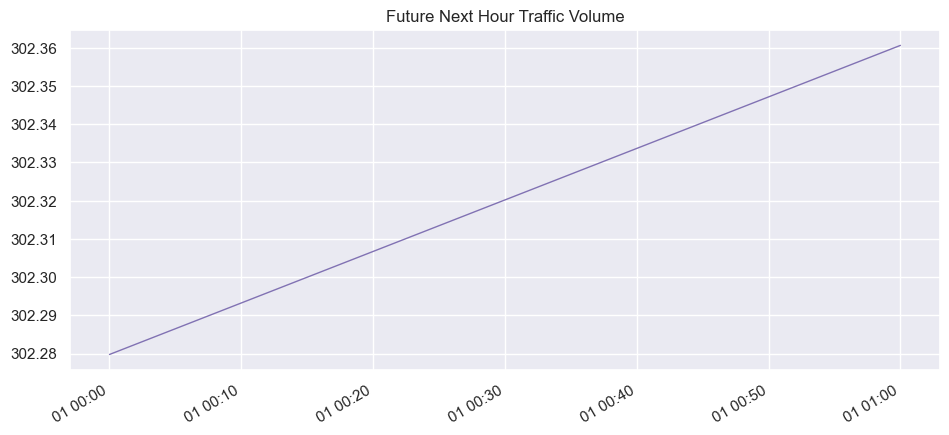

Wall time: 236 ms


In [256]:
%%time
#Plot the future: Next Hour
future_with_features['PredictedVolume'].iloc[0:2].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next Hour Traffic Volume')
plt.show()

Next Hour Traffic Volume:
Wall time: 62.9 ms


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='TotalVolume'>

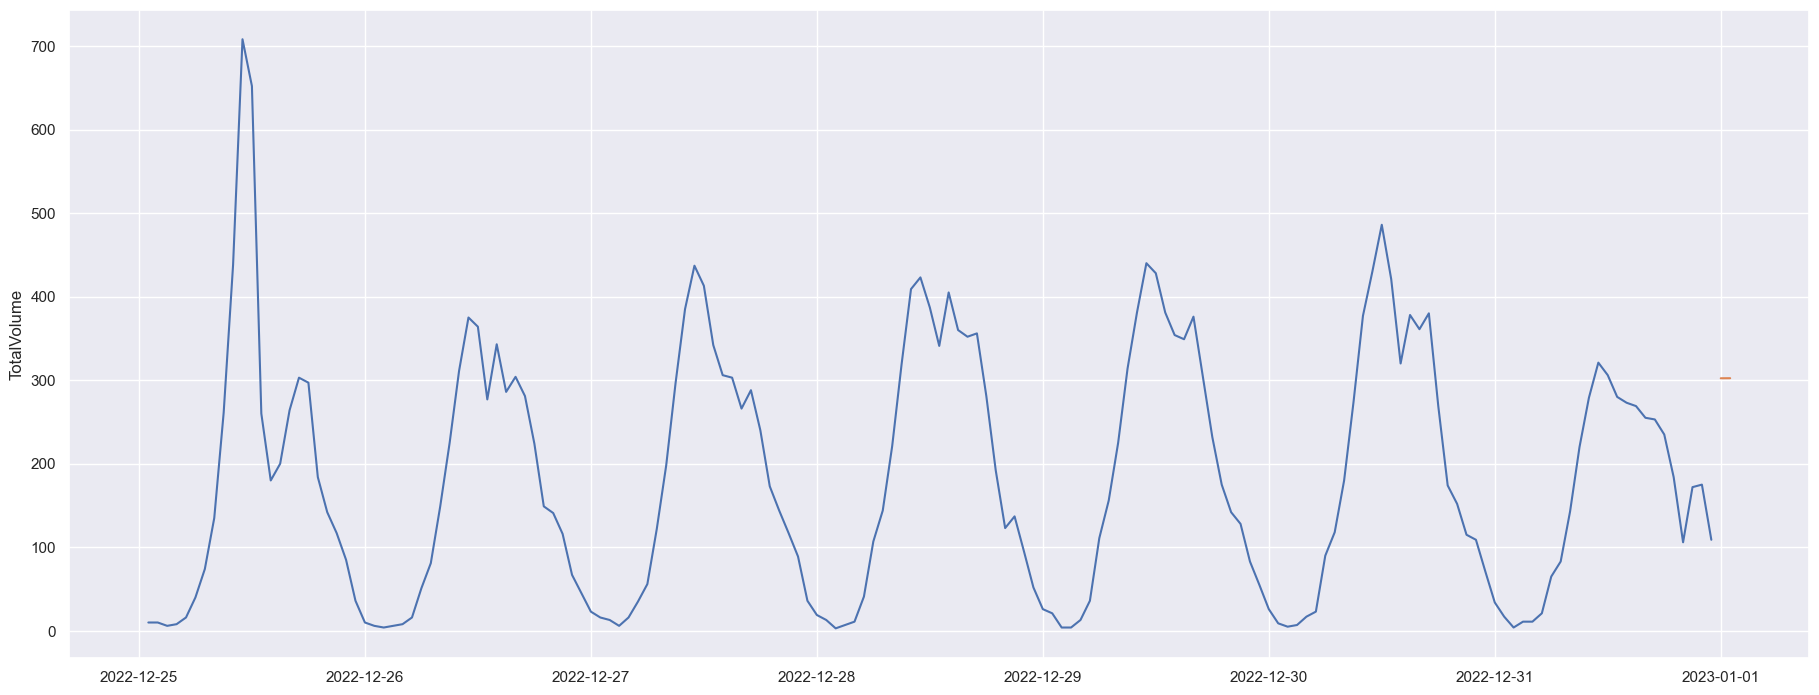

In [257]:
%%time
print("Next Hour Traffic Volume:")
plot1 = Past_and_future_df.loc[Past_and_future_df.index > '12-25-2022']
plot2 = future_with_features['PredictedVolume'].iloc[0:2]
sns.lineplot(plot1.index, plot1['TotalVolume'])
sns.lineplot(plot2.index, plot2)

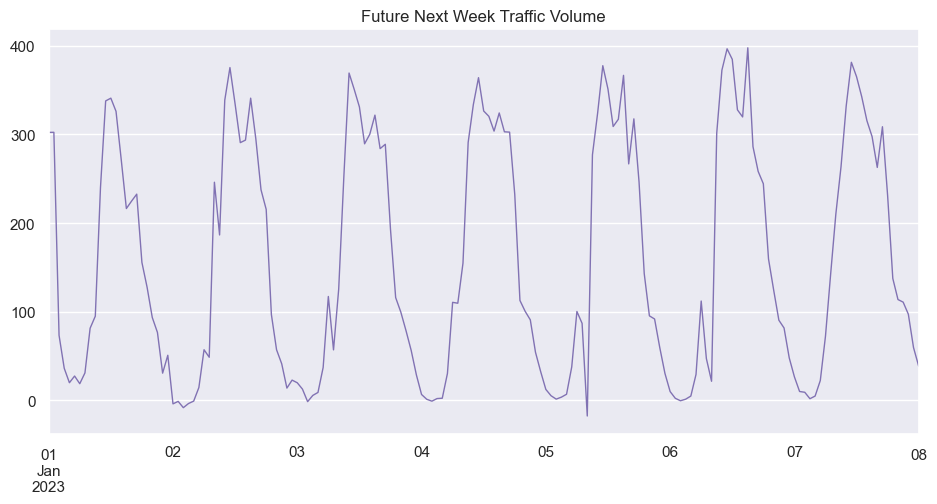

Wall time: 177 ms


In [258]:
%%time
#Plot the future: Next Week
future_with_features['PredictedVolume'].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next Week Traffic Volume')
plt.show()

Next Week Traffic Volume:
Wall time: 69.8 ms


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='TotalVolume'>

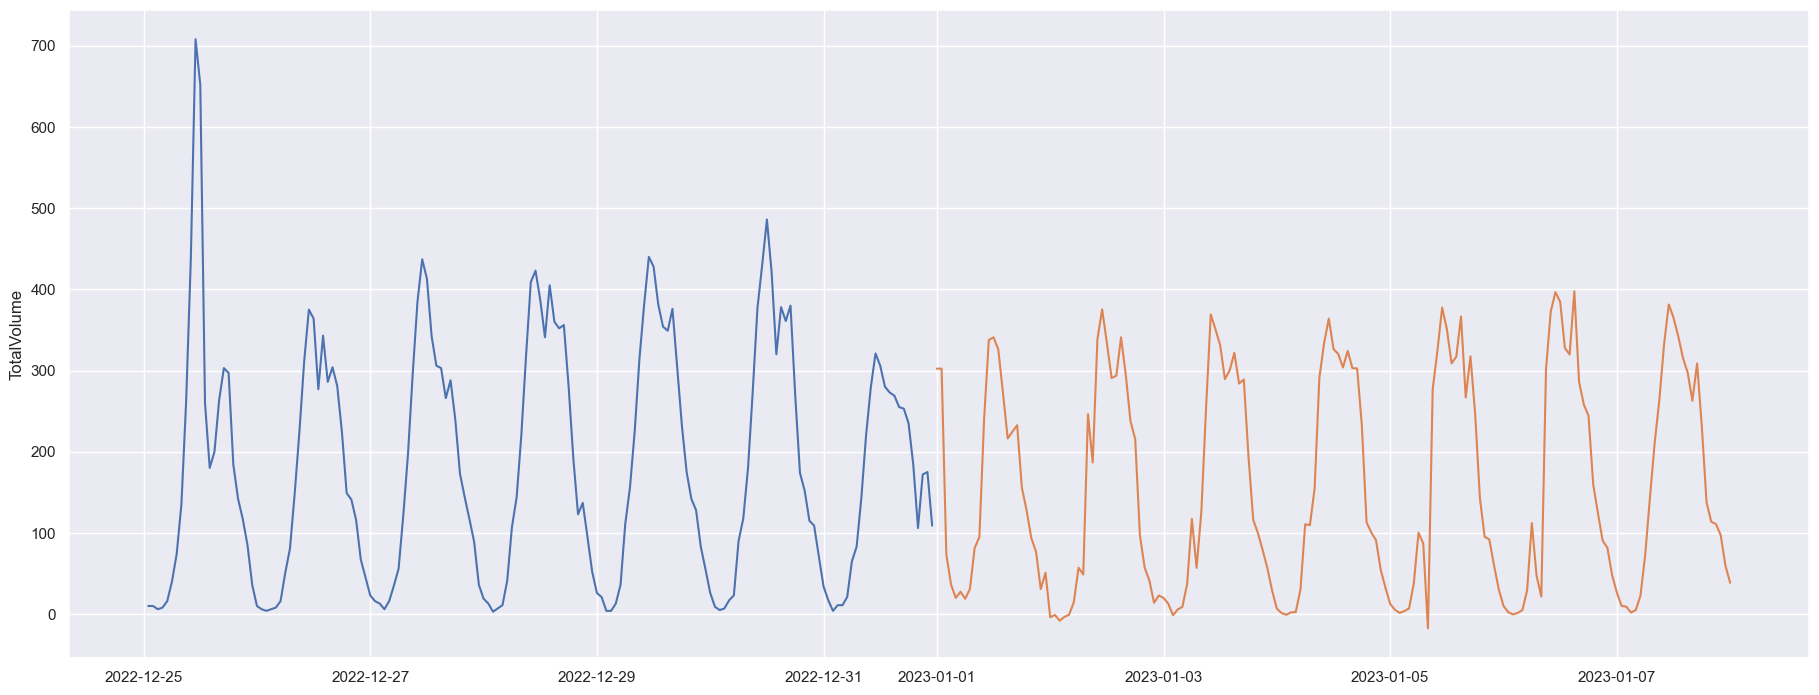

In [261]:
%%time
print("Next Week Traffic Volume:")
plot1 = Past_and_future_df.loc[Past_and_future_df.index > '12-25-2022']
plot2 = future_with_features['PredictedVolume']
sns.lineplot(plot1.index, plot1['TotalVolume'])
sns.lineplot(plot2.index, plot2)

<font color='blue'><center><h2>Model 5: RandomForestRegressor</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [105]:
%%time
#Import Libraries
from sklearn.ensemble import RandomForestRegressor

Wall time: 122 ms


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [106]:
%%time
#Input traffic data set
#Filter and store the dataset having TollPointID as SJY
df_RMregressor = df_inp_data.copy()
df_RMregressor['Date'] = pd.to_datetime(df_RMregressor['Date'])
df_RMregressor['Year-Month-Day-Time'] = df_RMregressor['Date'].dt.strftime('%Y-%m-%d') + " " + df_RMregressor['IntervalStart'].str.slice(0, 2) + ":00"
df_RMregressor_1 = df_RMregressor[df_RMregressor['TollPointID'] == "SJY"]

Wall time: 40.2 s


In [107]:
%%time
#Creating a dataframe with hour and its total volume
df_RMregressor_2 = df_RMregressor_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_RMregressor_3 = df_RMregressor_2.to_frame()
df_RMregressor_3.to_csv('rm.csv')
df_RMregressor_4 = pd.read_csv("C:/Users/USER/Documents/Toll/rm.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_RMregressor_4['Year-Month-Day-Time'] = pd.to_datetime(df_RMregressor_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_RMregressor_4 = df_RMregressor_4.set_index("Year-Month-Day-Time")

Wall time: 764 ms


In [108]:
%%time
#Display the dataframe with hour and its total volume
df_RMregressor_4

Wall time: 0 ns


TotalVolume
Year-Month-Day-Time             
2010-01-01 00:00:00          248
2010-01-01 01:00:00          588
2010-01-01 02:00:00          195
2010-01-01 03:00:00           76
2010-01-01 04:00:00           46
...                          ...
2022-12-31 19:00:00          184
2022-12-31 20:00:00          106
2022-12-31 21:00:00          172
2022-12-31 22:00:00          175
2022-12-31 23:00:00          109

[113753 rows x 1 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

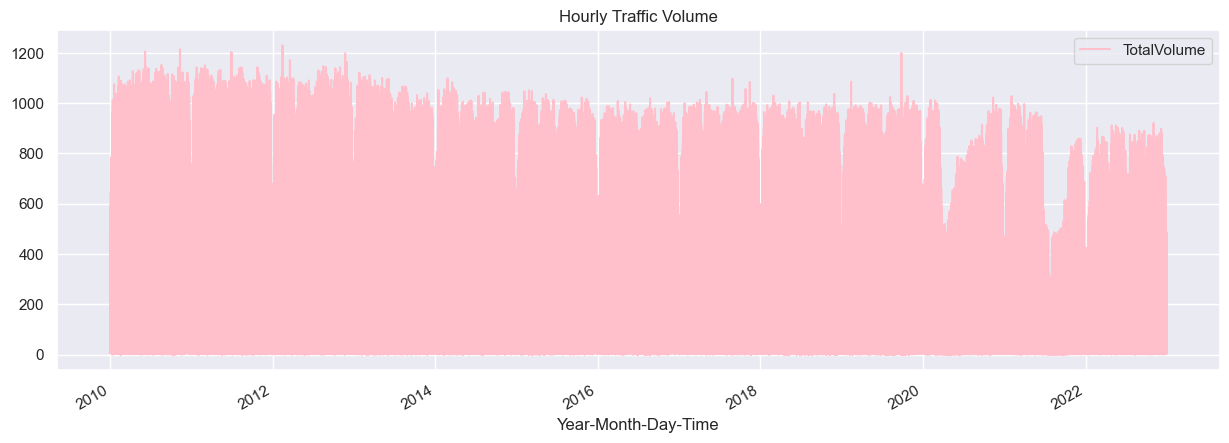

Wall time: 1.69 s


In [109]:
%%time
#Plot hourly traffic volume line graph for the given dataset
df_RMregressor_4.plot(style='-', figsize=(15,5), color='pink', title='Hourly Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Training & Testing Dataset</u></h2></center></font>

In [110]:
%%time
#Split train and test dataset for as a time series
training_df = df_RMregressor_4.loc[df_dtregressor_4.index < '01-01-2019']
testing_df = df_RMregressor_4.loc[ (df_dtregressor_4.index >= '01-01-2019') ]

Wall time: 6.47 ms


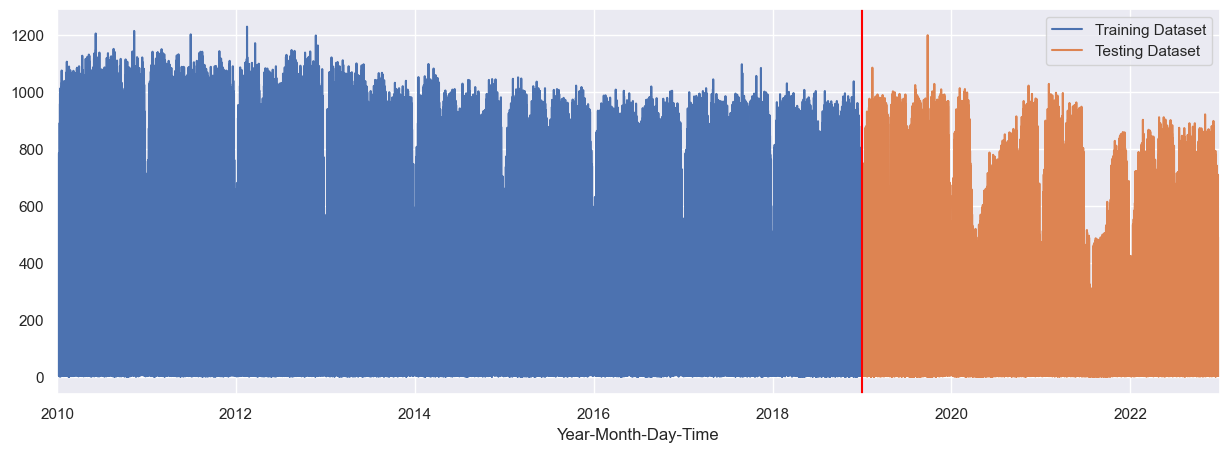

Wall time: 2.09 s


In [111]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2019', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [112]:
%%time
#Below is the feature creation created as a function
def rm_feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [113]:
%%time
#Diplay features
df = rm_feature_creation(df_RMregressor_4)
df

Wall time: 83.3 ms


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2010-01-01 00:00:00          248     0                4        1      1  2010   
2010-01-01 01:00:00          588     1                4        1      1  2010   
2010-01-01 02:00:00          195     2                4        1      1  2010   
2010-01-01 03:00:00           76     3                4        1      1  2010   
2010-01-01 04:00:00           46     4                4        1      1  2010   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00          184    19                5        4     12  2022   
2022-12-31 20:00:00          106    20                5        4     12  2022   
2022-12-31 21:00:00          172    21                5        4     12  2022   
2022-12-31 22:00:00          175    22                5        4     12  2022   
2022-12-31 23:00:00          109    23                5        4     12  2022   

                     Day of the year  
Year-Month-Day-Time                   
2010-01-01 00:00:00                1  
2010-01-01 01:00:00                1  
2010-01-01 02:00:00                1  
2010-01-01 03:00:00                1  
2010-01-01 04:00:00                1  
...                              ...  
2022-12-31 19:00:00              365  
2022-12-31 20:00:00              365  
2022-12-31 21:00:00              365  
2022-12-31 22:00:00              365  
2022-12-31 23:00:00              365  

[113753 rows x 7 columns]

In [114]:
%%time
#Adding features to train and test dataset
training_df = rm_feature_creation(training_df)
testing_df = rm_feature_creation(testing_df)
COLUMN_FEATURES = ['Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
COLUMN_TARGET = ['TotalVolume']

Wall time: 83 ms


In [115]:
%%time
X_train = training_df[COLUMN_FEATURES]
y_train = training_df[COLUMN_TARGET]

X_test = testing_df[COLUMN_FEATURES]
y_test = testing_df[COLUMN_TARGET]

Wall time: 11.9 ms


<font color='green'><center><h2><u>Model Creation</u></h2></center></font>

In [116]:
%%time
#Create the model
rmRegressor = RandomForestRegressor(n_estimators=100,
                            max_depth=50)
#rmRegressor = RandomForestRegressor(n_estimators=100)
#rmRegressor = RandomForestRegressor(n_estimators=200,
#                             max_depth=50)
rmRegressor.fit(X_train, y_train
       )

<timed exec>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Wall time: 35.6 s


RandomForestRegressor(max_depth=50)

<font color='green'><center><h2><u>Predict test dataset</u></h2></center></font>

In [117]:
%%time
testing_df['PredictedVolume'] = rmRegressor.predict(X_test)

Wall time: 1.71 s


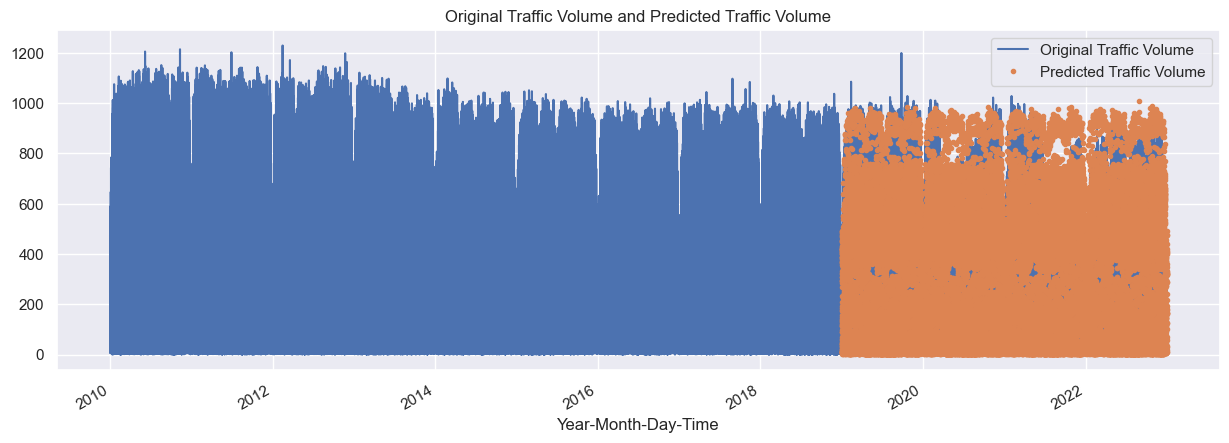

Wall time: 2.66 s


In [118]:
%%time
df = df.merge(testing_df['PredictedVolume'], how='left', left_index = True, right_index = True)
ax = df['TotalVolume'].plot(figsize=(15,5))
df['PredictedVolume'].plot(ax=ax, style='.')
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
ax.set_title('Original Traffic Volume and Predicted Traffic Volume')
plt.show()

In [119]:
%%time
#Display test data with predicted traffic volume
testing_df

Wall time: 0 ns


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2019-01-01 00:00:00          263     0                1        1      1  2019   
2019-01-01 01:00:00          449     1                1        1      1  2019   
2019-01-01 02:00:00          183     2                1        1      1  2019   
2019-01-01 03:00:00           92     3                1        1      1  2019   
2019-01-01 04:00:00           36     4                1        1      1  2019   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00          184    19                5        4     12  2022   
2022-12-31 20:00:00          106    20                5        4     12  2022   
2022-12-31 21:00:00          172    21                5        4     12  2022   
2022-12-31 22:00:00          175    22                5        4     12  2022   
2022-12-31 23:00:00          109    23                5        4     12  2022   

                     Day of the year  PredictedVolume  
Year-Month-Day-Time                                    
2019-01-01 00:00:00                1           234.17  
2019-01-01 01:00:00                1           491.98  
2019-01-01 02:00:00                1           207.77  
2019-01-01 03:00:00                1            88.50  
2019-01-01 04:00:00                1            34.99  
...                              ...              ...  
2022-12-31 19:00:00              365           218.64  
2022-12-31 20:00:00              365           161.93  
2022-12-31 21:00:00              365           165.88  
2022-12-31 22:00:00              365           193.14  
2022-12-31 23:00:00              365           124.93  

[34865 rows x 8 columns]

<font color='green'><center><h2><u>Plot Predicted Next Hour Traffic Volume of test dataset</u></h2></center></font>

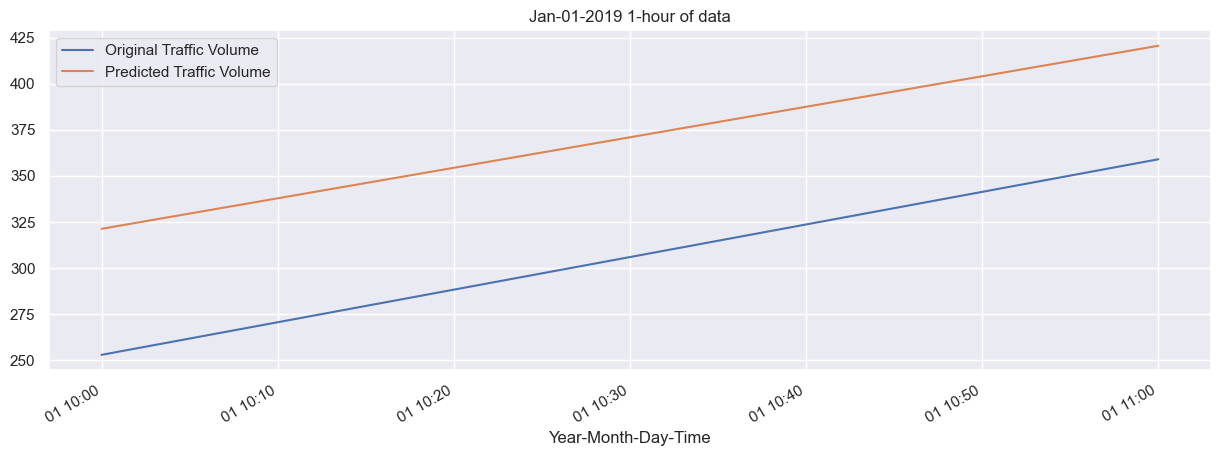

Wall time: 437 ms


In [120]:
%%time
#Hourly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan-01-2019 1-hour of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Plot Predicted Next one week Traffic Volume of test dataset for understanding</u></h2></center></font>

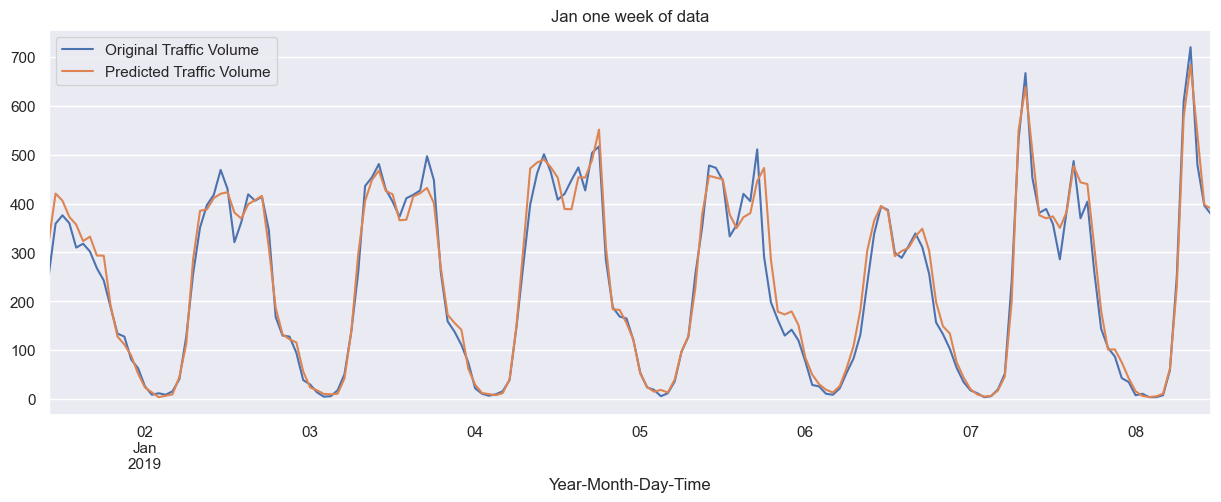

Wall time: 386 ms


In [121]:
%%time
#Weekly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan one week of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [122]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 55.51
Wall time: 1.62 ms


<font color='purple'><center><h1>End: Answering "Train and test the hourly traffic volume of cars and trucks in the historical data between 2010 & 2022 and will predict the next hour traffic volume as a short-range prediction"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Predict the future next day+ revenue from cars and trucks based on daily traffic volume"</h1></center></font>

<font color='blue'><center><h2>Model 1: ARIMA</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [263]:
%%time
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

#Auto correlation - To know how many previous data we have to take. 
#p,d,q. p - AR Model Lags, d - Differencing / Integration, q - Moving Average Lags
#q is determined from ACF and p from PACF
#In ACF if band is increasing then the error part is increasing
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA is used when the dataset is non seasonal
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

Wall time: 0 ns


<font color='green'><center><h2><u>Cars: Read Data & Data Pre-Processing</u></h2></center></font>

In [264]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as SJY
df_arima_charge = df_inp_data_charge4.copy()
df_arima_charge['Date'] = pd.to_datetime(df_arima_charge['Date'])
df_arima_charge_1 = df_arima_charge[ (df_arima_charge['TollPointID_x'] == "SJY") & 
                                        (df_arima_charge['VehicleClass'] == "Car") ]

Wall time: 333 ms


In [265]:
%%time
#Group by TotalVolume & TotalCharges
df_arima_charge_2 = df_arima_charge_1.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_arima_charge_2 = df_arima_charge_2.drop(columns = ['TotalTollCharge'])
df_arima_charge_2

Wall time: 15 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


TotalVolume
Date                   
2019-07-01         7086
2019-07-02         7612
2019-07-03         7702
2019-07-04         7836
2019-07-05         7933
...                 ...
2022-12-27         4306
2022-12-28         4757
2022-12-29         4699
2022-12-30         4761
2022-12-31         3811

[1280 rows x 1 columns]

<font color='green'><center><h2><u>Cars: Input Data Visualization</u></h2></center></font>

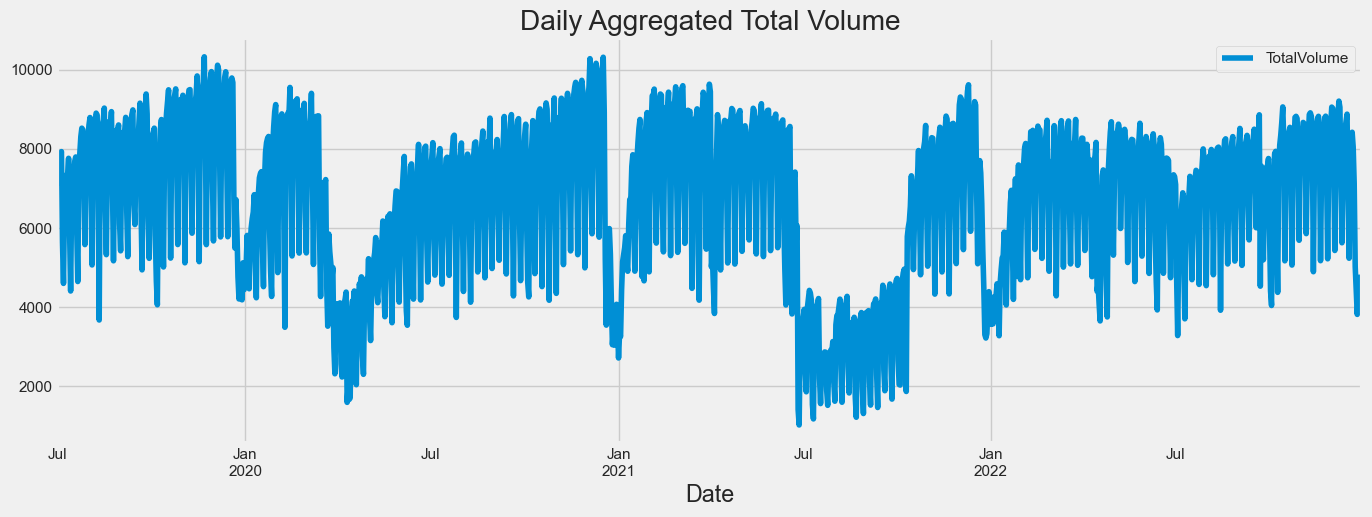

Wall time: 374 ms


In [266]:
%%time
#Plot daily aggregated traffic volume line graph for the given dataset
df_arima_charge_2.plot(figsize=(15,5), title='Daily Aggregated Total Volume')
plt.show()

Wall time: 73.8 ms


<AxesSubplot:xlabel='Date'>

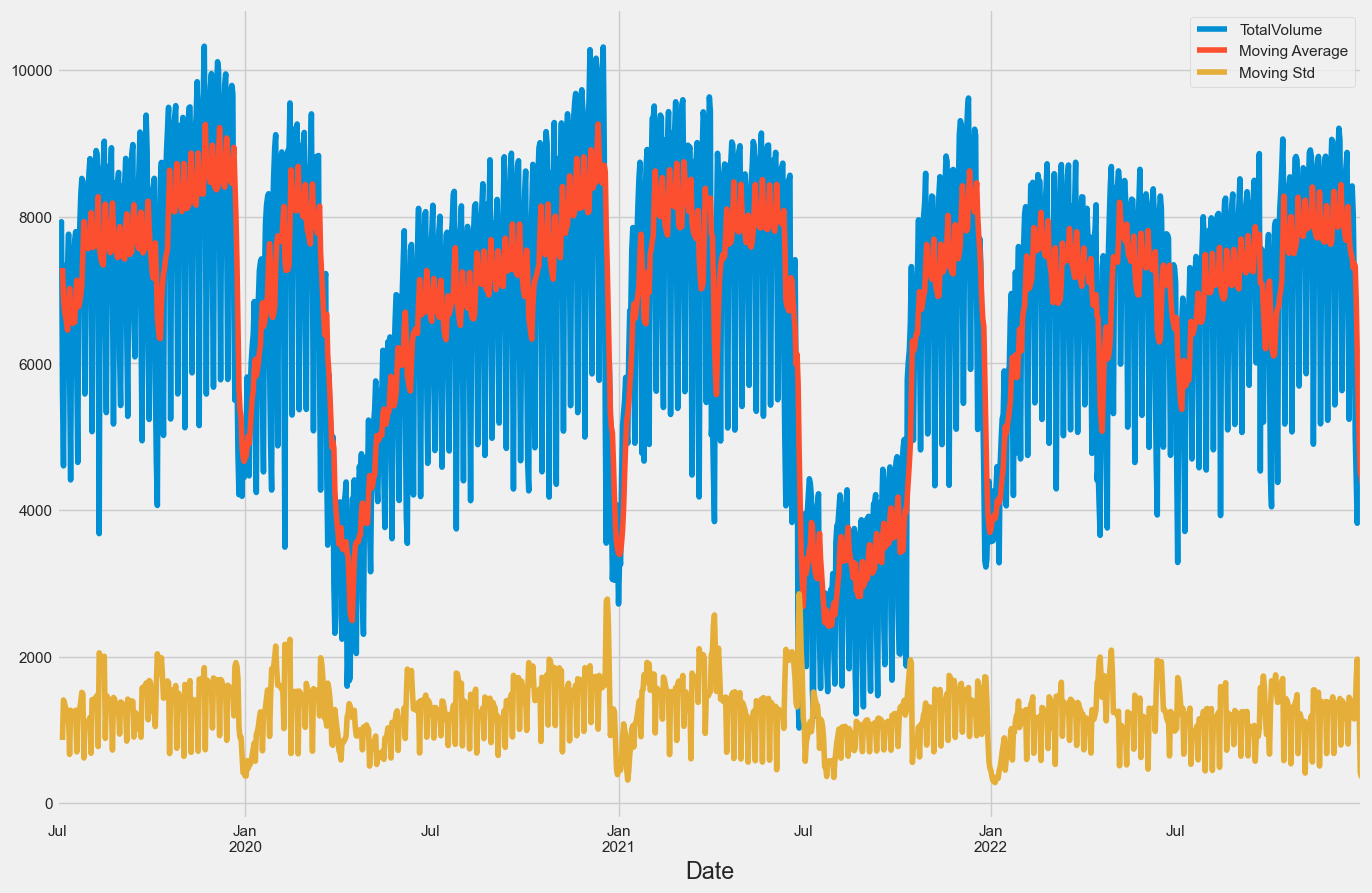

In [267]:
%%time
# Input Data Visualization, Moving average and Moving Standard Deviation
df_arima_charge_2['Moving Average'] = df_arima_charge_2['TotalVolume'].rolling(window=6).mean()
df_arima_charge_2['Moving Std'] = df_arima_charge_2['TotalVolume'].rolling(window=6).std()
df_arima_charge_2.plot.line(y=['TotalVolume','Moving Average','Moving Std'])

<font color='green'><center><h2><u>Cars: Stationarity Test: Augmented Dickey-Fuller Test</u></h2></center></font>

In [268]:
%%time
#Ho: It is not stationary
#H1: It is stationary
#This test is for hypothesis testing

def adfuller_test(volume):
    result = adfuller(volume)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    print("Critical values:")
    
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    if result[1] <= 0.05:
        print("p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("p-value: Weak evidence against the null hypothesis, time series has a unit root, indicating it is not stationary")
    
    if result[0] < result[4]["5%"]:
        print("t-value: Reject Ho - Time Series is Stationary")
    else:
        print("t-value: Failed to Reject Ho - Time Series is Non-Stationary")

Wall time: 0 ns


In [269]:
%%time
adfuller_test(df_arima_charge_2['TotalVolume'])

ADF Test Statistic : -3.9691981141597186
p-value : 0.0015806706760328943
#Lags Used : 22
Number of Observations Used : 1257
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 137 ms


<font color='green'><center><h2><u>Cars: Stationarity Test: Kwiatkowski–Phillips–Schmidt–Shin Test</u></h2></center></font>

In [270]:
%%time
stats, p, lags, critical_values = kpss(df_arima_charge_2['TotalVolume'], 'ct')
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.22775260023770857
p-value : 0.01
#Lags Used : 18
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is not stationary
Wall time: 1.99 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<font color='green'><center><h2><u>Cars: Differencing to make data as stationary for future prediction</u></h2></center></font>

In [271]:
%%time
df_arima_charge_2['Volume First Difference'] = df_arima_charge_2['TotalVolume'] - df_arima_charge_2['TotalVolume'].shift(1)

Wall time: 998 µs


In [272]:
%%time
df_arima_charge_2.head(25)

Wall time: 0 ns


TotalVolume  Moving Average   Moving Std  Volume First Difference
Date                                                                         
2019-07-01         7086             NaN          NaN                      NaN
2019-07-02         7612             NaN          NaN                    526.0
2019-07-03         7702             NaN          NaN                     90.0
2019-07-04         7836             NaN          NaN                    134.0
2019-07-05         7933             NaN          NaN                     97.0
2019-07-06         5645     7302.333333   863.912187                  -2288.0
2019-07-07         4603     6888.500000  1410.232144                  -1042.0
2019-07-08         6596     6719.166667  1366.296808                   1993.0
2019-07-09         7213     6637.666667  1309.342685                    617.0
2019-07-10         7348     6556.333333  1232.945362                    135.0
2019-07-11         7320     6454.166667  1115.895948                    -28.0
2019-07-12         7763     6807.166667  1143.394843                    443.0
2019-07-13         5899     7023.166667   666.819141                  -1864.0
2019-07-14         4411     6659.000000  1270.313190                  -1488.0
2019-07-15         6732     6578.833333  1243.248232                   2321.0
2019-07-16         7146     6545.166667  1220.785881                    414.0
2019-07-17         7509     6576.666667  1246.935871                    363.0
2019-07-18         7681     6563.000000  1231.689084                    172.0
2019-07-19         7797     6879.333333  1270.177101                    116.0
2019-07-20         5942     7134.500000   701.714116                  -1855.0
2019-07-21         4650     6787.500000  1245.013534                  -1292.0
2019-07-22         7078     6776.166667  1241.401694                   2428.0
2019-07-23         7888     6839.333333  1294.648936                    810.0
2019-07-24         8312     6944.500000  1398.181927                    424.0
2019-07-25         8524     7065.666667  1513.574533                    212.0

In [273]:
%%time
#Again do adf test
adfuller_test( df_arima_charge_2['Volume First Difference'].dropna() )

ADF Test Statistic : -8.361178841175036
p-value : 2.8208734634620737e-13
#Lags Used : 20
Number of Observations Used : 1258
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 150 ms


In [274]:
%%time
#Again do kpss test
stats, p, lags, critical_values = kpss(df_arima_charge_2['Volume First Difference'].dropna(), 'ct')
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.04932253085799283
p-value : 0.1
#Lags Used : 69
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is stationary
Wall time: 2 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<font color='green'><center><h2><u>Cars: Visualize first order shifted dataset</u></h2></center></font>

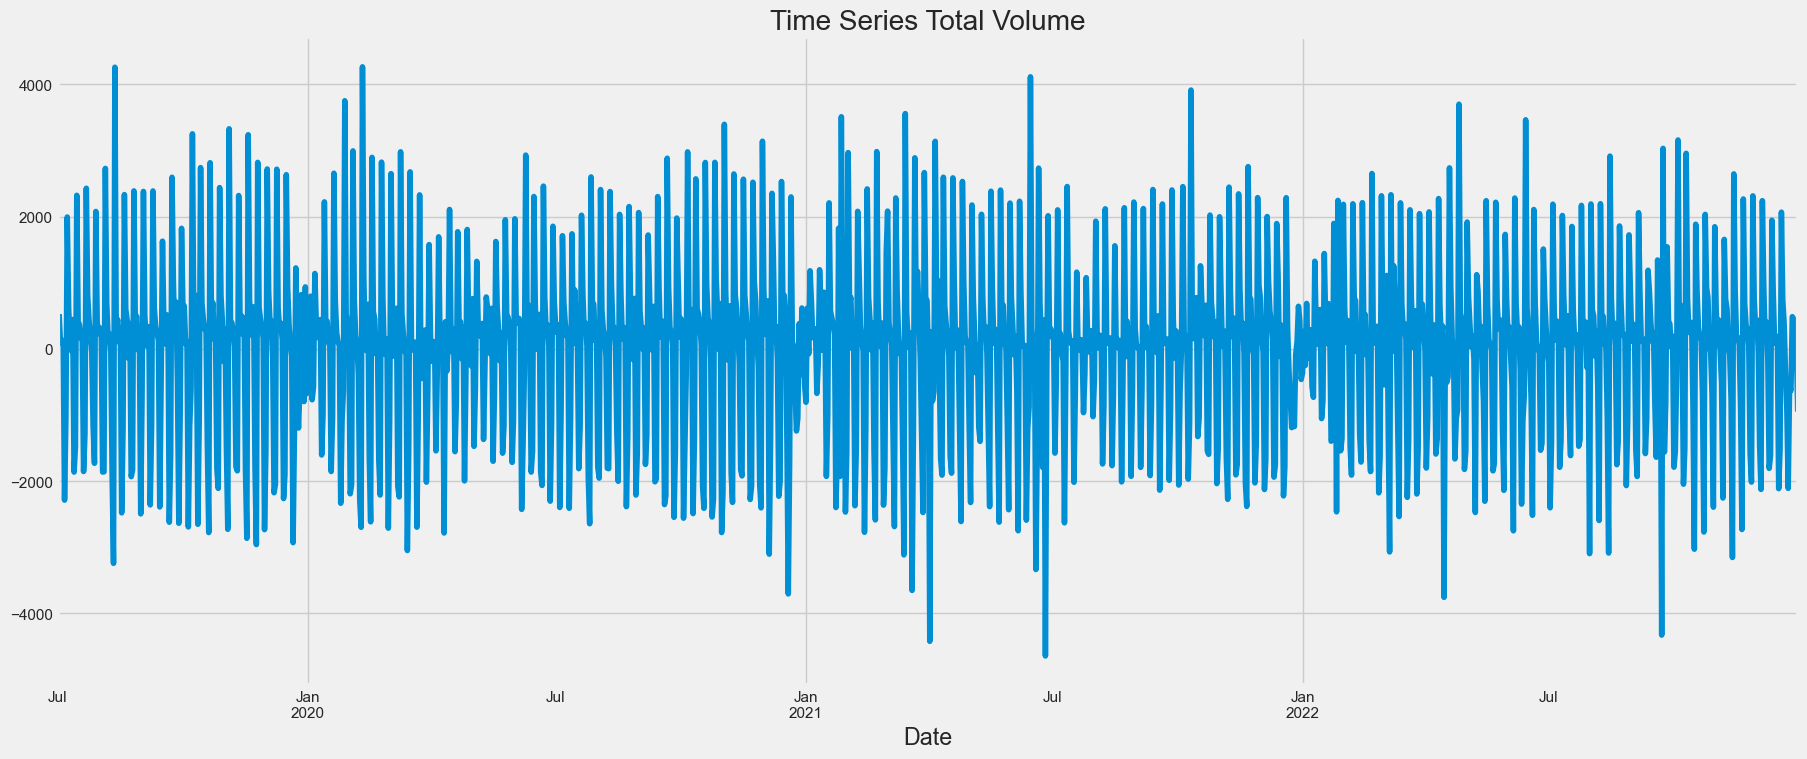

Wall time: 474 ms


In [275]:
%%time
df_arima_charge_2['Volume First Difference'].plot(figsize=(20,8), title="Time Series Total Volume")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

Wall time: 71.8 ms


<AxesSubplot:xlabel='Date'>

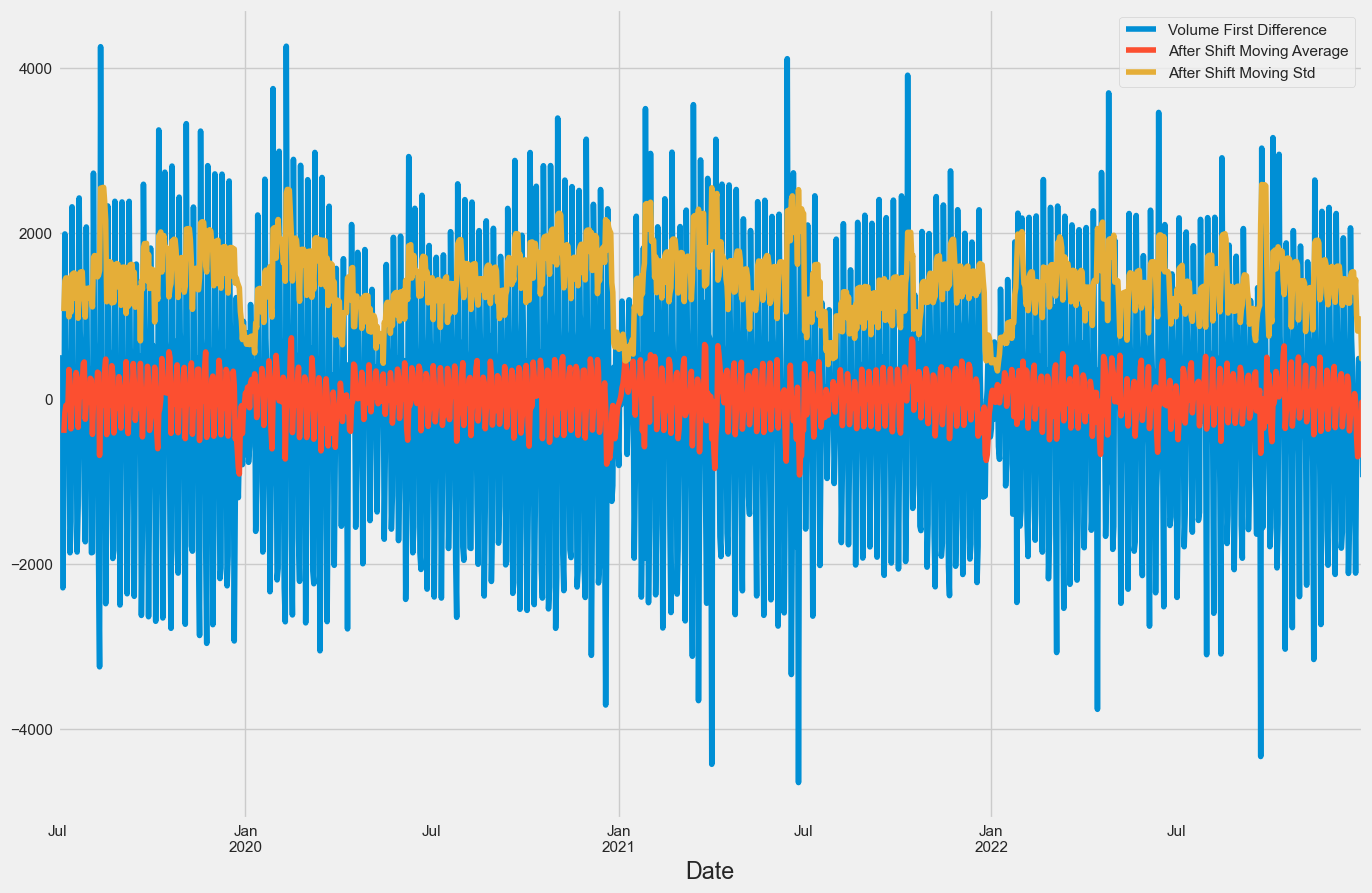

In [276]:
%%time
#Moving average and Moving standard deviation
df_arima_charge_2['After Shift Moving Average'] = df_arima_charge_2['Volume First Difference'].rolling(window=6).mean()
df_arima_charge_2['After Shift Moving Std'] = df_arima_charge_2['Volume First Difference'].rolling(window=6).std()
df_arima_charge_2.plot.line(y=['Volume First Difference','After Shift Moving Average','After Shift Moving Std'])

<font color='green'><center><h2><u>Cars: Plot Autocorrelation & Partial Autocorrelation</u></h2></center></font>

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Wall time: 47.8 ms


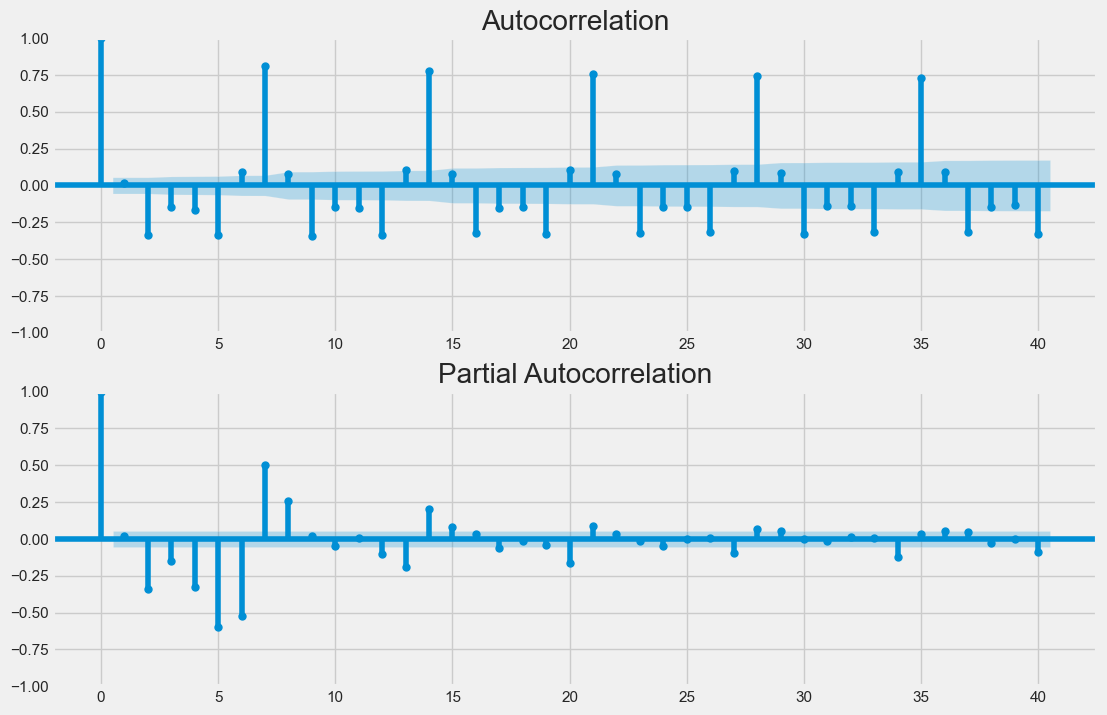

In [277]:
%%time
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_arima_charge_2['Volume First Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_arima_charge_2['Volume First Difference'].iloc[2:],lags=40,ax=ax2)

<font color='green'><center><h2><u>Cars: Fit Model</u></h2></center></font>

In [278]:
%%time
model = sm.tsa.arima.ARIMA(df_arima_charge_2['TotalVolume'], order=(26,1,18))
results = model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

Wall time: 24.9 s


<font color='green'><center><h2><u>Cars: Forecast / Predict using ARIMA model</u></h2></center></font>

Wall time: 88.6 ms


<AxesSubplot:xlabel='Date'>

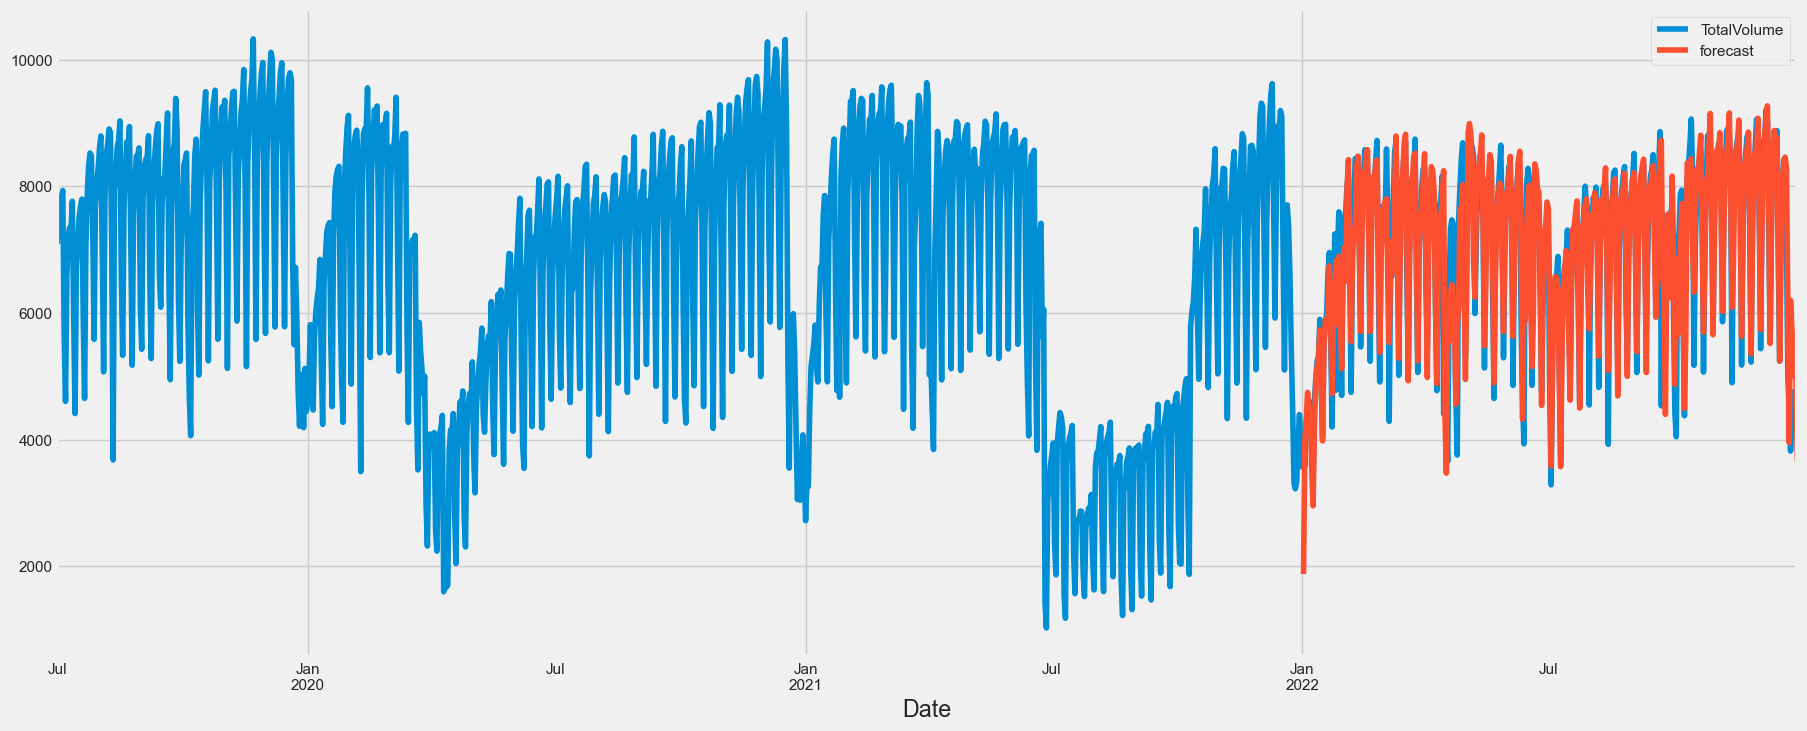

In [279]:
%%time
df_arima_charge_2['forecast'] = results.predict(start=916, end = 1280, dynamic= False)
df_arima_charge_2[['TotalVolume','forecast']].plot(figsize=(20,8))

<font color='green'><center><h2><u>Cars: Evaluation Metrics</u></h2></center></font>

In [280]:
%%time
ErrorValue = np.abs( df_arima_charge_2['TotalVolume'] - df_arima_charge_2['forecast'] )
print('Mean Abosolute Error Score of the predicted Dataset:', round(ErrorValue.mean(),2) )

Mean Abosolute Error Score of the predicted Dataset: 421.29
Wall time: 998 µs


<font color='blue'><center><h2>Model 2: LSTM</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [236]:
%%time
#Import Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
from sklearn.metrics import mean_squared_error

Wall time: 0 ns


<font color='green'><center><h2><u>Cars: Read Data & Data Pre-Processing</u></h2></center></font>

In [237]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as SJY
df_lstm_charge = df_inp_data_charge4.copy()
df_lstm_charge['Date'] = pd.to_datetime(df_lstm_charge['Date'])
df_lstm_charge_1 = df_lstm_charge[ (df_lstm_charge['TollPointID_x'] == "SJY") & 
                                        (df_lstm_charge['VehicleClass'] == "Car") ]

Wall time: 264 ms


In [238]:
%%time
#Group by TotalVolume & TotalCharges
df_lstm_charge_2 = df_lstm_charge_1.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_lstm_charge_2.to_csv('lstm_charge.csv')
df_lstm_charge_3 = pd.read_csv("C:/Users/USER/Documents/Toll/lstm_charge.csv")
df_lstm_charge_3

Wall time: 34.9 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Date  TotalVolume  TotalTollCharge
0     2019-07-01         7086         19273.92
1     2019-07-02         7612         20704.64
2     2019-07-03         7702         20949.44
3     2019-07-04         7836         21313.92
4     2019-07-05         7933         21577.76
...          ...          ...              ...
1275  2022-12-27         4306         12961.06
1276  2022-12-28         4757         14318.57
1277  2022-12-29         4699         14143.99
1278  2022-12-30         4761         14330.61
1279  2022-12-31         3811         11471.11

[1280 rows x 3 columns]

In [239]:
%%time
#Convert total volume & charge to float
cols = list(df_lstm_charge_3)[1:3]
df_lstm_charge_4 = df_lstm_charge_3[cols].astype(float)

#Display Total Volume & Charge as float
df_lstm_charge_4

Wall time: 998 µs


TotalVolume  TotalTollCharge
0          7086.0         19273.92
1          7612.0         20704.64
2          7702.0         20949.44
3          7836.0         21313.92
4          7933.0         21577.76
...           ...              ...
1275       4306.0         12961.06
1276       4757.0         14318.57
1277       4699.0         14143.99
1278       4761.0         14330.61
1279       3811.0         11471.11

[1280 rows x 2 columns]

<font color='green'><center><h2><u>Cars: Data Normalization</u></h2></center></font>

In [240]:
%%time
#Normalize the dataset
scaler = StandardScaler()
df_lstm_charge_4_scaled = scaler.fit_transform(df_lstm_charge_4)

Wall time: 4.99 ms


In [241]:
%%time
#Check the shape of scaled data
df_lstm_charge_4_scaled.shape

Wall time: 0 ns


(1280, 2)

In [242]:
%%time
#Display scaled data
df_lstm_charge_4_scaled

Wall time: 0 ns


array([[ 0.17077495,  0.0409944 ],
       [ 0.43778133,  0.29778167],
       [ 0.48346684,  0.34171866],
       ...,
       [-1.04090612, -0.87973135],
       [-1.00943388, -0.84623658],
       [-1.49166975, -1.35946293]])

<font color='green'><center><h2><u>Cars: Training & Testing Dataset</u></h2></center></font>

In [243]:
%%time
trainX = []
trainY = []
n_future = 1 #No of days to predict in future
n_past = 14 #No of past days want to predict future

Wall time: 0 ns


In [244]:
%%time
for i in range(n_past, len(df_lstm_charge_4_scaled) - n_future + 1):
    trainX.append(df_lstm_charge_4_scaled[i - n_past:i, 0:df_lstm_charge_4_scaled.shape[1]])
    trainY.append(df_lstm_charge_4_scaled[i + n_future - 1:i + n_future, 0])

Wall time: 2 ms


In [245]:
%%time
trainX, trainY = np.array(trainX), np.array(trainY)

Wall time: 2.99 ms


In [246]:
%%time
print('trainX:', format(trainX.shape))
print('trainY:', format(trainY.shape))

trainX: (1266, 14, 2)
trainY: (1266, 1)
Wall time: 0 ns


<font color='green'><center><h2><u>Cars: Model Creation</u></h2></center></font>

In [247]:
%%time
#Create model
model = Sequential()
model.add(LSTM(64, activation = 'relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation = 'relu', return_sequences=False))
model.add(Dense(trainY.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 64)            17152     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________
Wall time: 242 ms


In [248]:
%%time
#fit the model
history = model.fit(trainX, trainY, batch_size=16, validation_split=0.1, verbose=2, epochs=10)

Epoch 1/10
72/72 - 3s - loss: 0.5975 - mse: 0.5975 - val_loss: 0.4784 - val_mse: 0.4784 - 3s/epoch - 44ms/step
Epoch 2/10
72/72 - 1s - loss: 0.5302 - mse: 0.5302 - val_loss: 0.4670 - val_mse: 0.4670 - 641ms/epoch - 9ms/step
Epoch 3/10
72/72 - 1s - loss: 0.5127 - mse: 0.5127 - val_loss: 0.4282 - val_mse: 0.4282 - 645ms/epoch - 9ms/step
Epoch 4/10
72/72 - 1s - loss: 0.4294 - mse: 0.4294 - val_loss: 0.4248 - val_mse: 0.4248 - 636ms/epoch - 9ms/step
Epoch 5/10
72/72 - 1s - loss: 0.3622 - mse: 0.3622 - val_loss: 0.3014 - val_mse: 0.3014 - 625ms/epoch - 9ms/step
Epoch 6/10
72/72 - 1s - loss: 0.2680 - mse: 0.2680 - val_loss: 0.1774 - val_mse: 0.1774 - 592ms/epoch - 8ms/step
Epoch 7/10
72/72 - 1s - loss: 0.2215 - mse: 0.2215 - val_loss: 0.2140 - val_mse: 0.2140 - 630ms/epoch - 9ms/step
Epoch 8/10
72/72 - 1s - loss: 0.1875 - mse: 0.1875 - val_loss: 0.1829 - val_mse: 0.1829 - 601ms/epoch - 8ms/step
Epoch 9/10
72/72 - 1s - loss: 0.1778 - mse: 0.1778 - val_loss: 0.1583 - val_mse: 0.1583 - 630ms/ep

Wall time: 20.9 ms


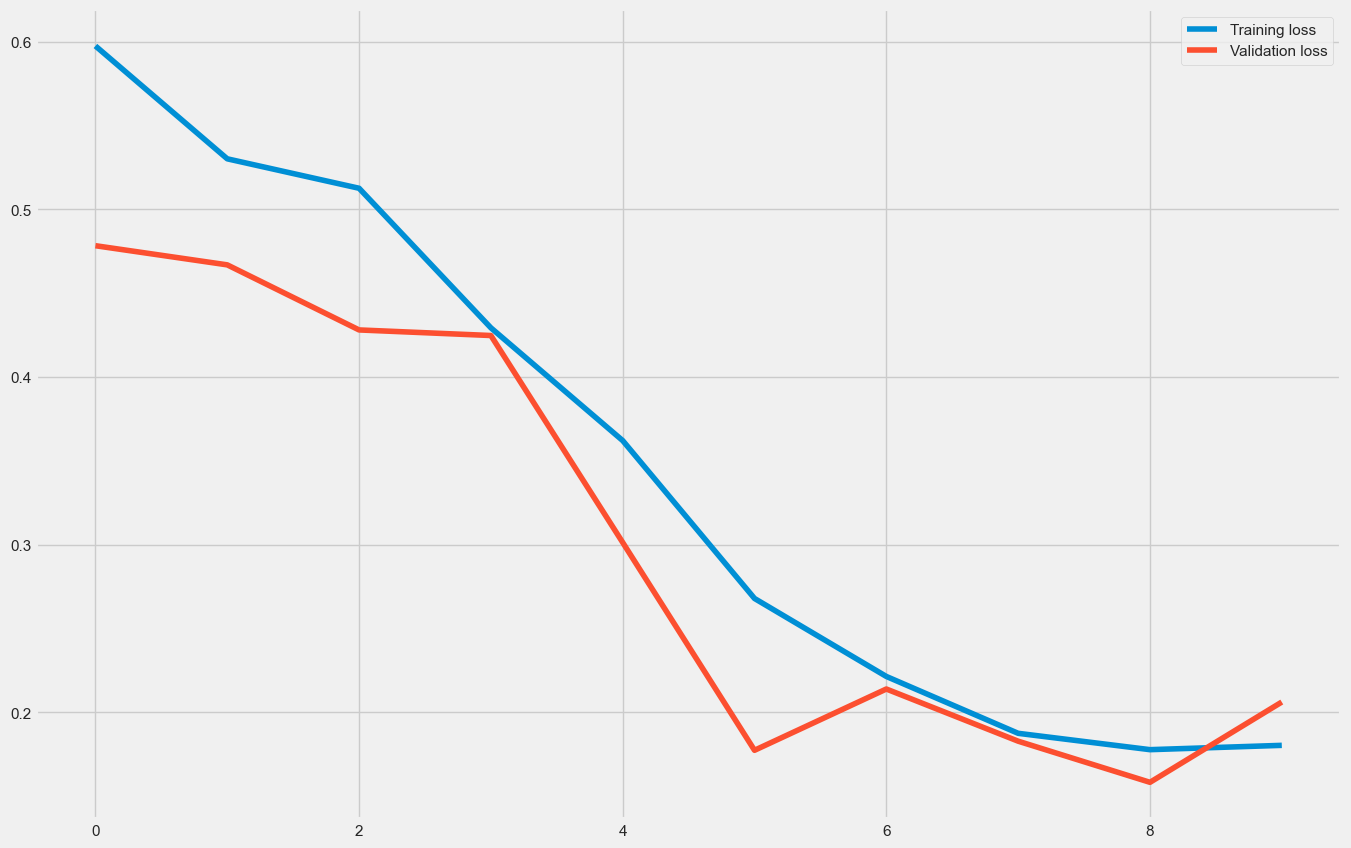

In [249]:
%%time
#Plot the model loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

<font color='green'><center><h2><u>Cars: Predict train & test dataset</u></h2></center></font>

In [250]:
%%time
n_past_days = 16
n_days_for_prediction = 15  #let us predict past 15 days

#Separate dates for future plotting
training_dates = pd.to_datetime(df_lstm_charge_3['Date'])
print(training_dates.tail(15)) #Check last few dates. 

predict_period_dates = pd.date_range(list(training_dates)[-n_past_days], periods=n_days_for_prediction, freq='1d').tolist()
print(predict_period_dates)

1265   2022-12-17
1266   2022-12-18
1267   2022-12-19
1268   2022-12-20
1269   2022-12-21
1270   2022-12-22
1271   2022-12-23
1272   2022-12-24
1273   2022-12-25
1274   2022-12-26
1275   2022-12-27
1276   2022-12-28
1277   2022-12-29
1278   2022-12-30
1279   2022-12-31
Name: Date, dtype: datetime64[ns]
[Timestamp('2022-12-16 00:00:00', freq='D'), Timestamp('2022-12-17 00:00:00', freq='D'), Timestamp('2022-12-18 00:00:00', freq='D'), Timestamp('2022-12-19 00:00:00', freq='D'), Timestamp('2022-12-20 00:00:00', freq='D'), Timestamp('2022-12-21 00:00:00', freq='D'), Timestamp('2022-12-22 00:00:00', freq='D'), Timestamp('2022-12-23 00:00:00', freq='D'), Timestamp('2022-12-24 00:00:00', freq='D'), Timestamp('2022-12-25 00:00:00', freq='D'), Timestamp('2022-12-26 00:00:00', freq='D'), Timestamp('2022-12-27 00:00:00', freq='D'), Timestamp('2022-12-28 00:00:00', freq='D'), Timestamp('2022-12-29 00:00:00', freq='D'), Timestamp('2022-12-30 00:00:00', freq='D')]
Wall time: 4.98 ms


In [251]:
%%time
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

1/1 [==============================] - 0s 243ms/step
Wall time: 294 ms


In [252]:
%%time
prediction_copies = np.repeat(prediction, df_lstm_charge_4.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

Wall time: 0 ns


In [253]:
%%time
#Predicted values
y_pred_future

Wall time: 0 ns


array([7219.2812, 5282.185 , 7842.743 , 8672.76  , 8981.277 , 9285.277 ,
       8828.087 , 6841.883 , 5142.7407, 6689.536 , 5687.5415, 5576.027 ,
       5574.372 , 5408.6924, 4931.95  ], dtype=float32)

In [254]:
%%time
# Convert predicted date timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

Wall time: 0 ns


In [255]:
%%time
#Predicted date and total volume
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'TotalVolume':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

Wall time: 997 µs


In [256]:
%%time
#Original data
original = df_lstm_charge_3[['Date', 'TotalVolume']]
original['Date']=pd.to_datetime(original['Date'])
original_filtered = original.loc[ (original['Date'] <= '2022-12-16') ]

Wall time: 3.99 ms


<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 84.8 ms


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='TotalVolume'>

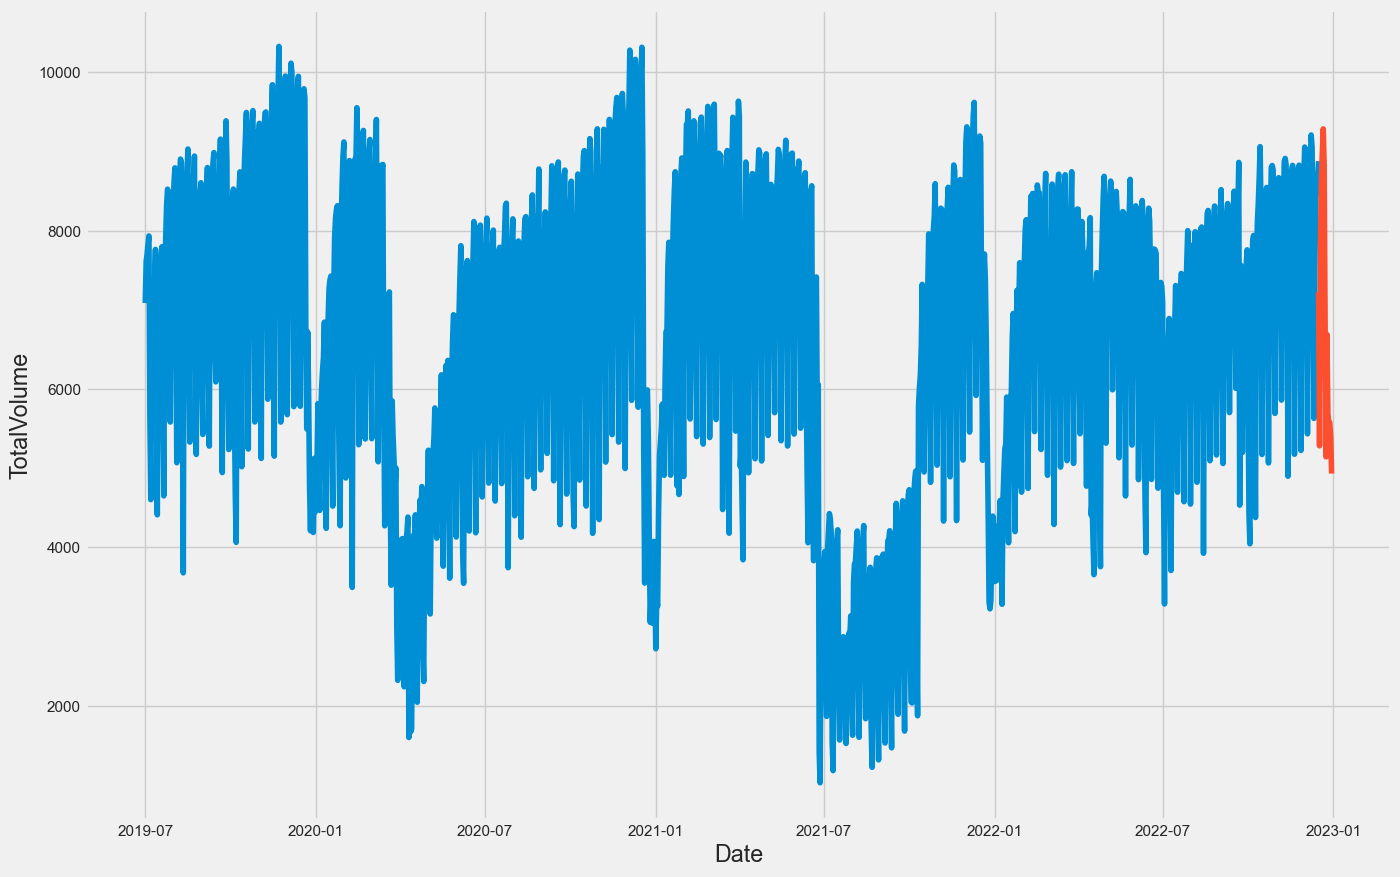

In [257]:
%%time
#Plot Original and Forcasted total volume
sns.lineplot(original_filtered['Date'], original_filtered['TotalVolume'])
sns.lineplot(df_forecast['Date'], df_forecast['TotalVolume'])

<font color='green'><center><h2><u>Cars: Evaluation Metrics</u></h2></center></font>

In [258]:
%%time
original_subset = original.loc[ (original['Date'] >= '2022-12-16') & (original['Date'] <= '2022-12-31') ]

Wall time: 2 ms


In [259]:
%%time
merged = pd.merge(original_subset, df_forecast, on="Date", how="left")
merged

Wall time: 3.03 ms


Date  TotalVolume_x  TotalVolume_y
0  2022-12-16           8878    7219.281250
1  2022-12-17           6764    5282.185059
2  2022-12-18           5238    7842.743164
3  2022-12-19           7304    8672.759766
4  2022-12-20           8037    8981.277344
5  2022-12-21           8421    9285.277344
6  2022-12-22           8054    8828.086914
7  2022-12-23           7132    6841.882812
8  2022-12-24           5022    5142.740723
9  2022-12-25           4452    6689.536133
10 2022-12-26           3820    5687.541504
11 2022-12-27           4306    5576.026855
12 2022-12-28           4757    5574.372070
13 2022-12-29           4699    5408.692383
14 2022-12-30           4761    4931.950195
15 2022-12-31           3811            NaN

In [260]:
%%time
ErrorValue = np.abs( merged['TotalVolume_x'] - merged['TotalVolume_y']  )
print('Mean Abosolute Error Score of the Forcasted Dataset:', round(ErrorValue.mean(),2) )

Mean Abosolute Error Score of the Forcasted Dataset: 1145.38
Wall time: 997 µs


<font color='blue'><center><h2>Model 3: XGBoostRegressor</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [185]:
%%time
#Importing Libraries Required
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
colour_palette = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.model_selection import TimeSeriesSplit

Wall time: 998 µs


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [186]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as SJY
df_xgboost_charge = df_inp_data_charge4.copy()
df_xgboost_charge['Date'] = pd.to_datetime(df_xgboost_charge['Date'])
df_xgboost_charge_1_Car = df_xgboost_charge[ (df_xgboost_charge['TollPointID_x'] == "SJY") & 
                                        (df_xgboost_charge['VehicleClass'] == "Car") ]
df_xgboost_charge_1_Truck = df_xgboost_charge[ (df_xgboost_charge['TollPointID_x'] == "SJY") &
                                       (df_xgboost_charge['VehicleClass'] == "Truck") ]

Wall time: 334 ms


In [187]:
%%time
#Group by TotalVolume & TotalCharges
df_xgboost_charge_2_Car = df_xgboost_charge_1_Car.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_xgboost_charge_2_Car

Wall time: 12 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


TotalVolume  TotalTollCharge
Date                                    
2019-07-01         7086         19273.92
2019-07-02         7612         20704.64
2019-07-03         7702         20949.44
2019-07-04         7836         21313.92
2019-07-05         7933         21577.76
...                 ...              ...
2022-12-27         4306         12961.06
2022-12-28         4757         14318.57
2022-12-29         4699         14143.99
2022-12-30         4761         14330.61
2022-12-31         3811         11471.11

[1280 rows x 2 columns]

In [188]:
%%time
#Group by TotalVolume & TotalCharges
df_xgboost_charge_2_Truck = df_xgboost_charge_1_Truck.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_xgboost_charge_2_Truck

Wall time: 5.98 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


TotalVolume  TotalTollCharge
Date                                    
2019-07-01           85           463.25
2019-07-02           80           436.00
2019-07-03           64           348.80
2019-07-04           73           397.85
2019-07-05           72           392.40
...                 ...              ...
2022-12-27           15            90.30
2022-12-28           41           246.82
2022-12-29           39           234.78
2022-12-30           31           186.62
2022-12-31           15            90.30

[1280 rows x 2 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

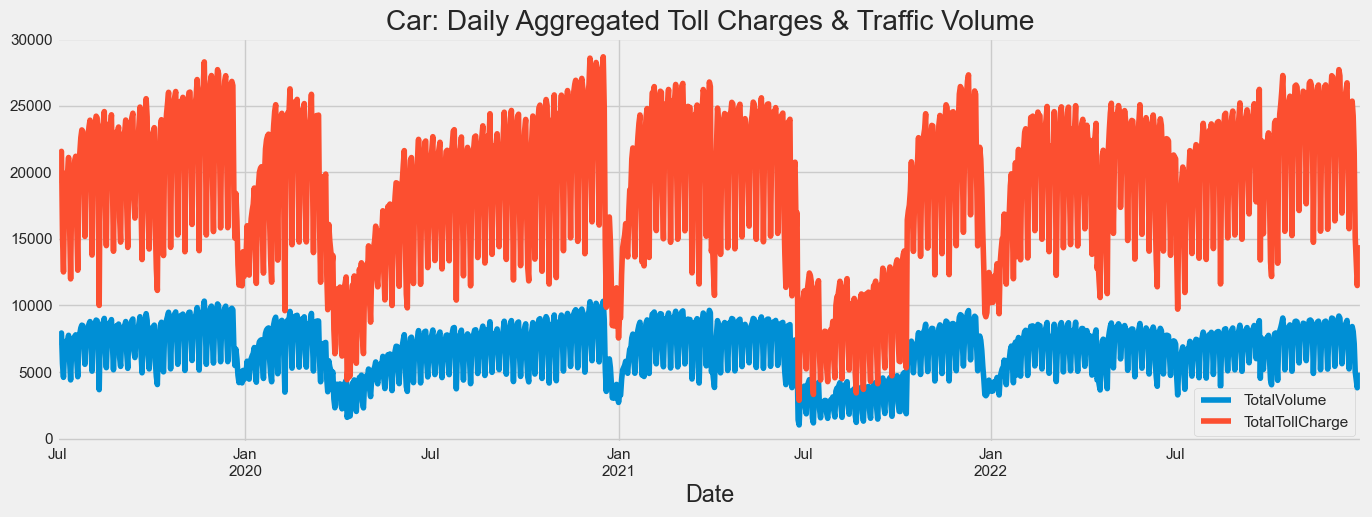

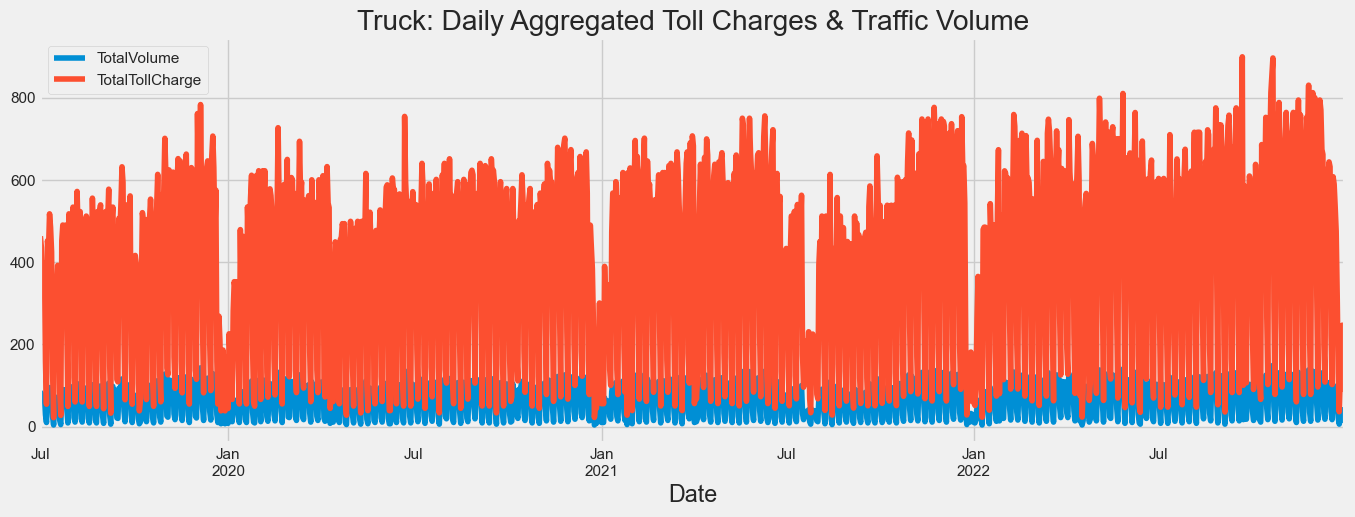

Wall time: 794 ms


In [189]:
%%time
#Plot daily aggregated toll charges and traffic volume line graph for the given dataset
df_xgboost_charge_2_Car.plot(figsize=(15,5), title='Car: Daily Aggregated Toll Charges & Traffic Volume')
plt.show()

df_xgboost_charge_2_Truck.plot(figsize=(15,5), title='Truck: Daily Aggregated Toll Charges & Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [190]:
%%time
#Below is the feature creation created as a function
def xgb_feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [191]:
%%time
#Car: Diplay features
df_xgboost_charge_3_Car = xgb_feature_creation(df_xgboost_charge_2_Car)
df_xgboost_charge_3_Car

Wall time: 5.02 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
Date                                                                       
2019-07-01         7086         19273.92     0                0        3   
2019-07-02         7612         20704.64     0                1        3   
2019-07-03         7702         20949.44     0                2        3   
2019-07-04         7836         21313.92     0                3        3   
2019-07-05         7933         21577.76     0                4        3   
...                 ...              ...   ...              ...      ...   
2022-12-27         4306         12961.06     0                1        4   
2022-12-28         4757         14318.57     0                2        4   
2022-12-29         4699         14143.99     0                3        4   
2022-12-30         4761         14330.61     0                4        4   
2022-12-31         3811         11471.11     0                5        4   

            Month  Year  Day of the year  
Date                                      
2019-07-01      7  2019              182  
2019-07-02      7  2019              183  
2019-07-03      7  2019              184  
2019-07-04      7  2019              185  
2019-07-05      7  2019              186  
...           ...   ...              ...  
2022-12-27     12  2022              361  
2022-12-28     12  2022              362  
2022-12-29     12  2022              363  
2022-12-30     12  2022              364  
2022-12-31     12  2022              365  

[1280 rows x 8 columns]

In [192]:
%%time
#Truck Diplay features
df_xgboost_charge_3_Truck = xgb_feature_creation(df_xgboost_charge_2_Truck)
df_xgboost_charge_3_Truck

Wall time: 4.02 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
Date                                                                       
2019-07-01           85           463.25     0                0        3   
2019-07-02           80           436.00     0                1        3   
2019-07-03           64           348.80     0                2        3   
2019-07-04           73           397.85     0                3        3   
2019-07-05           72           392.40     0                4        3   
...                 ...              ...   ...              ...      ...   
2022-12-27           15            90.30     0                1        4   
2022-12-28           41           246.82     0                2        4   
2022-12-29           39           234.78     0                3        4   
2022-12-30           31           186.62     0                4        4   
2022-12-31           15            90.30     0                5        4   

            Month  Year  Day of the year  
Date                                      
2019-07-01      7  2019              182  
2019-07-02      7  2019              183  
2019-07-03      7  2019              184  
2019-07-04      7  2019              185  
2019-07-05      7  2019              186  
...           ...   ...              ...  
2022-12-27     12  2022              361  
2022-12-28     12  2022              362  
2022-12-29     12  2022              363  
2022-12-30     12  2022              364  
2022-12-31     12  2022              365  

[1280 rows x 8 columns]

Wall time: 61.8 ms


Text(0.5, 1.0, 'Car: Daily Aggregated Total Volume')

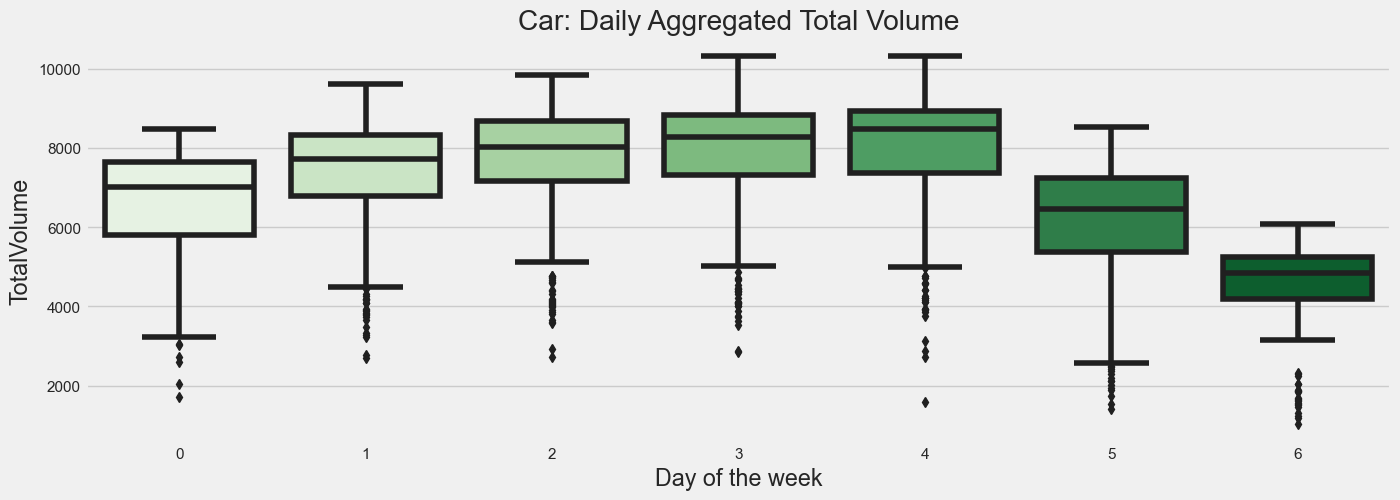

In [193]:
%%time
# Visualize hourly feature to target relationship
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df_xgboost_charge_3_Car, x='Day of the week', y='TotalVolume', palette='Greens')
ax.set_title('Car: Daily Aggregated Total Volume')

Wall time: 61.8 ms


Text(0.5, 1.0, 'Truck: Daily Aggregated Total Volume')

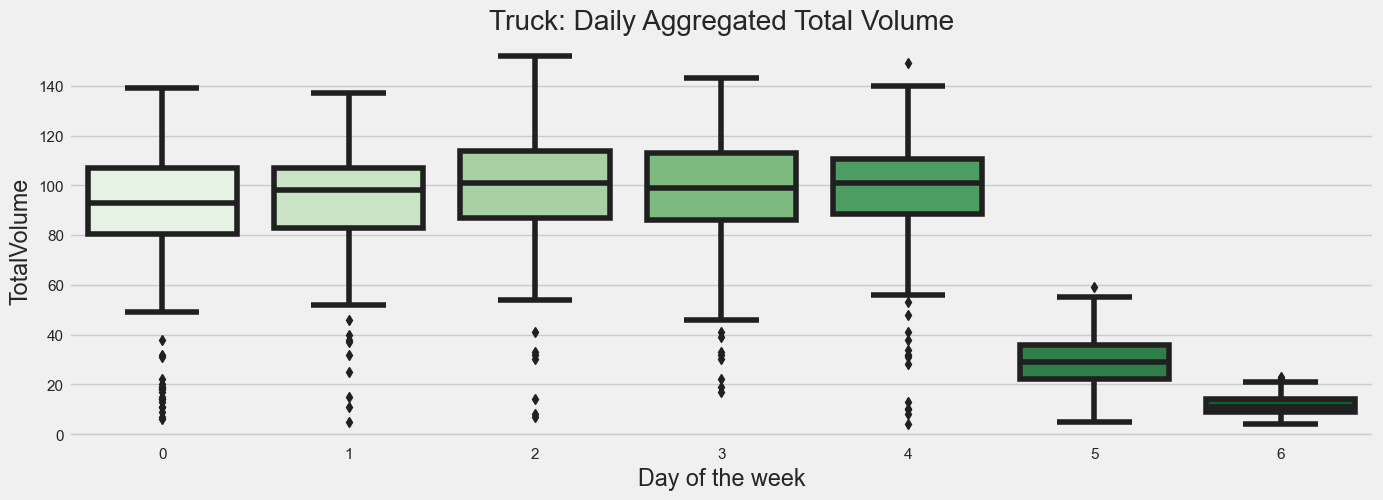

In [194]:
%%time
# Visualize hourly feature to target relationship
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df_xgboost_charge_3_Truck, x='Day of the week', y='TotalVolume', palette='Greens')
ax.set_title('Truck: Daily Aggregated Total Volume')

<h2>Summary from Day of the week feature to target relationship:
<h3>
Wednesday, Thursday and Friday of the week shows more traffic volume than the other days of the week.

Wall time: 94.8 ms


Text(0.5, 1.0, 'Car: Monthly Aggregated Total Volume')

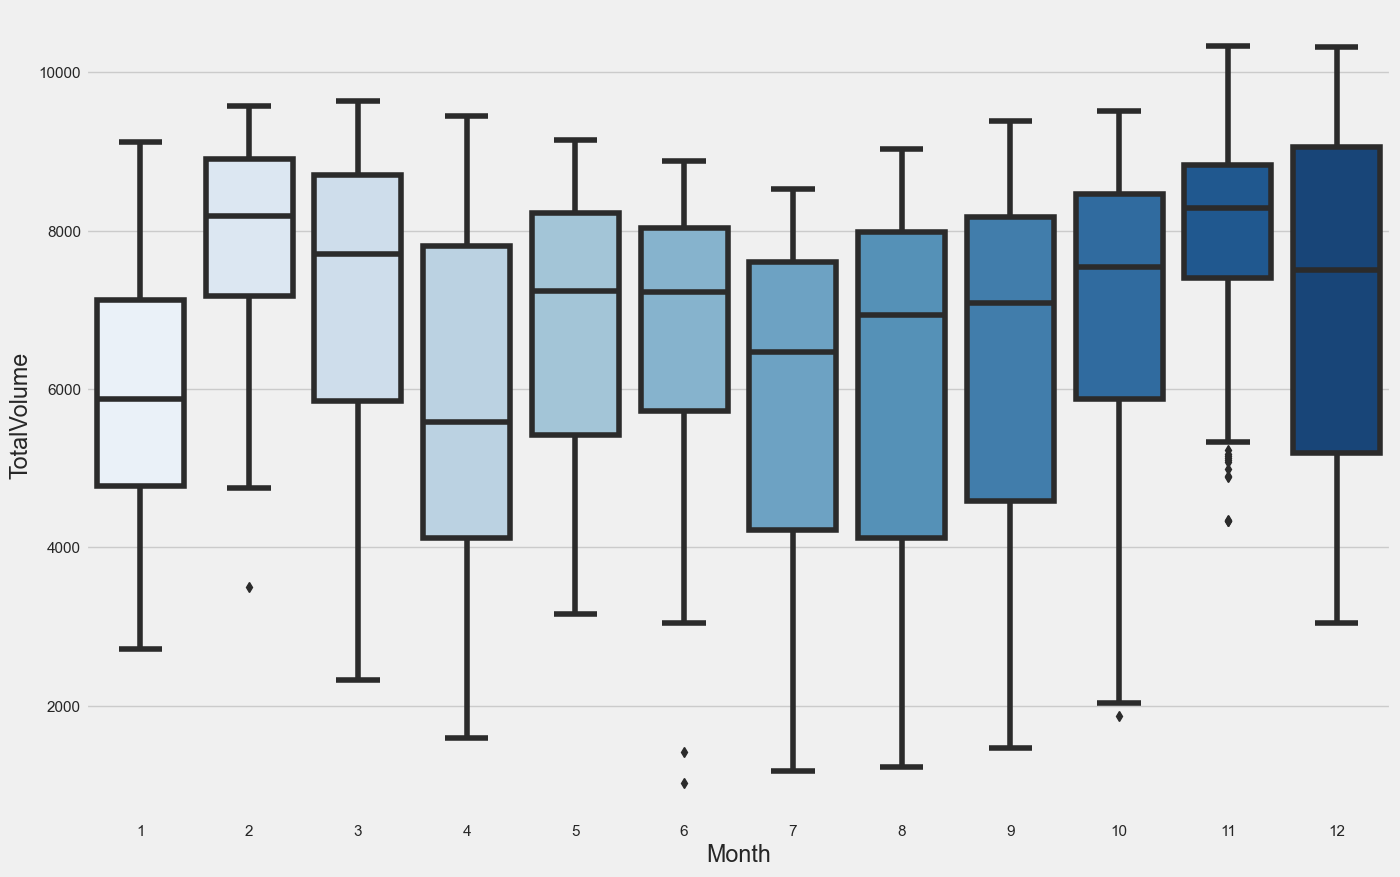

In [195]:
%%time
# Visualize monthly feature to target relationship
sns.boxplot(data=df_xgboost_charge_3_Car, x='Month', y='TotalVolume', palette='Blues')
ax.set_title('Car: Monthly Aggregated Total Volume')

Wall time: 90.5 ms


Text(0.5, 1.0, 'Truck: Monthly Aggregated Total Volume')

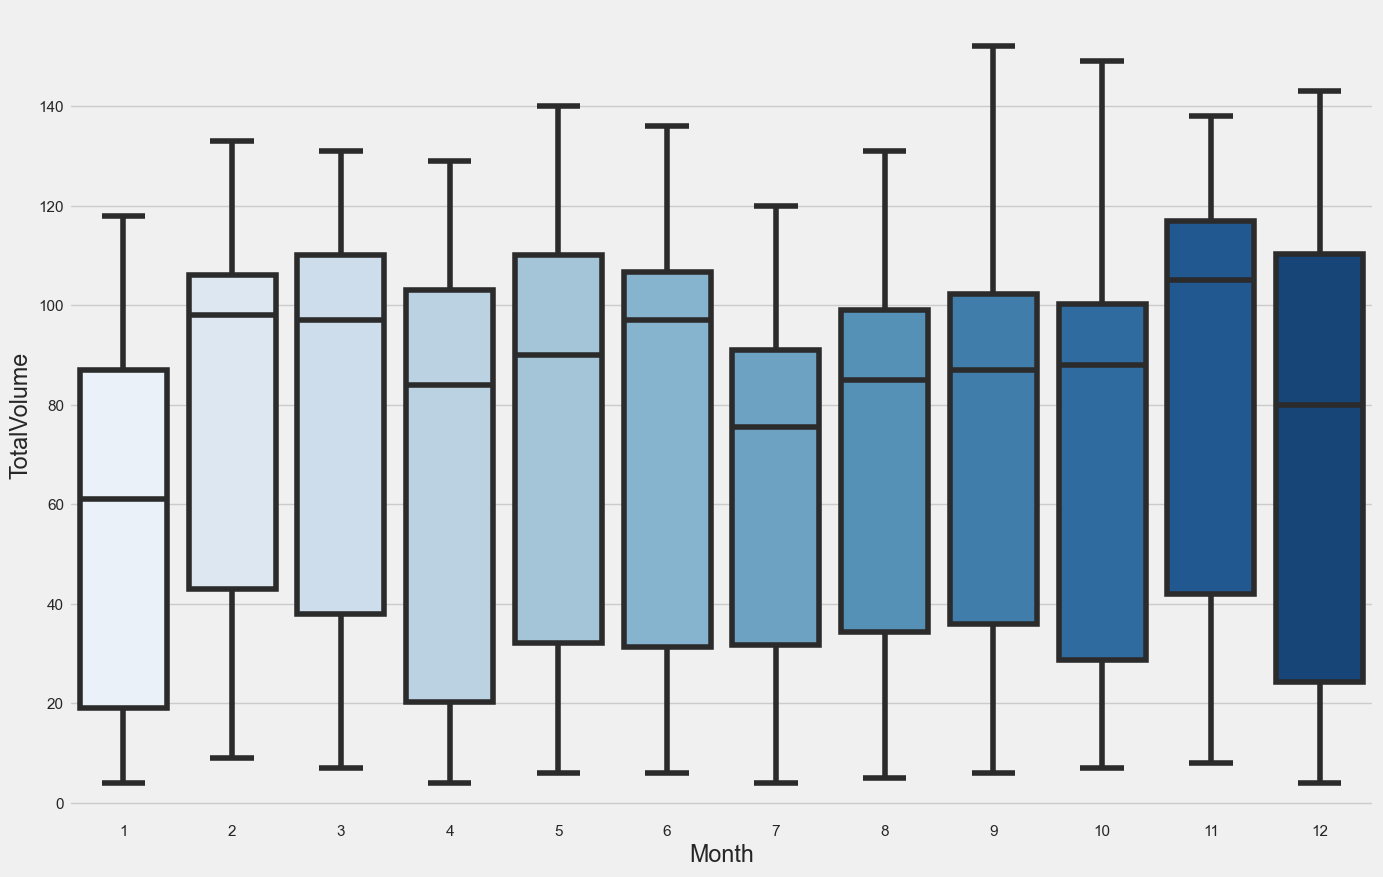

In [196]:
%%time
# Visualize monthly feature to target relationship
sns.boxplot(data=df_xgboost_charge_3_Truck, x='Month', y='TotalVolume', palette='Blues')
ax.set_title('Truck: Monthly Aggregated Total Volume')

<font color='green'><center><h2><u>Cars: Training & Testing Dataset</u></h2></center></font>

In [197]:
%%time
#Split train and test dataset for as a time series
training_df = df_xgboost_charge_3_Car.loc[df_xgboost_charge_3_Car.index < '01-01-2022']
testing_df = df_xgboost_charge_3_Car.loc[df_xgboost_charge_3_Car.index >= '01-01-2022']

Wall time: 1.99 ms


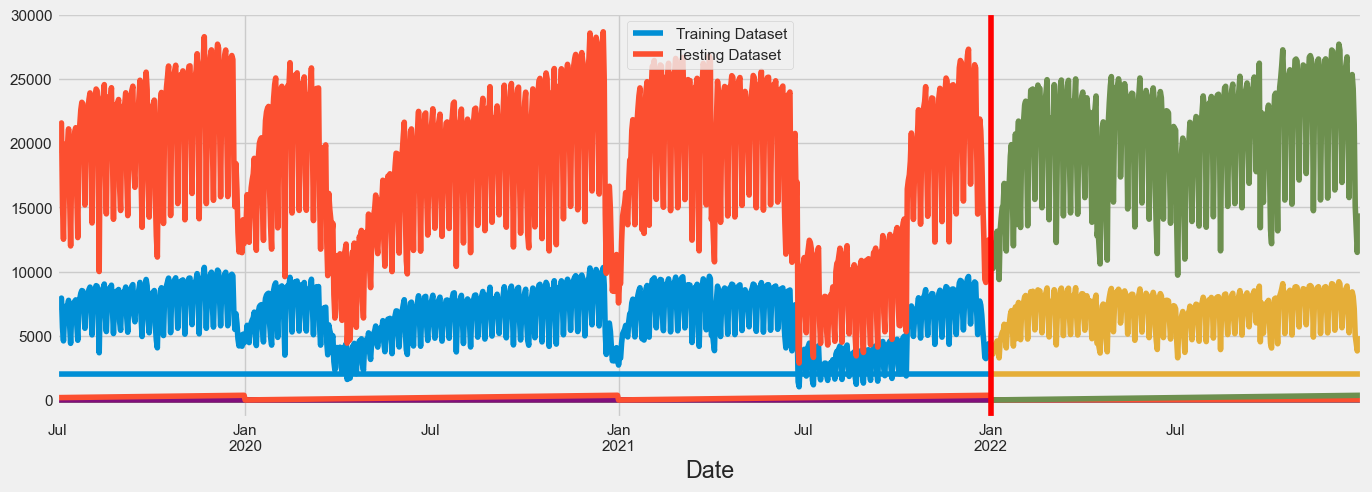

Wall time: 571 ms


In [198]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2022', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Cars: Add features to dataset</u></h2></center></font>

In [199]:
%%time
#Adding features to train and test dataset
training_df = xgb_feature_creation(training_df)
testing_df = xgb_feature_creation(testing_df)
XGB_COLUMN_FEATURES = ['TotalTollCharge','Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
XGB_COLUMN_TARGET = ['TotalVolume']

Wall time: 3.02 ms


<font color='green'><center><h2><u>Cars: Define feature & target columns for train & test dataset</u></h2></center></font>

In [200]:
%%time
X_train = training_df[XGB_COLUMN_FEATURES]
y_train = training_df[XGB_COLUMN_TARGET]

X_test = testing_df[XGB_COLUMN_FEATURES]
y_test = testing_df[XGB_COLUMN_TARGET]

Wall time: 4.96 ms


<font color='green'><center><h2><u>Cars: Model Creation</u></h2></center></font>

In [201]:
%%time
#Create the model
#regressor = xgb.XGBRegressor(n_estimators=10000, early_stopping_rounds=50)

regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=10000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 
regressor.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose=100
       )

[15:34:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:6915.27872	validation_1-rmse:7069.51052
[100]	validation_0-rmse:2556.60330	validation_1-rmse:2338.70079
[200]	validation_0-rmse:949.21758	validation_1-rmse:606.61286
[300]	validation_0-rmse:357.78783	validation_1-rmse:137.95076
[342]	validation_0-rmse:239.85032	validation_1-rmse:196.58836
Wall time: 259 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

<font color='green'><center><h2><u>Cars: Visualize Feature Importance</u></h2></center></font>

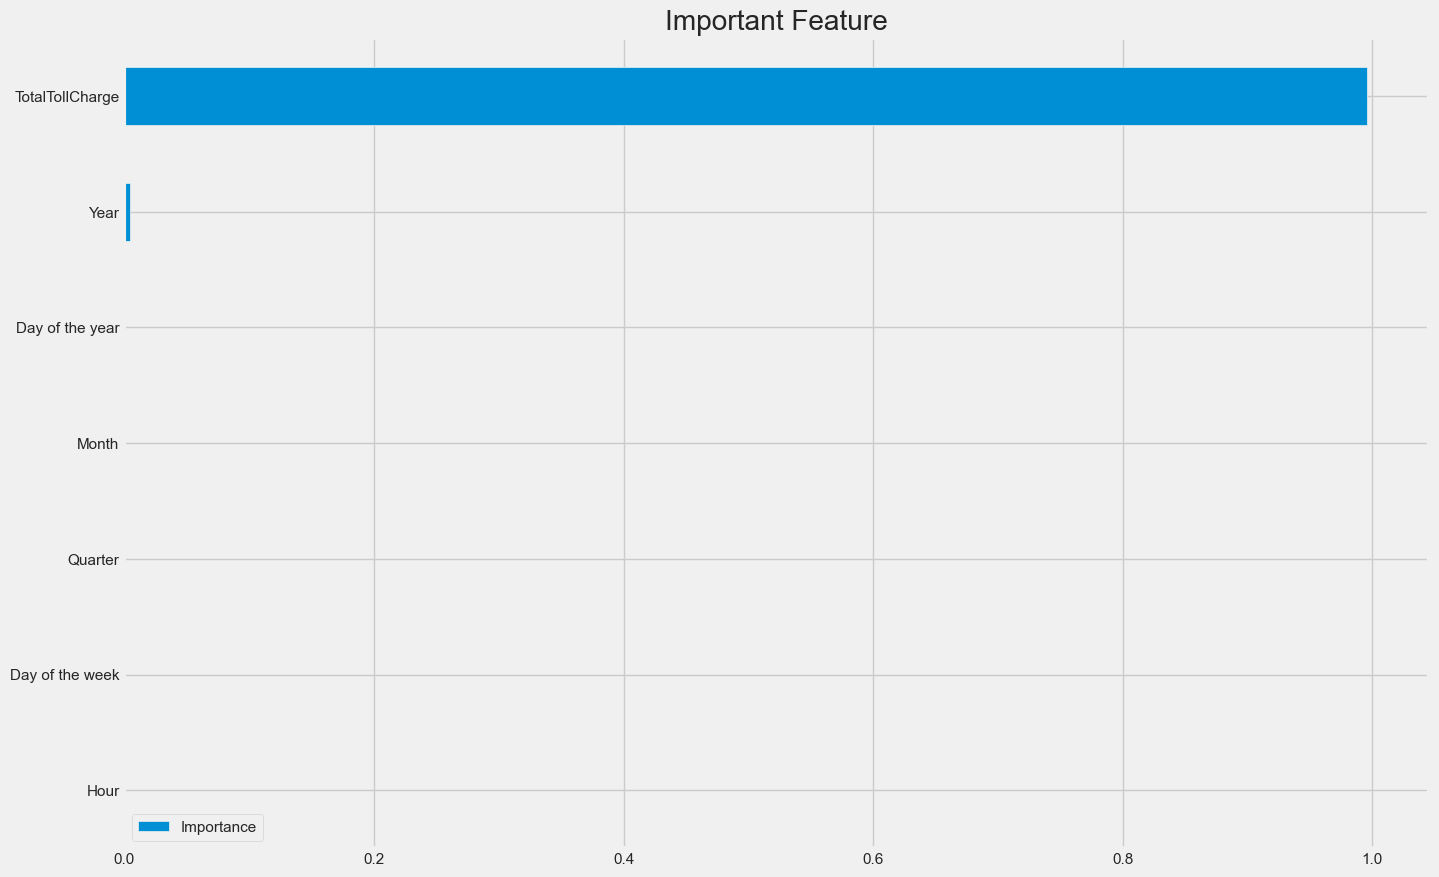

Wall time: 227 ms


In [202]:
%%time
fImportance = pd.DataFrame(data=regressor.feature_importances_,
                 index=regressor.feature_names_in_,
                 columns=['Importance'])
fImportance.sort_values('Importance').plot(kind='barh', title='Important Feature')
plt.show()

<font color='green'><center><h2><u>Cars: Predict test dataset</u></h2></center></font>

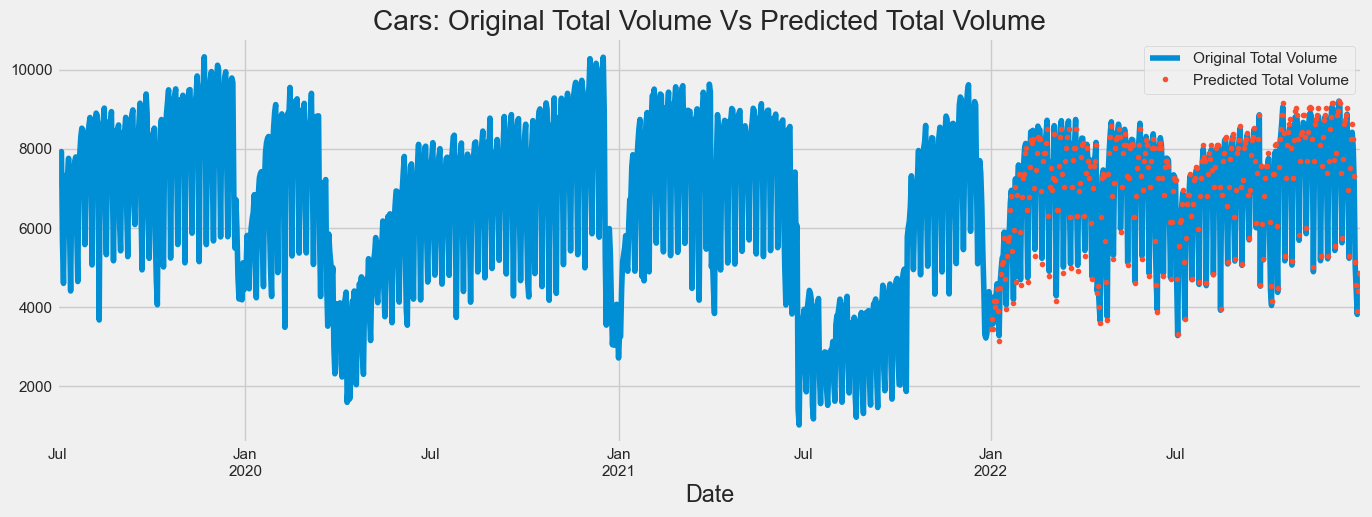

Wall time: 425 ms


In [203]:
%%time
#Forecast / Predict on test dataset
testing_df['PredictedTotalVolume'] = regressor.predict(X_test)
df_xgboost_charge_3_Car = df_xgboost_charge_3_Car.merge(testing_df['PredictedTotalVolume'], how='left', left_index = True, right_index = True)
ax = df_xgboost_charge_3_Car['TotalVolume'].plot(figsize=(15,5))
df_xgboost_charge_3_Car['PredictedTotalVolume'].plot(ax=ax, style='.')
plt.legend(['Original Total Volume', 'Predicted Total Volume'])
ax.set_title('Cars: Original Total Volume Vs Predicted Total Volume')
plt.show()

<font color='green'><center><h2><u>Cars: Evaluation Metrics</u></h2></center></font>

In [204]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedTotalVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 119.79
Wall time: 996 µs


<font color='green'><center><h2><u>Cars: Future Toll Revenue Prediction</u></h2></center></font>

<font color='green'><center><h2><u>Cars: Create required features</u></h2></center></font>

In [205]:
%%time
#Below is the feature creation created as a function
def xgb_feature_creation_2(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    df['Day of the month'] = df.index.day
    df['Week of the year'] = df.index.isocalendar().week
    return df

Wall time: 0 ns


<font color='green'><center><h2><u>Cars: Create required lag features</u></h2></center></font>

In [206]:
%%time
#Creating Lag features like for same day last year etc.
def xgb_include_lags(df):    
    target_dict_map = df['TotalVolume'].to_dict()
    df['lag 1 year'] = (df.index - pd.Timedelta('364 days')).map(target_dict_map)
    df['lag 2 year'] = (df.index - pd.Timedelta('728 days')).map(target_dict_map)
    df['lag 3 year'] = (df.index - pd.Timedelta('1092 days')).map(target_dict_map)
    return(df)

Wall time: 0 ns


In [207]:
%%time
#Train all of the data before doing future prediction
df_xgboost_charge_3_Car = xgb_feature_creation_2(df_xgboost_charge_3_Car)
df_xgboost_charge_3_Car = xgb_include_lags(df_xgboost_charge_3_Car)

XGB_FEATURES = ['TotalTollCharge', 'Day of the year', 'Hour', 'Day of the week', 'Quarter', 'Month','Year', 'Day of the month', 'lag 1 year','lag 2 year','lag 3 year']
XGB_TARGET = ['TotalVolume']

X_all = df_xgboost_charge_3_Car[XGB_FEATURES]
y_all = df_xgboost_charge_3_Car[XGB_TARGET]

#regressor = xgb.XGBRegressor(n_estimators=10000, early_stopping_rounds=50)

regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=10000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 
regressor.fit(X_all, y_all,
              eval_set=[(X_all, y_all)],
              verbose=100)

[15:34:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:6960.90871
[100]	validation_0-rmse:2572.37293
[200]	validation_0-rmse:958.25906
[300]	validation_0-rmse:363.29861
[400]	validation_0-rmse:146.32686
[500]	validation_0-rmse:71.11308
[600]	validation_0-rmse:47.85872
[700]	validation_0-rmse:40.55093
[800]	validation_0-rmse:37.43707
[900]	validation_0-rmse:35.28780
[1000]	validation_0-rmse:33.74043
[1100]	validation_0-rmse:32.27955
[1200]	validation_0-rmse:31.15182
[1300]	validation_0-rmse:30.14439
[1400]	validation_0-rmse:29.11881
[1500]	validation_0-rmse:28.23799
[1600]	validation_0-rmse:27.46751
[1700]	validation_0-rmse:26.86750
[1800]	validation_0-rmse:26.27951
[1900]	validation_0-rmse:25.54373
[2000]	validation_0-rmse:24.92359
[2100]	validation_0-rmse:24.30223
[2200]	validation_0-rmse:2

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [208]:
%%time
#Find recent / latest data and time of the given dataset
df_xgboost_charge_3_Car.index.max()

Wall time: 0 ns


Timestamp('2022-12-31 00:00:00')

In [209]:
%%time
#Create future dataframe
future = pd.date_range('2023-01-01', '2023-01-08')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df_xgboost_charge_3_Car['isFuture'] = False
Past_and_future_df = pd.concat([df_xgboost_charge_3_Car, future_df])
Past_and_future_df

Wall time: 2.42 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2019-07-01       7086.0         19273.92   0.0              0.0      3.0   
2019-07-02       7612.0         20704.64   0.0              1.0      3.0   
2019-07-03       7702.0         20949.44   0.0              2.0      3.0   
2019-07-04       7836.0         21313.92   0.0              3.0      3.0   
2019-07-05       7933.0         21577.76   0.0              4.0      3.0   
...                 ...              ...   ...              ...      ...   
2023-01-04          NaN              NaN   NaN              NaN      NaN   
2023-01-05          NaN              NaN   NaN              NaN      NaN   
2023-01-06          NaN              NaN   NaN              NaN      NaN   
2023-01-07          NaN              NaN   NaN              NaN      NaN   
2023-01-08          NaN              NaN   NaN              NaN      NaN   

            Month    Year  Day of the year  PredictedTotalVolume  \
2019-07-01    7.0  2019.0            182.0                   NaN   
2019-07-02    7.0  2019.0            183.0                   NaN   
2019-07-03    7.0  2019.0            184.0                   NaN   
2019-07-04    7.0  2019.0            185.0                   NaN   
2019-07-05    7.0  2019.0            186.0                   NaN   
...           ...     ...              ...                   ...   
2023-01-04    NaN     NaN              NaN                   NaN   
2023-01-05    NaN     NaN              NaN                   NaN   
2023-01-06    NaN     NaN              NaN                   NaN   
2023-01-07    NaN     NaN              NaN                   NaN   
2023-01-08    NaN     NaN              NaN                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2019-07-01               1.0                27         NaN         NaN   
2019-07-02               2.0                27         NaN         NaN   
2019-07-03               3.0                27         NaN         NaN   
2019-07-04               4.0                27         NaN         NaN   
2019-07-05               5.0                27         NaN         NaN   
...                      ...               ...         ...         ...   
2023-01-04               NaN              <NA>         NaN         NaN   
2023-01-05               NaN              <NA>         NaN         NaN   
2023-01-06               NaN              <NA>         NaN         NaN   
2023-01-07               NaN              <NA>         NaN         NaN   
2023-01-08               NaN              <NA>         NaN         NaN   

            lag 3 year  isFuture  
2019-07-01         NaN     False  
2019-07-02         NaN     False  
2019-07-03         NaN     False  
2019-07-04         NaN     False  
2019-07-05         NaN     False  
...                ...       ...  
2023-01-04         NaN      True  
2023-01-05         NaN      True  
2023-01-06         NaN      True  
2023-01-07         NaN      True  
2023-01-08         NaN      True  

[1288 rows x 15 columns]

In [210]:
%%time
#Pass past+future dataset to add features and lags
Past_and_future_df = xgb_feature_creation_2(Past_and_future_df)
Past_and_future_df = xgb_include_lags(Past_and_future_df)
Past_and_future_df

Wall time: 35.8 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2019-07-01       7086.0         19273.92     0                0        3   
2019-07-02       7612.0         20704.64     0                1        3   
2019-07-03       7702.0         20949.44     0                2        3   
2019-07-04       7836.0         21313.92     0                3        3   
2019-07-05       7933.0         21577.76     0                4        3   
...                 ...              ...   ...              ...      ...   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   
2023-01-06          NaN              NaN     0                4        1   
2023-01-07          NaN              NaN     0                5        1   
2023-01-08          NaN              NaN     0                6        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2019-07-01      7  2019              182                   NaN   
2019-07-02      7  2019              183                   NaN   
2019-07-03      7  2019              184                   NaN   
2019-07-04      7  2019              185                   NaN   
2019-07-05      7  2019              186                   NaN   
...           ...   ...              ...                   ...   
2023-01-04      1  2023                4                   NaN   
2023-01-05      1  2023                5                   NaN   
2023-01-06      1  2023                6                   NaN   
2023-01-07      1  2023                7                   NaN   
2023-01-08      1  2023                8                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2019-07-01                 1                27         NaN         NaN   
2019-07-02                 2                27         NaN         NaN   
2019-07-03                 3                27         NaN         NaN   
2019-07-04                 4                27         NaN         NaN   
2019-07-05                 5                27         NaN         NaN   
...                      ...               ...         ...         ...   
2023-01-04                 4                 1      4126.0      5320.0   
2023-01-05                 5                 1      4304.0      5505.0   
2023-01-06                 6                 1      4593.0      5809.0   
2023-01-07                 7                 1      4014.0      5135.0   
2023-01-08                 8                 1      3281.0      4910.0   

            lag 3 year  isFuture  
2019-07-01         NaN     False  
2019-07-02         NaN     False  
2019-07-03         NaN     False  
2019-07-04         NaN     False  
2019-07-05         NaN     False  
...                ...       ...  
2023-01-04      6238.0      True  
2023-01-05      6402.0      True  
2023-01-06      6844.0      True  
2023-01-07      5239.0      True  
2023-01-08      4240.0      True  

[1288 rows x 15 columns]

In [211]:
%%time
#Split and dislay only future dataset
future_with_features = Past_and_future_df.query('isFuture').copy()
future_with_features.head()

Wall time: 3.99 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2023-01-01          NaN              NaN     0                6        1   
2023-01-02          NaN              NaN     0                0        1   
2023-01-03          NaN              NaN     0                1        1   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2023-01-01      1  2023                1                   NaN   
2023-01-02      1  2023                2                   NaN   
2023-01-03      1  2023                3                   NaN   
2023-01-04      1  2023                4                   NaN   
2023-01-05      1  2023                5                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2023-01-01                 1                52      3832.0      3259.0   
2023-01-02                 2                 1      3580.0      4439.0   
2023-01-03                 3                 1      4266.0      5152.0   
2023-01-04                 4                 1      4126.0      5320.0   
2023-01-05                 5                 1      4304.0      5505.0   

            lag 3 year  isFuture  
2023-01-01      4467.0      True  
2023-01-02      5606.0      True  
2023-01-03      6016.0      True  
2023-01-04      6238.0      True  
2023-01-05      6402.0      True

In [212]:
%%time
#Predict the future
future_with_features['PredictedTotalVolume'] = regressor.predict(future_with_features[XGB_FEATURES])

Wall time: 6.98 ms


In [213]:
%%time
future_with_features.head()

Wall time: 0 ns


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2023-01-01          NaN              NaN     0                6        1   
2023-01-02          NaN              NaN     0                0        1   
2023-01-03          NaN              NaN     0                1        1   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2023-01-01      1  2023                1           1049.117920   
2023-01-02      1  2023                2           1065.208374   
2023-01-03      1  2023                3           1086.484131   
2023-01-04      1  2023                4           1080.288940   
2023-01-05      1  2023                5           1080.175049   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2023-01-01                 1                52      3832.0      3259.0   
2023-01-02                 2                 1      3580.0      4439.0   
2023-01-03                 3                 1      4266.0      5152.0   
2023-01-04                 4                 1      4126.0      5320.0   
2023-01-05                 5                 1      4304.0      5505.0   

            lag 3 year  isFuture  
2023-01-01      4467.0      True  
2023-01-02      5606.0      True  
2023-01-03      6016.0      True  
2023-01-04      6238.0      True  
2023-01-05      6402.0      True

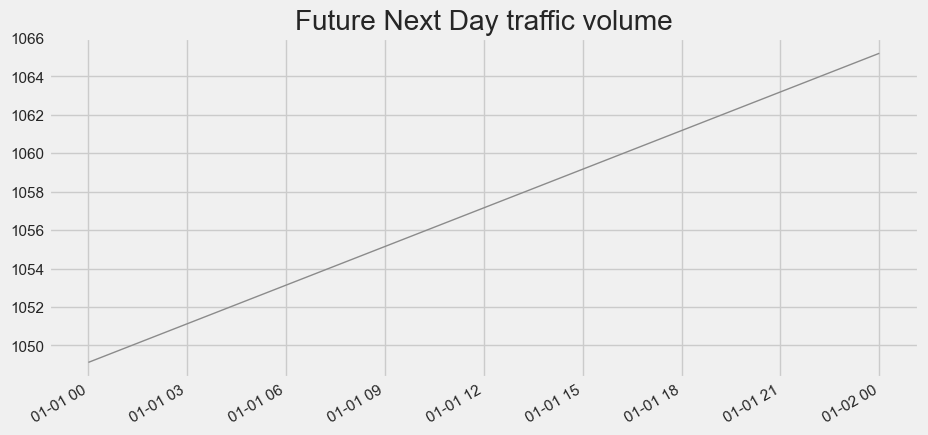

Wall time: 274 ms


In [214]:
%%time
#Plot the future: Next Day
future_with_features['PredictedTotalVolume'].iloc[0:2].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next Day traffic volume')
plt.show()

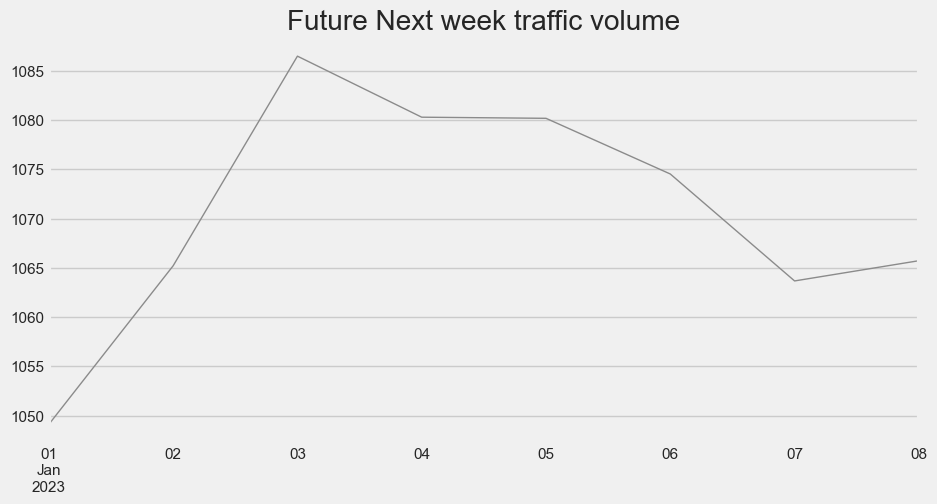

Wall time: 160 ms


In [215]:
%%time
#Plot the future: Next week
future_with_features['PredictedTotalVolume'].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next week traffic volume')
plt.show()

In [216]:
%%time
future_with_features['PredictedTotalVolume']

Wall time: 0 ns


2023-01-01    1049.117920
2023-01-02    1065.208374
2023-01-03    1086.484131
2023-01-04    1080.288940
2023-01-05    1080.175049
2023-01-06    1074.524170
2023-01-07    1063.670532
2023-01-08    1065.723389
Name: PredictedTotalVolume, dtype: float32

In [217]:
%%time
car_toll_charge = df_charge.copy()
car_toll_charge_1 = car_toll_charge[ (car_toll_charge["TollPointID"] == "SJY") & (car_toll_charge["Month"] == 1) 
                & (car_toll_charge["Year"] == 2023) ]
print("Future toll revenue of car:")
future_with_features['PredictedTotalVolume'] * float( car_toll_charge_1["Cars Charge"].str.slice(1, 5) )

Future toll revenue of car:
Wall time: 1.99 ms


2023-01-01    3220.791992
2023-01-02    3270.189697
2023-01-03    3335.506104
2023-01-04    3316.487061
2023-01-05    3316.137207
2023-01-06    3298.789062
2023-01-07    3265.468506
2023-01-08    3271.770752
Name: PredictedTotalVolume, dtype: float32

<font color='green'><center><h2><u>Trucks: Training & Testing Dataset</u></h2></center></font>

In [218]:
%%time
#Split train and test dataset for as a time series
training_df = df_xgboost_charge_3_Truck.loc[df_xgboost_charge_3_Truck.index < '01-01-2022']
testing_df = df_xgboost_charge_3_Truck.loc[df_xgboost_charge_3_Truck.index >= '01-01-2022']

Wall time: 0 ns


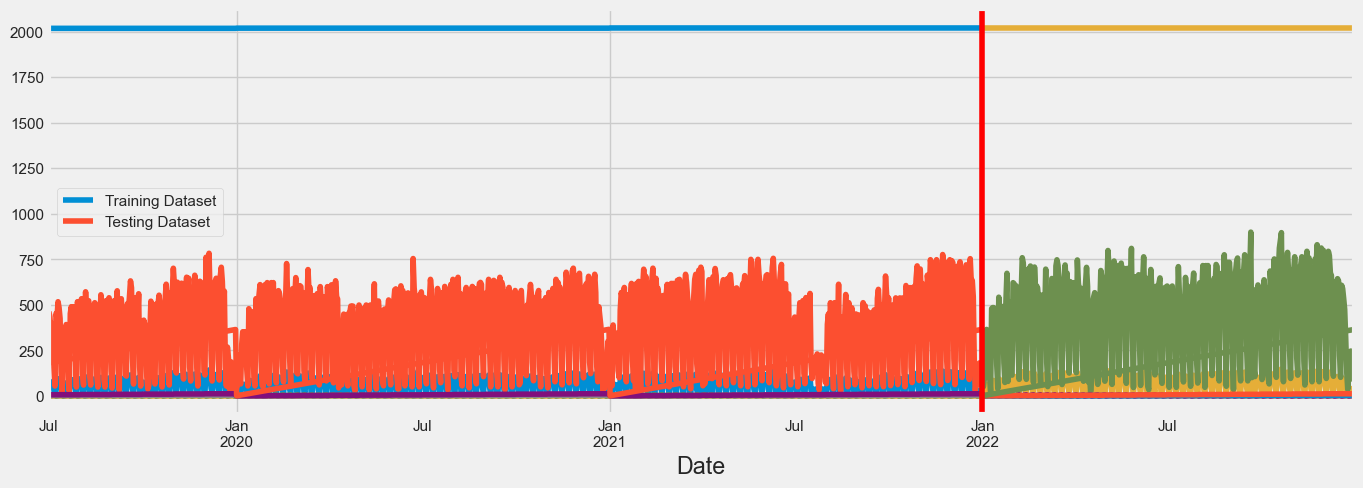

Wall time: 484 ms


In [219]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2022', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Trucks: Add features to dataset</u></h2></center></font>

In [220]:
%%time
#Adding features to train and test dataset
training_df = xgb_feature_creation(training_df)
testing_df = xgb_feature_creation(testing_df)
XGB_COLUMN_FEATURES = ['TotalTollCharge','Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
XGB_COLUMN_TARGET = ['TotalVolume']

Wall time: 2.99 ms


<font color='green'><center><h2><u>Trucks: Define feature & target columns for train & test dataset</u></h2></center></font>

In [221]:
%%time
X_train = training_df[XGB_COLUMN_FEATURES]
y_train = training_df[XGB_COLUMN_TARGET]

X_test = testing_df[XGB_COLUMN_FEATURES]
y_test = testing_df[XGB_COLUMN_TARGET]

Wall time: 2.99 ms


<font color='green'><center><h2><u>Trucks: Model Creation</u></h2></center></font>

In [222]:
%%time
#Create the model
#regressor = xgb.XGBRegressor(n_estimators=10000, early_stopping_rounds=50)

regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=10000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 
regressor.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose=100
       )

[15:35:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:79.87898	validation_1-rmse:87.96553
[100]	validation_0-rmse:29.59366	validation_1-rmse:31.05772
[200]	validation_0-rmse:11.01379	validation_1-rmse:9.88355
[300]	validation_0-rmse:4.16555	validation_1-rmse:3.20513
[385]	validation_0-rmse:1.89837	validation_1-rmse:3.19054
Wall time: 278 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

<font color='green'><center><h2><u>Trucks: Visualize Feature Importance</u></h2></center></font>

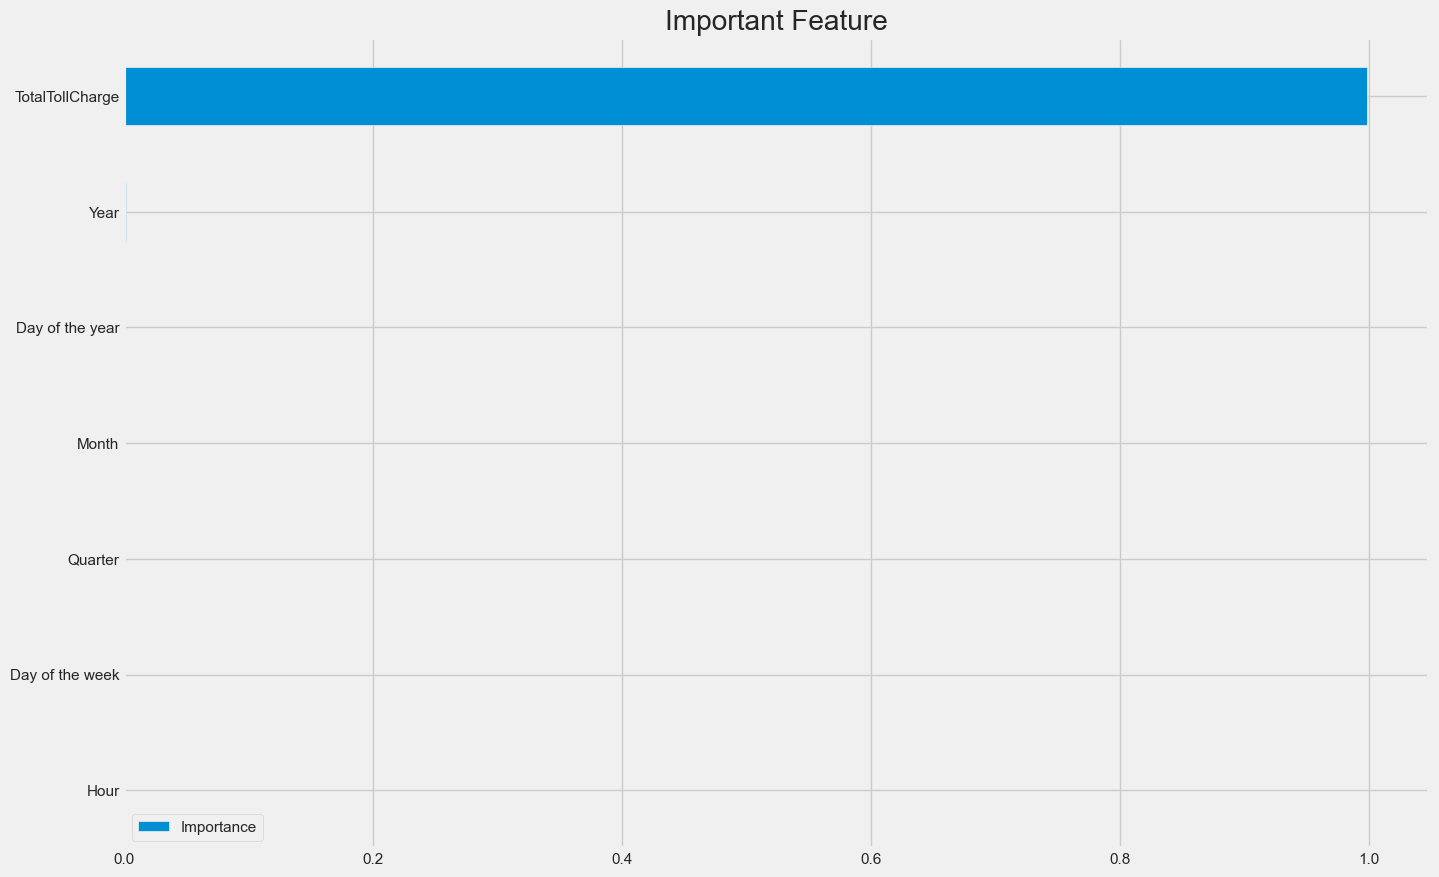

Wall time: 202 ms


In [223]:
%%time
fImportance = pd.DataFrame(data=regressor.feature_importances_,
                 index=regressor.feature_names_in_,
                 columns=['Importance'])
fImportance.sort_values('Importance').plot(kind='barh', title='Important Feature')
plt.show()

<font color='green'><center><h2><u>Trucks: Predict test dataset</u></h2></center></font>

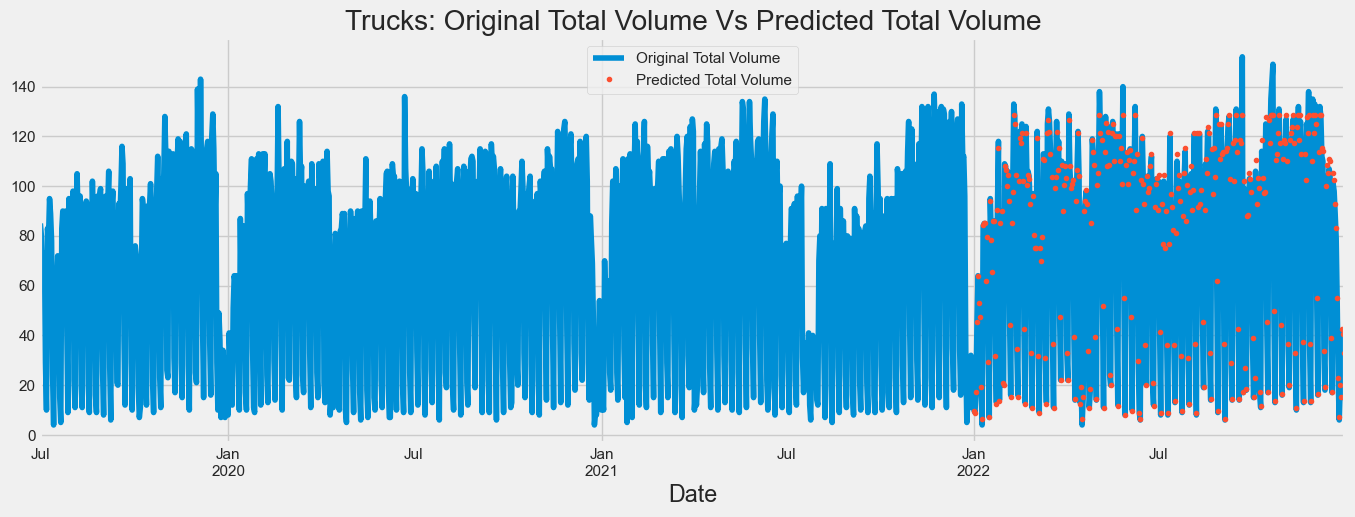

Wall time: 703 ms


In [224]:
%%time
#Forecast / Predict on test dataset
testing_df['PredictedTotalVolume'] = regressor.predict(X_test)
df_xgboost_charge_3_Truck = df_xgboost_charge_3_Truck.merge(testing_df['PredictedTotalVolume'], how='left', left_index = True, right_index = True)
ax = df_xgboost_charge_3_Truck['TotalVolume'].plot(figsize=(15,5))
df_xgboost_charge_3_Truck['PredictedTotalVolume'].plot(ax=ax, style='.')
plt.legend(['Original Total Volume', 'Predicted Total Volume'])
ax.set_title('Trucks: Original Total Volume Vs Predicted Total Volume')
plt.show()

<font color='green'><center><h2><u>Trucks: Evaluation Metrics</u></h2></center></font>

In [225]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedTotalVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 1.76
Wall time: 998 µs


<font color='green'><center><h2><u>Trucks: Future Toll Revenue Prediction</u></h2></center></font>

In [226]:
%%time
#Train all of the data before doing future prediction
df_xgboost_charge_3_Truck = xgb_feature_creation_2(df_xgboost_charge_3_Truck)
df_xgboost_charge_3_Truck = xgb_include_lags(df_xgboost_charge_3_Truck)

XGB_FEATURES = ['TotalTollCharge', 'Day of the year', 'Hour', 'Day of the week', 'Quarter', 'Month','Year', 'Day of the month', 'lag 1 year','lag 2 year','lag 3 year']
XGB_TARGET = ['TotalVolume']

X_all = df_xgboost_charge_3_Truck[XGB_FEATURES]
y_all = df_xgboost_charge_3_Truck[XGB_TARGET]

#regressor = xgb.XGBRegressor(n_estimators=10000, early_stopping_rounds=50)

regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=10000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 
regressor.fit(X_all, y_all,
              eval_set=[(X_all, y_all)],
              verbose=100)

[15:35:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:82.26722
[100]	validation_0-rmse:30.45676
[200]	validation_0-rmse:11.42979
[300]	validation_0-rmse:4.49227
[400]	validation_0-rmse:1.95149
[500]	validation_0-rmse:1.03380
[600]	validation_0-rmse:0.70053
[700]	validation_0-rmse:0.56590
[800]	validation_0-rmse:0.50390
[900]	validation_0-rmse:0.47037
[1000]	validation_0-rmse:0.44785
[1100]	validation_0-rmse:0.42574
[1200]	validation_0-rmse:0.40516
[1300]	validation_0-rmse:0.38277
[1400]	validation_0-rmse:0.36505
[1500]	validation_0-rmse:0.35081
[1600]	validation_0-rmse:0.33842
[1700]	validation_0-rmse:0.32610
[1800]	validation_0-rmse:0.31400
[1900]	validation_0-rmse:0.30395
[2000]	validation_0-rmse:0.29695
[2100]	validation_0-rmse:0.28886
[2200]	validation_0-rmse:0.28257
[2300]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [227]:
%%time
#Create future dataframe
future = pd.date_range('2023-01-01', '2023-01-08')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df_xgboost_charge_3_Car['isFuture'] = False
Past_and_future_df = pd.concat([df_xgboost_charge_3_Car, future_df])
Past_and_future_df

Wall time: 3.99 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2019-07-01       7086.0         19273.92   0.0              0.0      3.0   
2019-07-02       7612.0         20704.64   0.0              1.0      3.0   
2019-07-03       7702.0         20949.44   0.0              2.0      3.0   
2019-07-04       7836.0         21313.92   0.0              3.0      3.0   
2019-07-05       7933.0         21577.76   0.0              4.0      3.0   
...                 ...              ...   ...              ...      ...   
2023-01-04          NaN              NaN   NaN              NaN      NaN   
2023-01-05          NaN              NaN   NaN              NaN      NaN   
2023-01-06          NaN              NaN   NaN              NaN      NaN   
2023-01-07          NaN              NaN   NaN              NaN      NaN   
2023-01-08          NaN              NaN   NaN              NaN      NaN   

            Month    Year  Day of the year  PredictedTotalVolume  \
2019-07-01    7.0  2019.0            182.0                   NaN   
2019-07-02    7.0  2019.0            183.0                   NaN   
2019-07-03    7.0  2019.0            184.0                   NaN   
2019-07-04    7.0  2019.0            185.0                   NaN   
2019-07-05    7.0  2019.0            186.0                   NaN   
...           ...     ...              ...                   ...   
2023-01-04    NaN     NaN              NaN                   NaN   
2023-01-05    NaN     NaN              NaN                   NaN   
2023-01-06    NaN     NaN              NaN                   NaN   
2023-01-07    NaN     NaN              NaN                   NaN   
2023-01-08    NaN     NaN              NaN                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2019-07-01               1.0                27         NaN         NaN   
2019-07-02               2.0                27         NaN         NaN   
2019-07-03               3.0                27         NaN         NaN   
2019-07-04               4.0                27         NaN         NaN   
2019-07-05               5.0                27         NaN         NaN   
...                      ...               ...         ...         ...   
2023-01-04               NaN              <NA>         NaN         NaN   
2023-01-05               NaN              <NA>         NaN         NaN   
2023-01-06               NaN              <NA>         NaN         NaN   
2023-01-07               NaN              <NA>         NaN         NaN   
2023-01-08               NaN              <NA>         NaN         NaN   

            lag 3 year  isFuture  
2019-07-01         NaN     False  
2019-07-02         NaN     False  
2019-07-03         NaN     False  
2019-07-04         NaN     False  
2019-07-05         NaN     False  
...                ...       ...  
2023-01-04         NaN      True  
2023-01-05         NaN      True  
2023-01-06         NaN      True  
2023-01-07         NaN      True  
2023-01-08         NaN      True  

[1288 rows x 15 columns]

In [228]:
%%time
#Pass past+future dataset to add features and lags
Past_and_future_df = xgb_feature_creation_2(Past_and_future_df)
Past_and_future_df = xgb_include_lags(Past_and_future_df)
Past_and_future_df

Wall time: 39.3 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2019-07-01       7086.0         19273.92     0                0        3   
2019-07-02       7612.0         20704.64     0                1        3   
2019-07-03       7702.0         20949.44     0                2        3   
2019-07-04       7836.0         21313.92     0                3        3   
2019-07-05       7933.0         21577.76     0                4        3   
...                 ...              ...   ...              ...      ...   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   
2023-01-06          NaN              NaN     0                4        1   
2023-01-07          NaN              NaN     0                5        1   
2023-01-08          NaN              NaN     0                6        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2019-07-01      7  2019              182                   NaN   
2019-07-02      7  2019              183                   NaN   
2019-07-03      7  2019              184                   NaN   
2019-07-04      7  2019              185                   NaN   
2019-07-05      7  2019              186                   NaN   
...           ...   ...              ...                   ...   
2023-01-04      1  2023                4                   NaN   
2023-01-05      1  2023                5                   NaN   
2023-01-06      1  2023                6                   NaN   
2023-01-07      1  2023                7                   NaN   
2023-01-08      1  2023                8                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2019-07-01                 1                27         NaN         NaN   
2019-07-02                 2                27         NaN         NaN   
2019-07-03                 3                27         NaN         NaN   
2019-07-04                 4                27         NaN         NaN   
2019-07-05                 5                27         NaN         NaN   
...                      ...               ...         ...         ...   
2023-01-04                 4                 1      4126.0      5320.0   
2023-01-05                 5                 1      4304.0      5505.0   
2023-01-06                 6                 1      4593.0      5809.0   
2023-01-07                 7                 1      4014.0      5135.0   
2023-01-08                 8                 1      3281.0      4910.0   

            lag 3 year  isFuture  
2019-07-01         NaN     False  
2019-07-02         NaN     False  
2019-07-03         NaN     False  
2019-07-04         NaN     False  
2019-07-05         NaN     False  
...                ...       ...  
2023-01-04      6238.0      True  
2023-01-05      6402.0      True  
2023-01-06      6844.0      True  
2023-01-07      5239.0      True  
2023-01-08      4240.0      True  

[1288 rows x 15 columns]

In [229]:
%%time
#Split and dislay only future dataset
future_with_features = Past_and_future_df.query('isFuture').copy()
future_with_features.head()

Wall time: 3.98 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2023-01-01          NaN              NaN     0                6        1   
2023-01-02          NaN              NaN     0                0        1   
2023-01-03          NaN              NaN     0                1        1   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2023-01-01      1  2023                1                   NaN   
2023-01-02      1  2023                2                   NaN   
2023-01-03      1  2023                3                   NaN   
2023-01-04      1  2023                4                   NaN   
2023-01-05      1  2023                5                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2023-01-01                 1                52      3832.0      3259.0   
2023-01-02                 2                 1      3580.0      4439.0   
2023-01-03                 3                 1      4266.0      5152.0   
2023-01-04                 4                 1      4126.0      5320.0   
2023-01-05                 5                 1      4304.0      5505.0   

            lag 3 year  isFuture  
2023-01-01      4467.0      True  
2023-01-02      5606.0      True  
2023-01-03      6016.0      True  
2023-01-04      6238.0      True  
2023-01-05      6402.0      True

In [230]:
%%time
#Predict the future
future_with_features['PredictedTotalVolume'] = regressor.predict(future_with_features[XGB_FEATURES])

Wall time: 17.4 ms


In [231]:
%%time
future_with_features.head()

Wall time: 0 ns


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2023-01-01          NaN              NaN     0                6        1   
2023-01-02          NaN              NaN     0                0        1   
2023-01-03          NaN              NaN     0                1        1   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2023-01-01      1  2023                1              4.584622   
2023-01-02      1  2023                2              4.668670   
2023-01-03      1  2023                3              4.956406   
2023-01-04      1  2023                4              4.929994   
2023-01-05      1  2023                5              4.710446   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2023-01-01                 1                52      3832.0      3259.0   
2023-01-02                 2                 1      3580.0      4439.0   
2023-01-03                 3                 1      4266.0      5152.0   
2023-01-04                 4                 1      4126.0      5320.0   
2023-01-05                 5                 1      4304.0      5505.0   

            lag 3 year  isFuture  
2023-01-01      4467.0      True  
2023-01-02      5606.0      True  
2023-01-03      6016.0      True  
2023-01-04      6238.0      True  
2023-01-05      6402.0      True

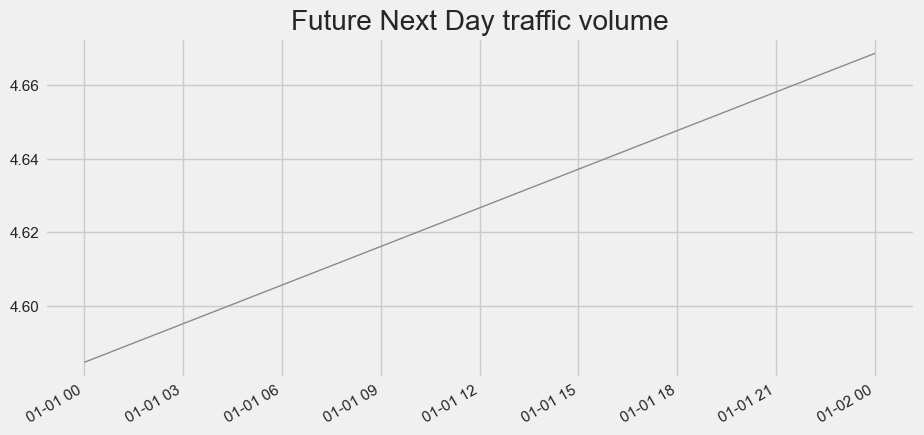

Wall time: 329 ms


In [232]:
%%time
#Plot the future: Next Day
future_with_features['PredictedTotalVolume'].iloc[0:2].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next Day traffic volume')
plt.show()

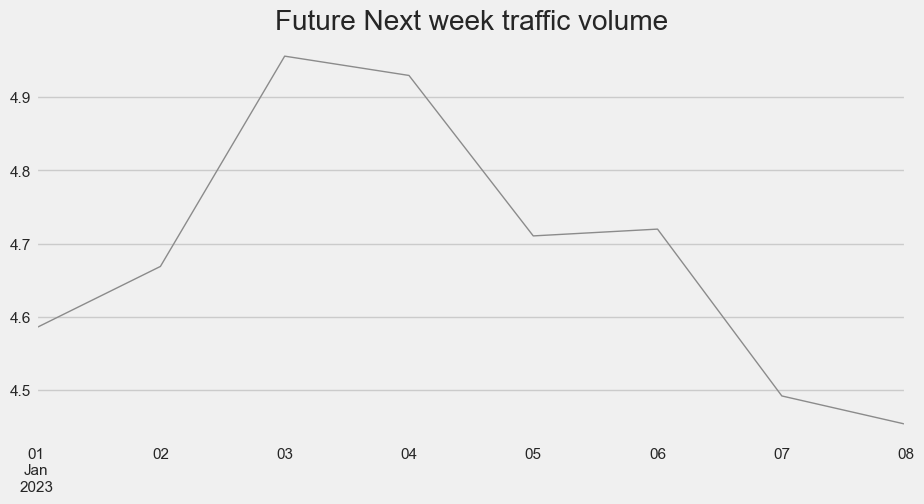

Wall time: 195 ms


In [233]:
%%time
#Plot the future: Next week
future_with_features['PredictedTotalVolume'].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next week traffic volume')
plt.show()

In [234]:
%%time
future_with_features['PredictedTotalVolume']

Wall time: 0 ns


2023-01-01    4.584622
2023-01-02    4.668670
2023-01-03    4.956406
2023-01-04    4.929994
2023-01-05    4.710446
2023-01-06    4.719745
2023-01-07    4.491480
2023-01-08    4.452641
Name: PredictedTotalVolume, dtype: float32

In [235]:
%%time
truck_toll_charge = df_charge.copy()
truck_toll_charge_1 = truck_toll_charge[ (truck_toll_charge["TollPointID"] == "SJY") & (truck_toll_charge["Month"] == 1) 
                & (truck_toll_charge["Year"] == 2023) ]
print("Future toll revenue of truck:")
future_with_features['PredictedTotalVolume'] * float( car_toll_charge_1["Trucks Charge"].str.slice(1, 5) )

Future toll revenue of truck:
Wall time: 1.99 ms


2023-01-01    28.103735
2023-01-02    28.618948
2023-01-03    30.382767
2023-01-04    30.220865
2023-01-05    28.875036
2023-01-06    28.932035
2023-01-07    27.532772
2023-01-08    27.294689
Name: PredictedTotalVolume, dtype: float32

<font color='blue'><center><h2>Model 4: Linear Regression</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [281]:
%%time
#Importing Libraries Required
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
colour_palette = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.model_selection import TimeSeriesSplit

Wall time: 1.03 ms


<font color='green'><center><h2><u>Cars: Read Data & Data Pre-Processing</u></h2></center></font>

In [282]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as SJY
df_lreg_charge = df_inp_data_charge4.copy()
df_lreg_charge['Date'] = pd.to_datetime(df_lreg_charge['Date'])
df_lreg_charge_1_Car = df_lreg_charge[ (df_lreg_charge['TollPointID_x'] == "SJY") & 
                                       (df_lreg_charge['VehicleClass'] == "Car") ]

Wall time: 246 ms


In [283]:
%%time
#Group by TotalVolume & TotalCharges
df_lreg_charge_2_Car = df_lreg_charge_1_Car.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_lreg_charge_2_Car

Wall time: 13 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


TotalVolume  TotalTollCharge
Date                                    
2019-07-01         7086         19273.92
2019-07-02         7612         20704.64
2019-07-03         7702         20949.44
2019-07-04         7836         21313.92
2019-07-05         7933         21577.76
...                 ...              ...
2022-12-27         4306         12961.06
2022-12-28         4757         14318.57
2022-12-29         4699         14143.99
2022-12-30         4761         14330.61
2022-12-31         3811         11471.11

[1280 rows x 2 columns]

<font color='green'><center><h2><u>Cars: Input Data Visualization</u></h2></center></font>

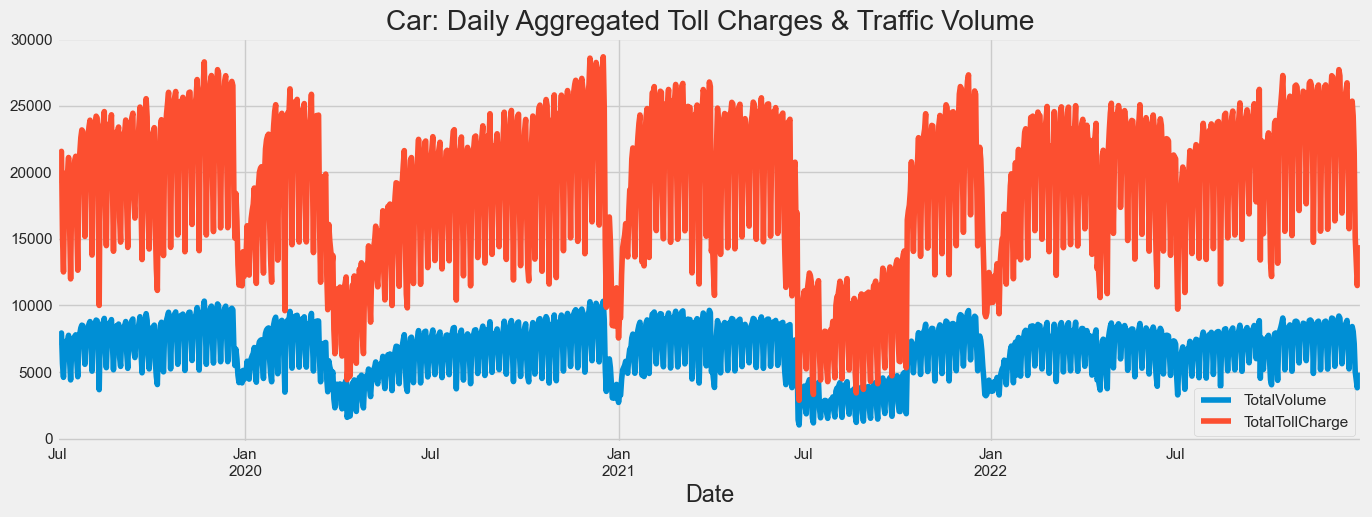

Wall time: 401 ms


In [284]:
%%time
#Plot daily aggregated toll charges and traffic volume line graph for the given dataset
df_lreg_charge_2_Car.plot(figsize=(15,5), title='Car: Daily Aggregated Toll Charges & Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Cars: Create required features</u></h2></center></font>

In [285]:
%%time
#Below is the feature creation created as a function
def lreg_feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [286]:
%%time
#Diplay features
df_lreg_charge_3_Car = lreg_feature_creation(df_lreg_charge_2_Car)
df_lreg_charge_3_Car

Wall time: 4.99 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
Date                                                                       
2019-07-01         7086         19273.92     0                0        3   
2019-07-02         7612         20704.64     0                1        3   
2019-07-03         7702         20949.44     0                2        3   
2019-07-04         7836         21313.92     0                3        3   
2019-07-05         7933         21577.76     0                4        3   
...                 ...              ...   ...              ...      ...   
2022-12-27         4306         12961.06     0                1        4   
2022-12-28         4757         14318.57     0                2        4   
2022-12-29         4699         14143.99     0                3        4   
2022-12-30         4761         14330.61     0                4        4   
2022-12-31         3811         11471.11     0                5        4   

            Month  Year  Day of the year  
Date                                      
2019-07-01      7  2019              182  
2019-07-02      7  2019              183  
2019-07-03      7  2019              184  
2019-07-04      7  2019              185  
2019-07-05      7  2019              186  
...           ...   ...              ...  
2022-12-27     12  2022              361  
2022-12-28     12  2022              362  
2022-12-29     12  2022              363  
2022-12-30     12  2022              364  
2022-12-31     12  2022              365  

[1280 rows x 8 columns]

<font color='green'><center><h2><u>Cars: Training & Testing Dataset</u></h2></center></font>

In [287]:
%%time
#Split train and test dataset for as a time series
training_df = df_lreg_charge_3_Car.loc[df_lreg_charge_3_Car.index < '01-01-2022']
testing_df = df_lreg_charge_3_Car.loc[df_lreg_charge_3_Car.index >= '01-01-2022']

Wall time: 1.99 ms


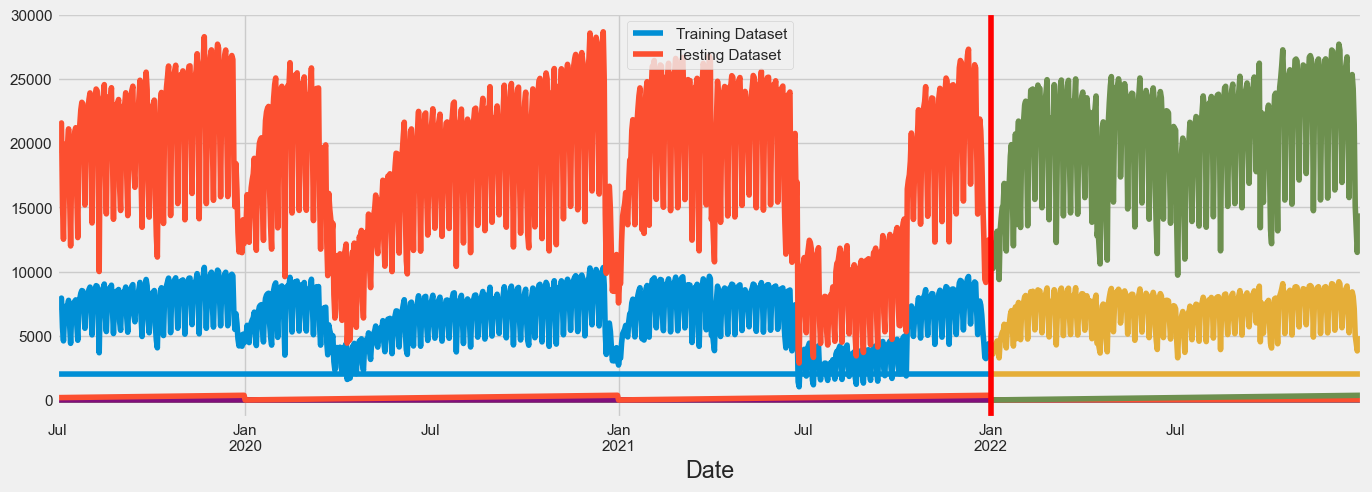

Wall time: 560 ms


In [288]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2022', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Cars: Add features to dataset</u></h2></center></font>

In [289]:
%%time
#Adding features to train and test dataset
training_df = lreg_feature_creation(training_df)
testing_df = lreg_feature_creation(testing_df)
LREG_COLUMN_FEATURES = ['TotalTollCharge','Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
LREG_COLUMN_TARGET = ['TotalVolume']

Wall time: 5.02 ms


<font color='green'><center><h2><u>Cars: Define feature & target columns for train & test dataset</u></h2></center></font>

In [290]:
%%time
X_train = training_df[LREG_COLUMN_FEATURES]
y_train = training_df[LREG_COLUMN_TARGET]

X_test = testing_df[LREG_COLUMN_FEATURES]
y_test = testing_df[LREG_COLUMN_TARGET]

Wall time: 4.02 ms


<font color='green'><center><h2><u>Cars: Model Creation</u></h2></center></font>

In [291]:
%%time
#Create the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

Wall time: 4.99 ms


LinearRegression()

<font color='green'><center><h2><u>Cars: Predict test dataset</u></h2></center></font>

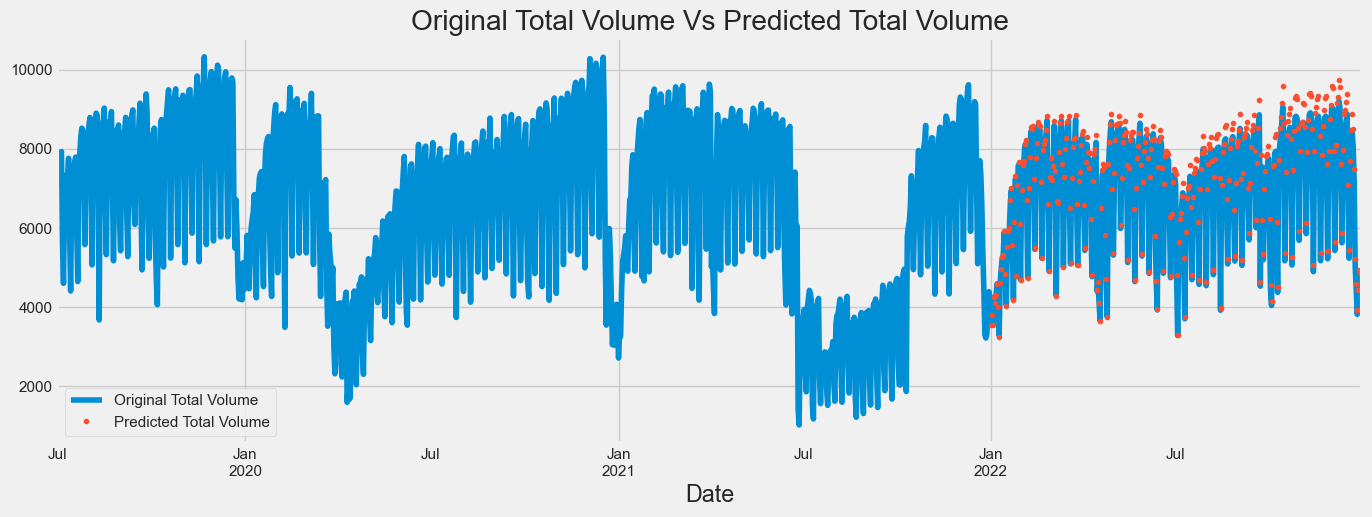

Wall time: 865 ms


In [292]:
%%time
#Forecast / Predict on test dataset
testing_df['PredictedTotalVolume'] = regressor.predict(X_test)
df_lreg_charge_3_Car = df_lreg_charge_3_Car.merge(testing_df['PredictedTotalVolume'], how='left', left_index = True, right_index = True)
ax = df_lreg_charge_3_Car['TotalVolume'].plot(figsize=(15,5))
df_lreg_charge_3_Car['PredictedTotalVolume'].plot(ax=ax, style='.')
plt.legend(['Original Total Volume', 'Predicted Total Volume'])
ax.set_title('Original Total Volume Vs Predicted Total Volume')
plt.show()

<font color='green'><center><h2><u>Cars: Evaluation Metrics</u></h2></center></font>

In [177]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedTotalVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 211.74
Wall time: 2.99 ms


<font color='purple'><center><h1>End: Answering "Predict the future next day+ revenue from cars and trucks based on daily traffic volume</h1></center></font>